In [80]:
import matplotlib.pyplot as plt
import numpy as np
import torch

def plot_feature_mean(data):
    # Creating a figure and subplots
    fig, ax = plt.subplots()

    # Plotting train loss history
    ax.plot(data.cpu().numpy(), label='Mean interpolated', linestyle='-', marker='.', color='blue')

    # Adding labels and title
    ax.set_xlabel('Time')
    ax.set_ylabel('SpikePow/ tx')

    # Adding legend
    ax.legend()

    # Displaying the plot
    plt.show()
    plt.close()

# Mean neuron activation as sound

In [81]:
from src.datasets.brain2text import Brain2TextDataset
from src.args.base_args import B2TDatasetArgsModel
from src.args.yaml_config import YamlConfig
from torch.nn.functional import interpolate

sentence_idx = 8


pow_ds = Brain2TextDataset(B2TDatasetArgsModel(window_size=20, preprocessing="only_spikepow_zscored"), YamlConfig().config)
cnt_ds = Brain2TextDataset(B2TDatasetArgsModel(window_size=20, preprocessing="only_tx_zscored"), YamlConfig().config)
sample_pow = pow_ds[sentence_idx][0].unsqueeze(0).transpose(-1,-2)
sample_cnt = cnt_ds[sentence_idx][0].unsqueeze(0).transpose(-1,-2).float()

sentence = pow_ds.tokenizer.decode(pow_ds[sentence_idx][1].ids)

orig_freq = 20#ms
target_freq = 20#ms
scale_factor = orig_freq / target_freq
interpolated_pow = interpolate(sample_pow.cuda(), scale_factor=scale_factor,mode='linear').transpose(-1,-2).squeeze(0)
interpolated_cnt = interpolate(sample_cnt.cuda(), scale_factor=scale_factor,mode='linear').transpose(-1,-2).squeeze(0)

spike_pow = interpolated_pow.mean(-1)
spike_count = torch.mean(interpolated_cnt, dim=-1)

Got tokenizer from file
Got tokenizer from file


In [82]:
sentence

'We c ou ld sp en d th at m on ey .'

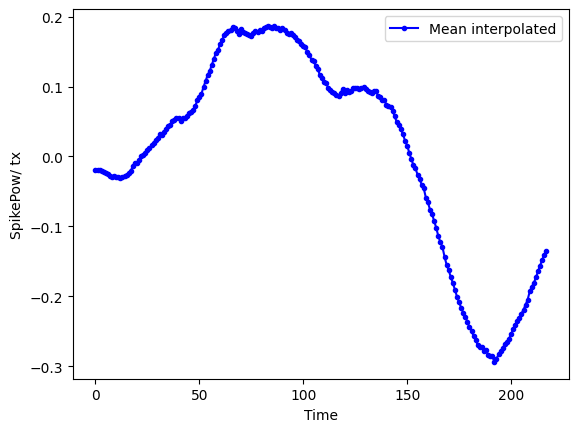

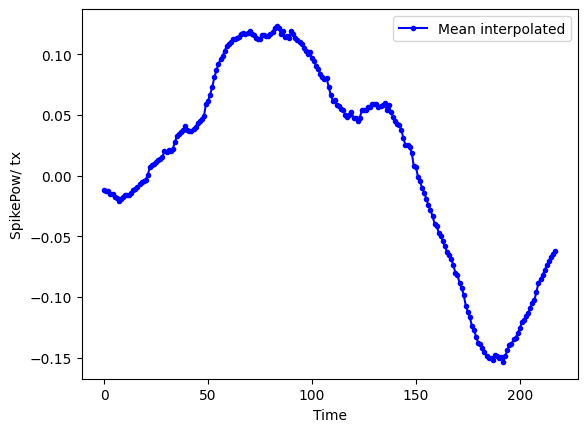

In [83]:
import torch

window_size = 50
kernel = torch.ones(window_size) / window_size
kernel = kernel.cuda()

spike_pow_smoothed = torch.nn.functional.conv1d(spike_pow.view(1,1,-1), kernel.view(1,1,-1), padding=window_size//2).view(-1)[1:]
spike_count_smoothed = torch.nn.functional.conv1d(spike_count.view(1,1,-1), kernel.view(1,1,-1), padding=window_size//2).view(-1)[1:]

plot_feature_mean(spike_pow_smoothed)
plot_feature_mean(spike_count_smoothed)

In [84]:
frequencies = spike_count_smoothed.cpu().numpy()
min_freq = frequencies.min()
frequencies = frequencies + abs(min_freq)
frequencies = frequencies * 100
frequencies = frequencies.astype(np.int16)
frequencies

array([14, 14, 14, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14,
       14, 14, 14, 14, 15, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17,
       18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 21, 21,
       22, 22, 23, 24, 24, 24, 25, 25, 26, 26, 26, 26, 26, 26, 26, 27, 27,
       27, 27, 27, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27,
       27, 27, 26, 26, 26, 27, 26, 26, 26, 26, 26, 25, 25, 25, 25, 25, 24,
       24, 24, 23, 23, 23, 23, 22, 22, 21, 21, 21, 21, 20, 20, 20, 20, 20,
       20, 20, 20, 19, 20, 20, 20, 20, 21, 21, 21, 21, 21, 20, 21, 21, 21,
       20, 21, 20, 20, 19, 19, 19, 19, 18, 17, 17, 17, 17, 16, 16, 15, 14,
       14, 13, 13, 12, 12, 12, 11, 11, 10, 10,  9,  9,  9,  8,  8,  7,  7,
        7,  6,  6,  5,  4,  4,  3,  2,  2,  2,  1,  1,  1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  2,  2,  3,  3,  3,
        4,  4,  4,  5,  5,  6,  6,  7,  7,  7,  8,  8,  8,  9],
      dtype=int16)

In [85]:
amplitudes = spike_pow_smoothed.cpu().numpy()
min_freq = amplitudes.min()
amplitudes = amplitudes + abs(min_freq)
amplitudes = amplitudes * 5000
amplitudes

array([1375.9153  , 1375.9276  , 1374.5994  , 1367.1198  , 1360.1124  ,
       1351.789   , 1347.498   , 1332.4766  , 1324.2214  , 1326.8942  ,
       1319.7659  , 1319.607   , 1313.324   , 1321.3195  , 1331.398   ,
       1338.2059  , 1350.6058  , 1367.1107  , 1400.4594  , 1425.0892  ,
       1423.8651  , 1443.0647  , 1472.1626  , 1481.1333  , 1490.7893  ,
       1519.2095  , 1527.9767  , 1548.8529  , 1565.2012  , 1589.699   ,
       1603.8956  , 1627.217   , 1621.205   , 1643.4503  , 1667.7642  ,
       1683.9797  , 1695.8011  , 1721.2177  , 1730.9916  , 1743.9326  ,
       1743.7826  , 1725.4916  , 1743.3094  , 1746.5344  , 1755.7865  ,
       1782.9159  , 1786.6174  , 1803.236   , 1828.1284  , 1870.6356  ,
       1893.1344  , 1915.9608  , 1967.2878  , 2008.5371  , 2052.2002  ,
       2081.8003  , 2126.2622  , 2168.346   , 2212.4294  , 2232.854   ,
       2274.8887  , 2303.17    , 2337.0112  , 2349.3555  , 2364.6328  ,
       2375.9438  , 2392.682   , 2389.595   , 2368.492   , 2348.

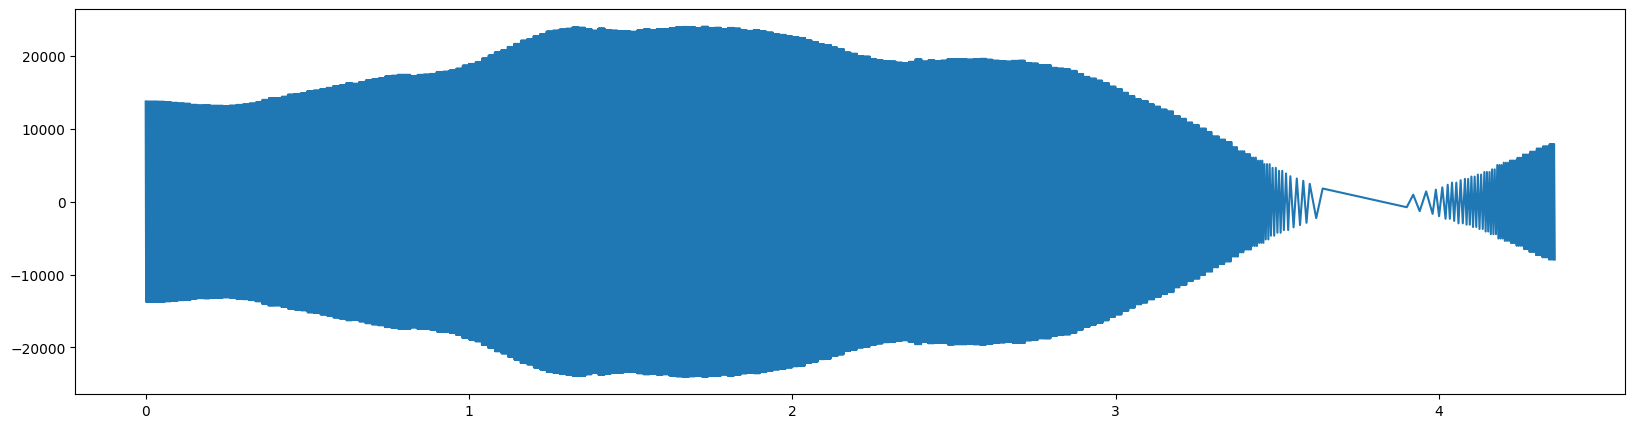

In [86]:
def construct_audio_sig(amplitudes, frequencies):
    time_stamps = []
    signal = []
    pos = True
    
    # Input amplitudes and frequencies are spaced in 20 ms windows
    
    for i in range(len(amplitudes)):
        freq = frequencies[i]
        amp = amplitudes[i]
        if freq != 0:
            time_stamp_offset = target_freq / freq
        for j in range(freq):
            time_stamp = target_freq * i + j * time_stamp_offset
            signal_point = (amp if pos else -amp) * 10
            pos = not pos
            time_stamps.append(time_stamp)
            signal.append(signal_point)
            
    # Time stamp unit is in ms, we convert to s
    time_stamps = np.array(time_stamps) / 1000
    return time_stamps, signal

x, y = construct_audio_sig(amplitudes, frequencies)
plt.subplots(figsize=(20, 5))
plt.plot(x,y)
plt.show()

In [87]:
def sample_raw_signal(sample_rate, x, y):
    start_time = x[0]
    end_time = x[-1]
    target_freq_s = 1.0 / sample_rate
    new_x = np.arange(start_time, end_time + target_freq_s, target_freq_s)
    new_y = np.interp(new_x, x, y)
    return new_x, new_y

# 16k Hz target sample rate

x, y = sample_raw_signal(16000, x, y)

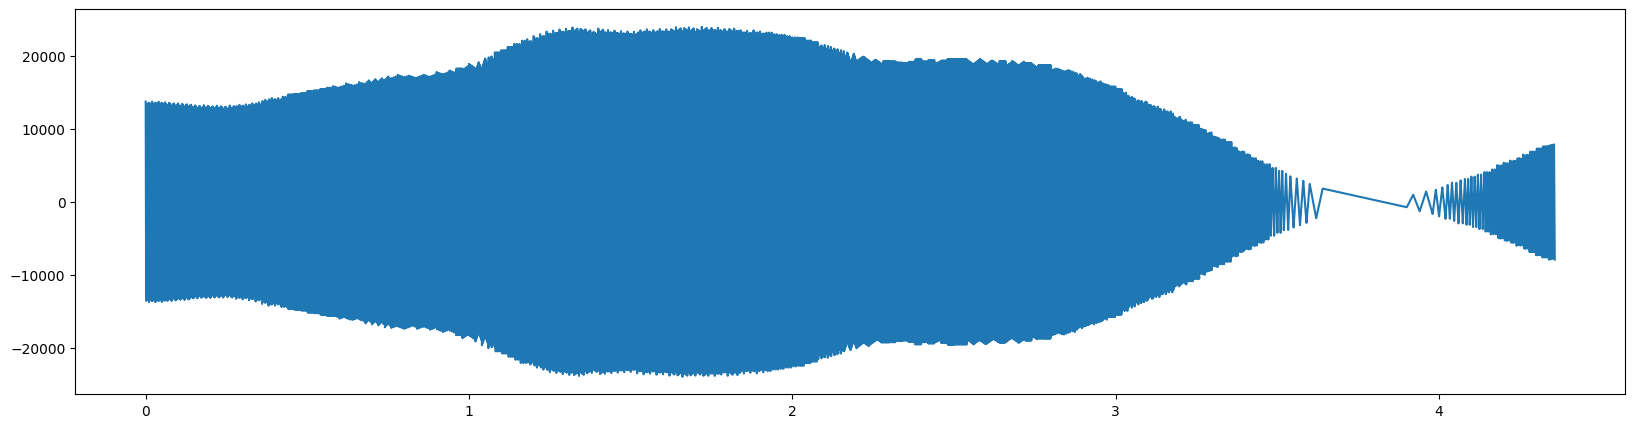

In [88]:
plt.subplots(figsize=(20, 5))
plt.plot(x, y)
plt.show()

In [89]:
len(y)

69726

In [90]:
from scipy.io import wavfile

file_name = f"mean_{sentence}.wav"

wavfile.write(file_name, 16000, y.astype(np.int16))

In [91]:
wav = wavfile.read(file_name)

In [92]:
wav[1]

array([13759, 12555, 11351, ..., -7287, -7733, -7931], dtype=int16)

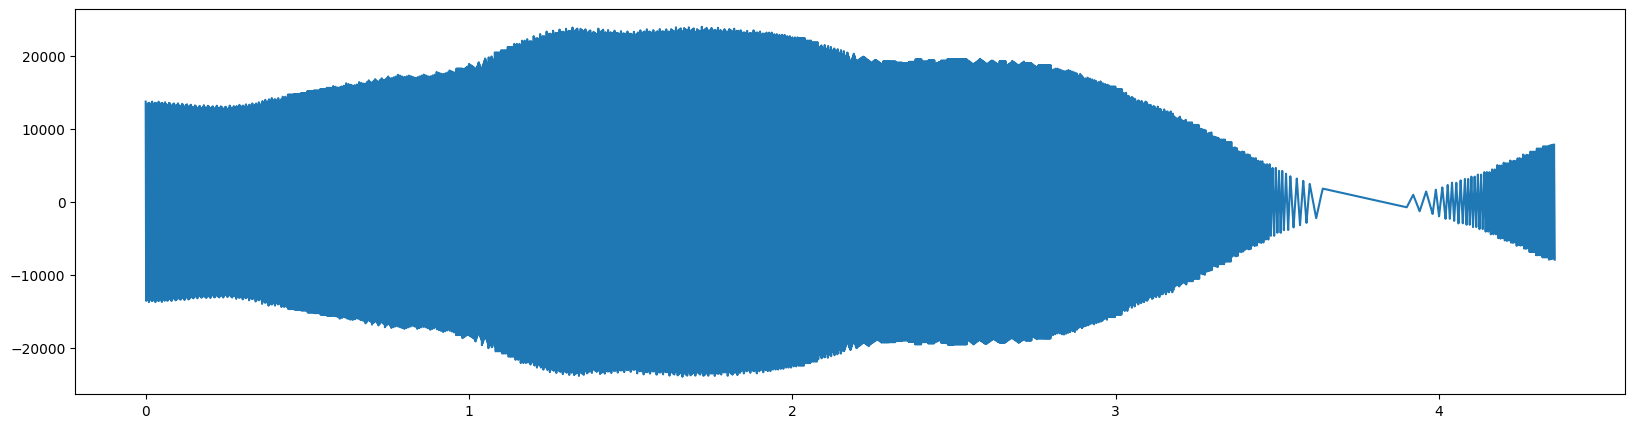

In [93]:
plt.subplots(figsize=(20,5))
plt.plot(np.arange(0, len(wav[1])) * 1.0 / 16000.0, wav[1])
plt.show()

# Combined audio signal of all neurons

In [107]:
sentence_idx = 8


pow_ds = Brain2TextDataset(B2TDatasetArgsModel(window_size=20, preprocessing="only_spikepow_zscored"), YamlConfig().config)
cnt_ds = Brain2TextDataset(B2TDatasetArgsModel(window_size=20, preprocessing="only_tx_zscored"), YamlConfig().config)
sample_pow = pow_ds[sentence_idx][0].unsqueeze(0).transpose(-1,-2)
sample_cnt = cnt_ds[sentence_idx][0].unsqueeze(0).transpose(-1,-2).float()

sentence = pow_ds.tokenizer.decode(pow_ds[sentence_idx][1].ids)

orig_freq = 20#ms
target_freq = 20#ms
scale_factor = orig_freq / target_freq
spike_pow = interpolate(sample_pow.cuda(), scale_factor=scale_factor,mode='linear').transpose(-1,-2).squeeze(0)
spike_count = interpolate(sample_cnt.cuda(), scale_factor=scale_factor,mode='linear').transpose(-1,-2).squeeze(0)

Got tokenizer from file
Got tokenizer from file


In [108]:
spike_count[:,0]

tensor([-0.9890, -0.9890, -0.9890,  0.0748, -0.9890, -0.9890,  0.0748, -0.9890,
        -0.9890,  0.0748, -0.9890,  0.0748,  0.0748,  1.1386,  2.2025,  0.0748,
         0.0748,  0.0748,  0.0748,  0.0748, -0.9890, -0.9890, -0.9890,  1.1386,
        -0.9890,  0.0748, -0.9890, -0.9890, -0.9890,  4.3301, -0.9890,  4.3301,
         1.1386,  0.0748,  1.1386,  0.0748,  2.2025,  0.0748, -0.9890, -0.9890,
        -0.9890, -0.9890, -0.9890, -0.9890,  0.0748,  0.0748,  0.0748,  1.1386,
         0.0748,  0.0748,  0.0748,  1.1386,  1.1386,  2.2025,  2.2025,  0.0748,
         2.2025,  2.2025,  2.2025,  2.2025,  0.0748, -0.9890,  0.0748,  1.1386,
         0.0748,  0.0748, -0.9890, -0.9890, -0.9890,  1.1386, -0.9890, -0.9890,
        -0.9890,  0.0748,  0.0748, -0.9890, -0.9890, -0.9890, -0.9890, -0.9890,
         0.0748,  1.1386,  0.0748,  0.0748, -0.9890, -0.9890,  0.0748,  0.0748,
         3.2663, -0.9890,  0.0748,  0.0748,  0.0748,  0.0748,  1.1386, -0.9890,
        -0.9890, -0.9890, -0.9890,  0.07

In [109]:
window_size = 50
kernel = torch.ones(window_size) / window_size
kernel = kernel.cuda()

sound_waves = []

for i in range(spike_pow.shape[1]):
    smoothed_pows = torch.nn.functional.conv1d(spike_pow[:,i].view(1,1,-1), kernel.view(1,1,-1), padding=window_size//2).view(-1)[1:]
    smoothed_counts = torch.nn.functional.conv1d(spike_count[:,i].view(1,1,-1), kernel.view(1,1,-1), padding=window_size//2).view(-1)[1:]
    
    frequencies = smoothed_counts.cpu().numpy()
    min_freq = frequencies.min()
    frequencies = frequencies + abs(min_freq)
    frequencies = frequencies * 100
    frequencies = frequencies.astype(np.int16)
    
    amplitudes = smoothed_pows.cpu().numpy()
    min_freq = amplitudes.min()
    amplitudes = amplitudes + abs(min_freq)
    amplitudes = amplitudes * 5000
    
    x, y = construct_audio_sig(amplitudes, frequencies)
    x, y = sample_raw_signal(16000, x, y)
    
    sound_waves.append(y)
    

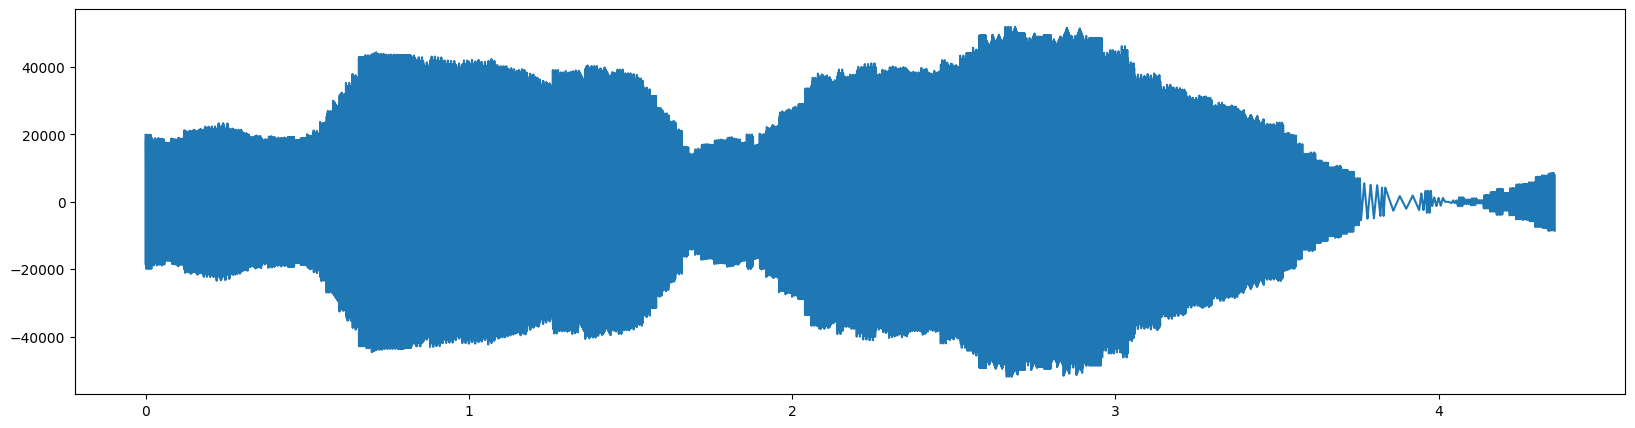

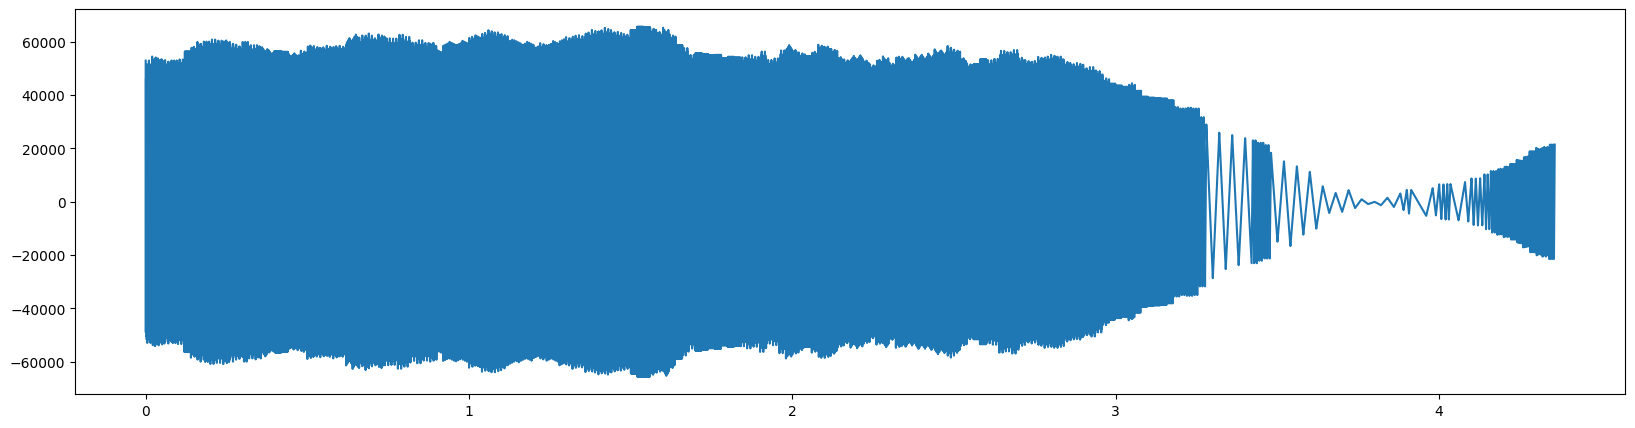

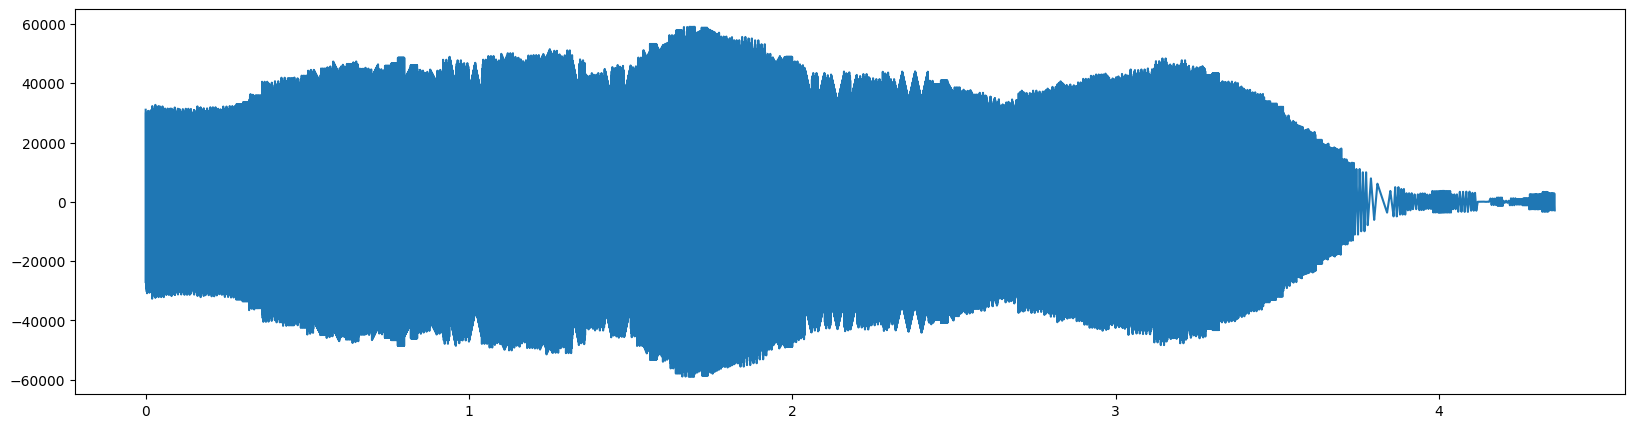

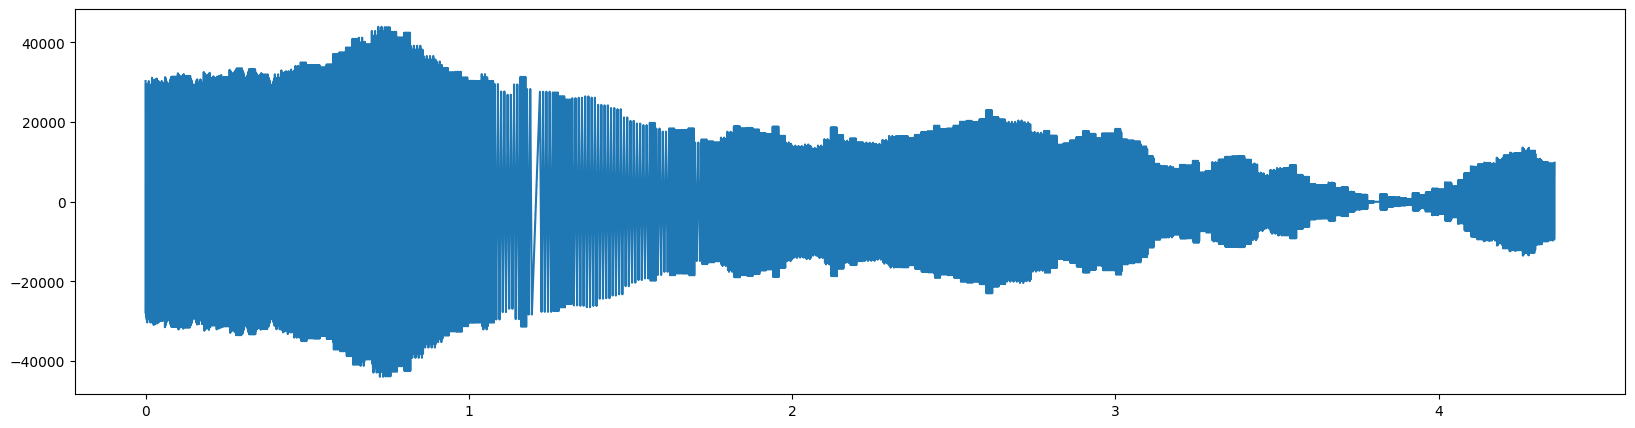

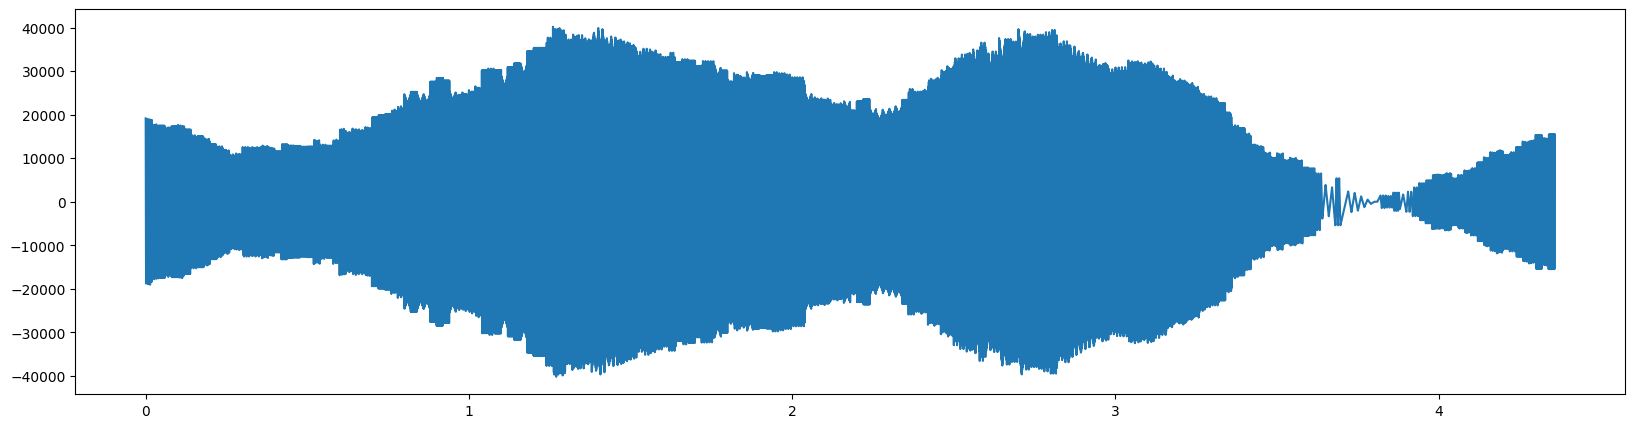

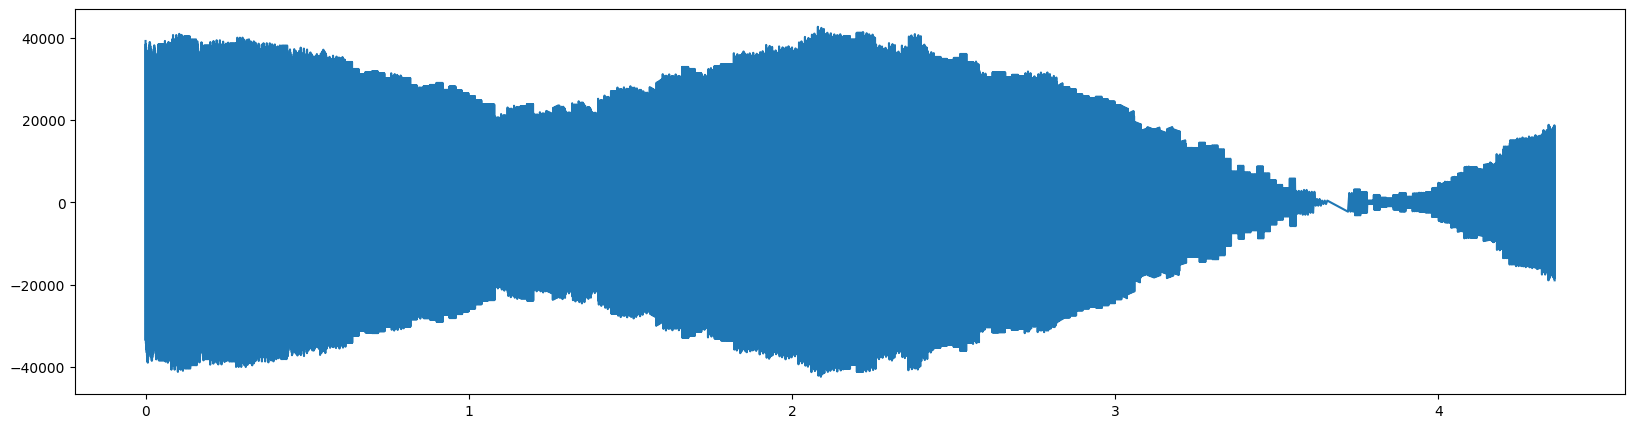

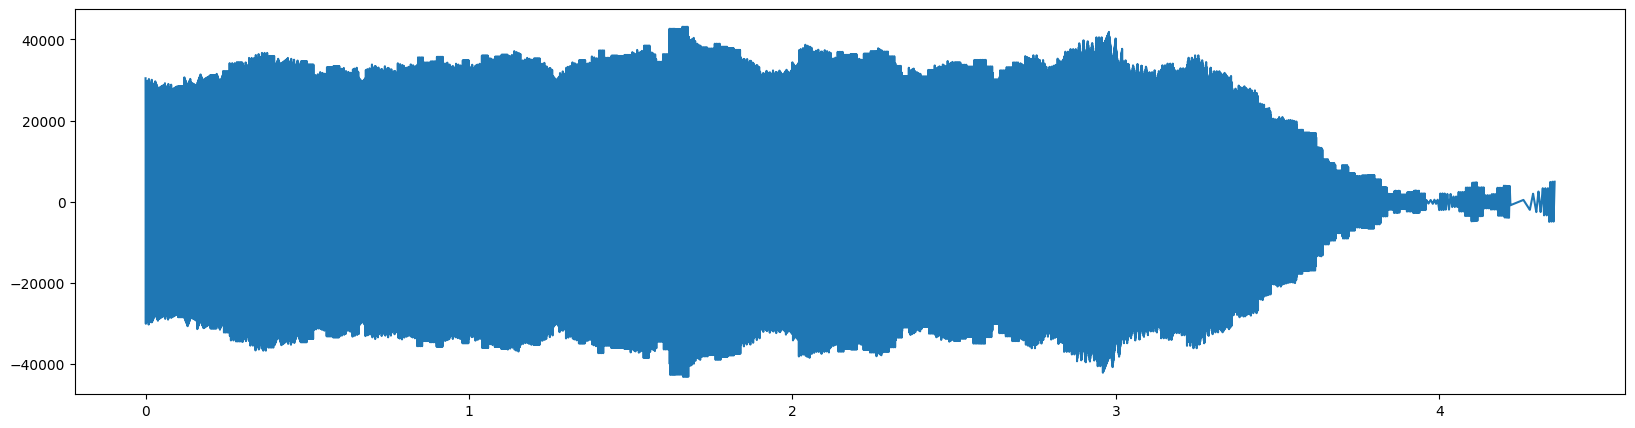

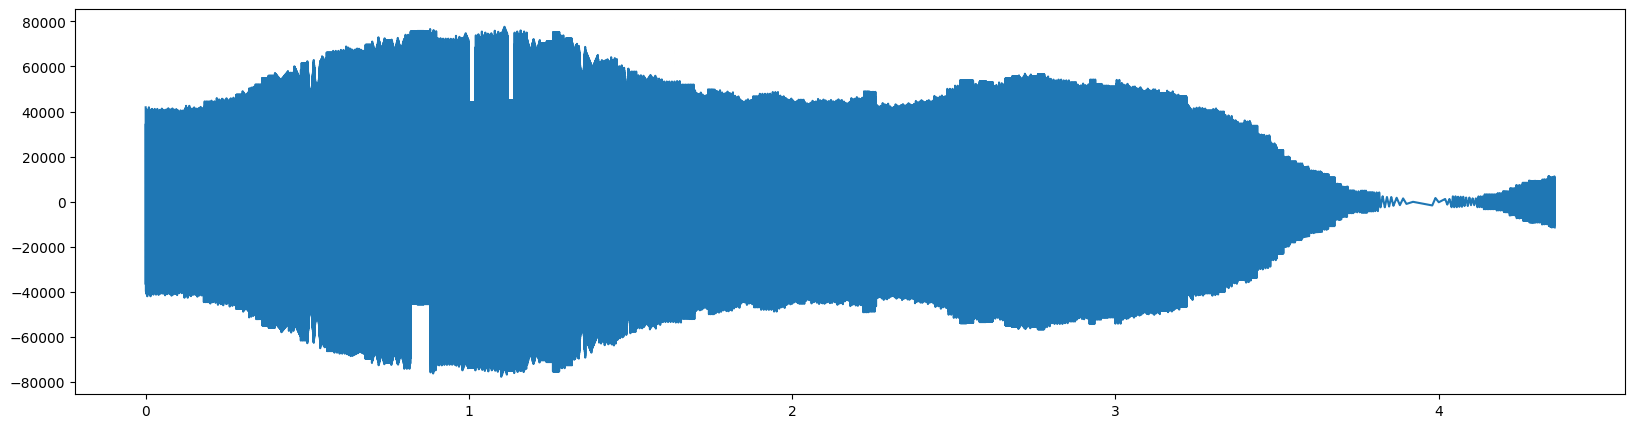

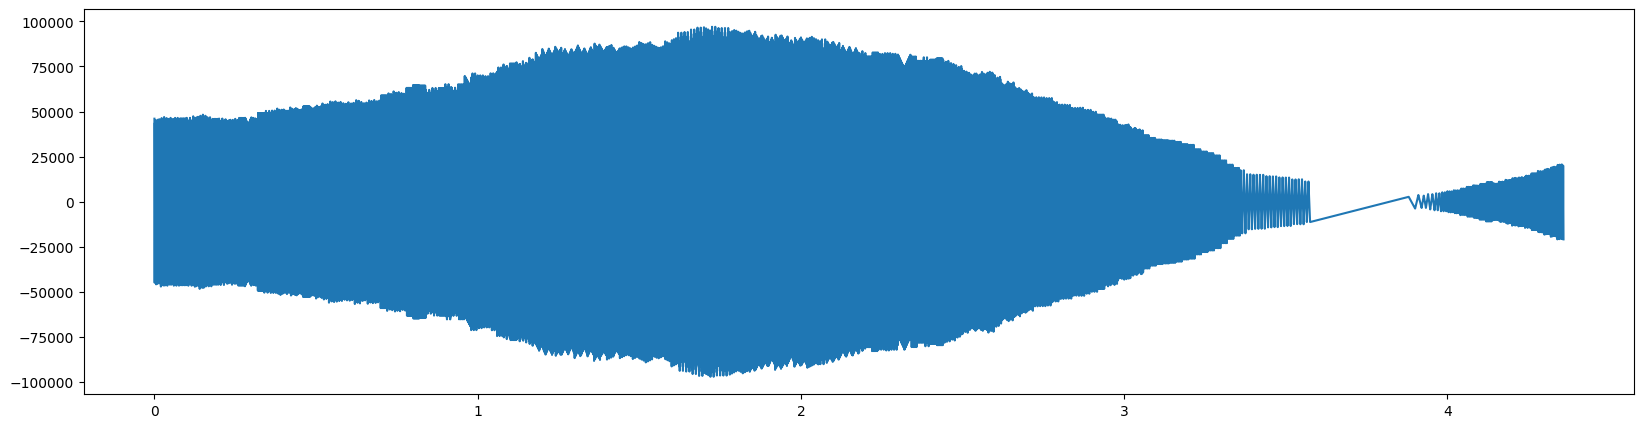

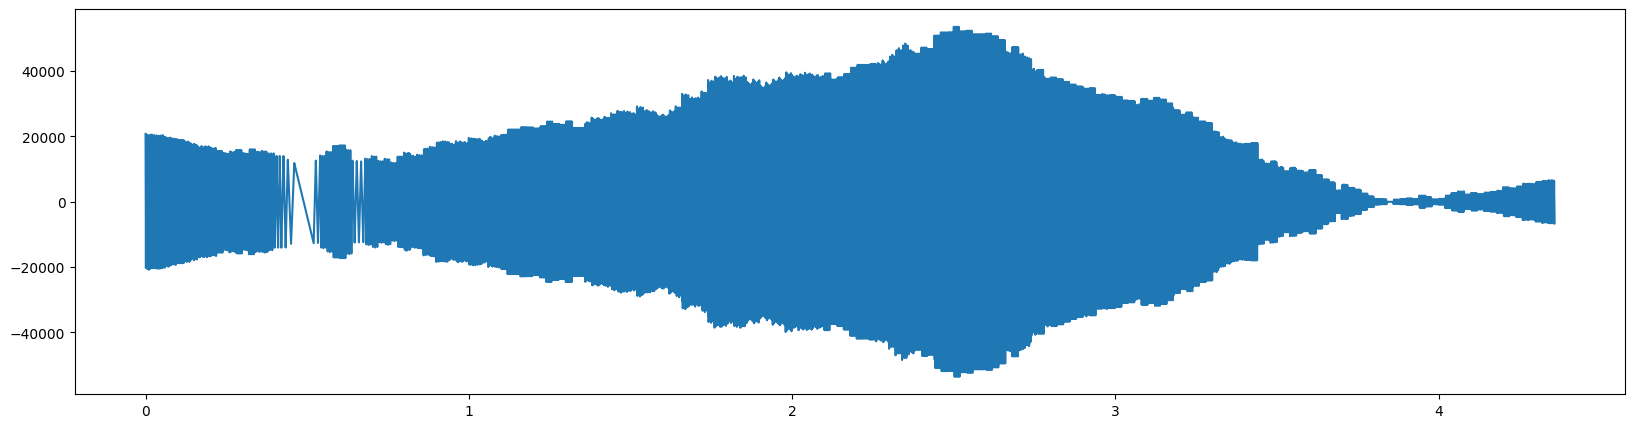

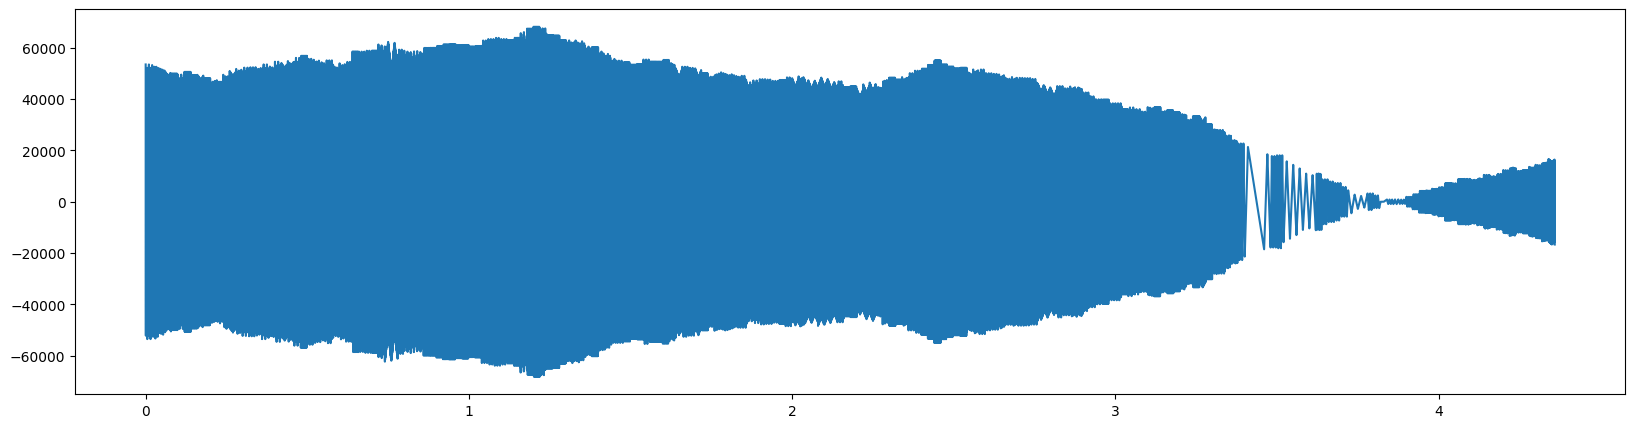

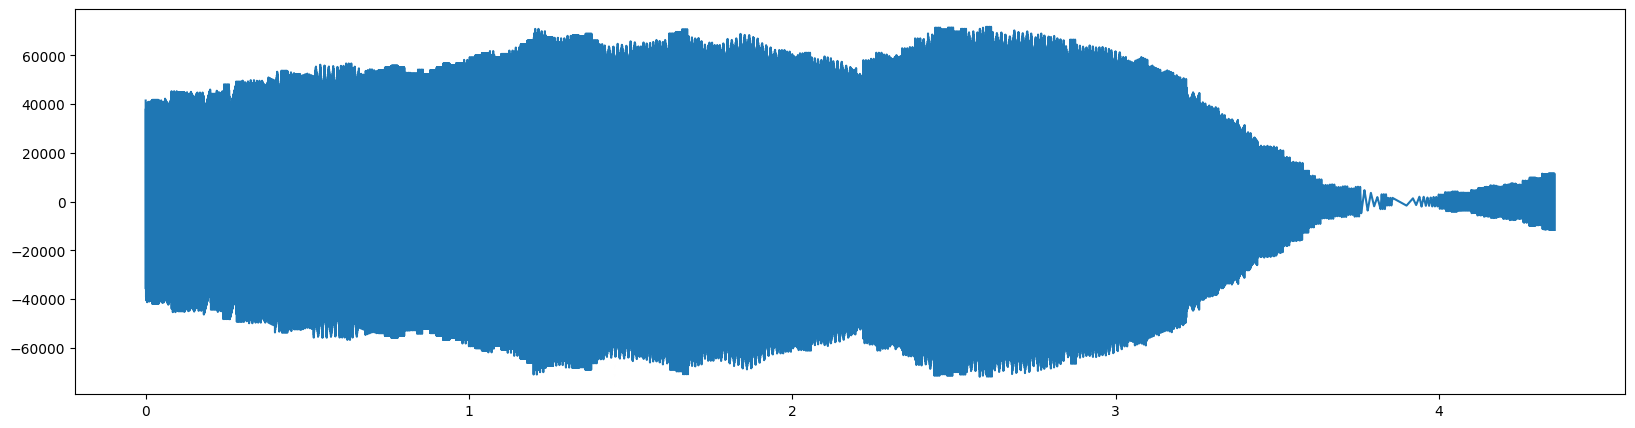

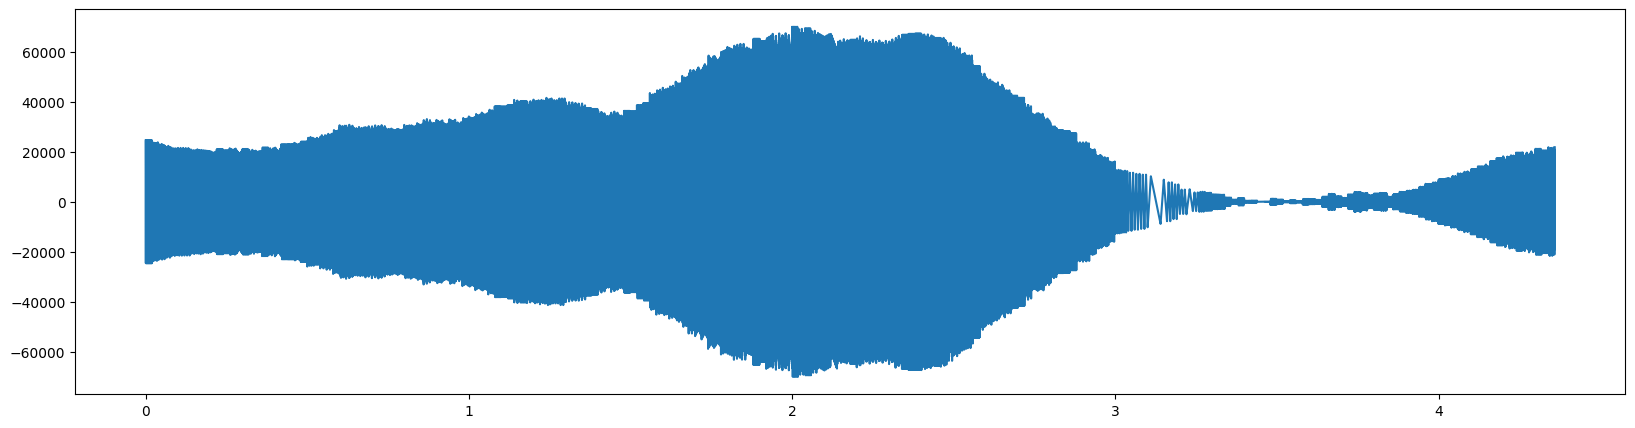

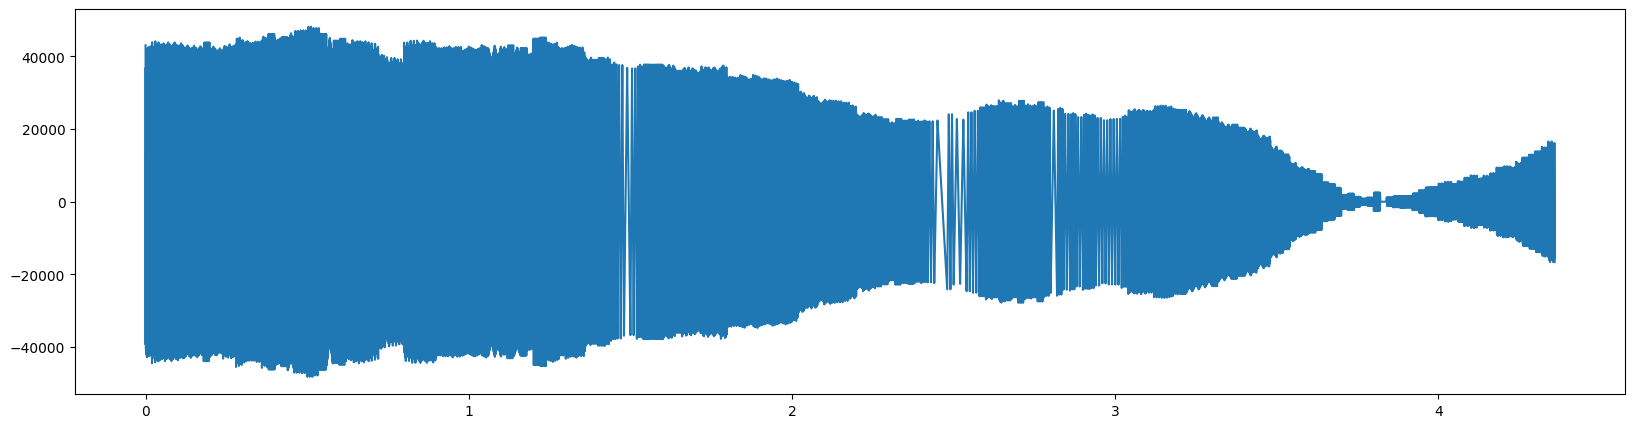

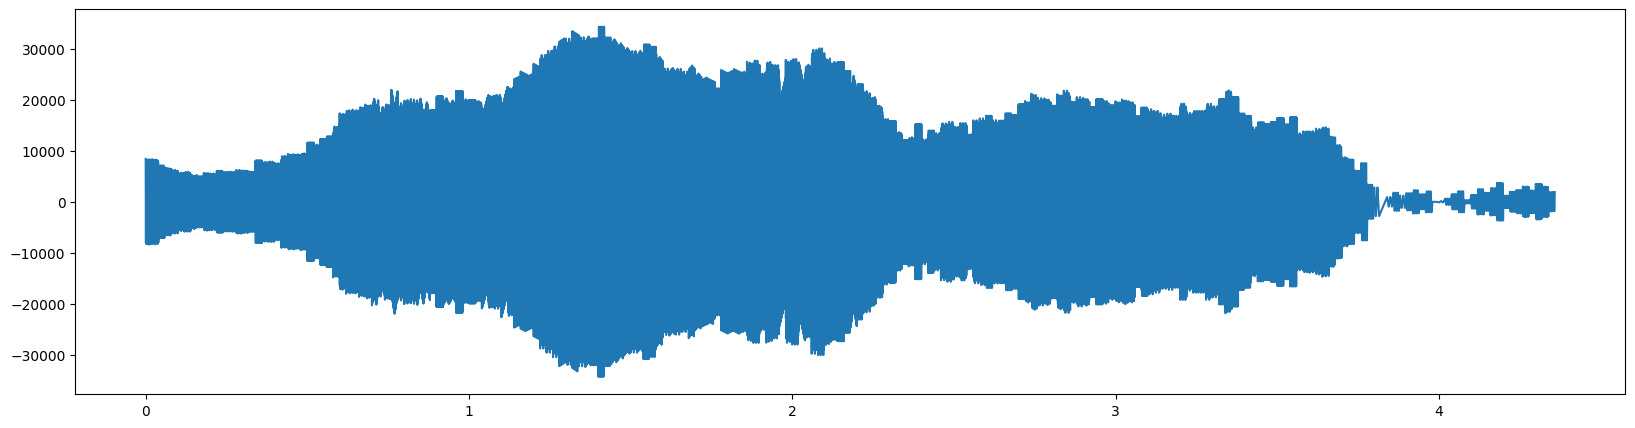

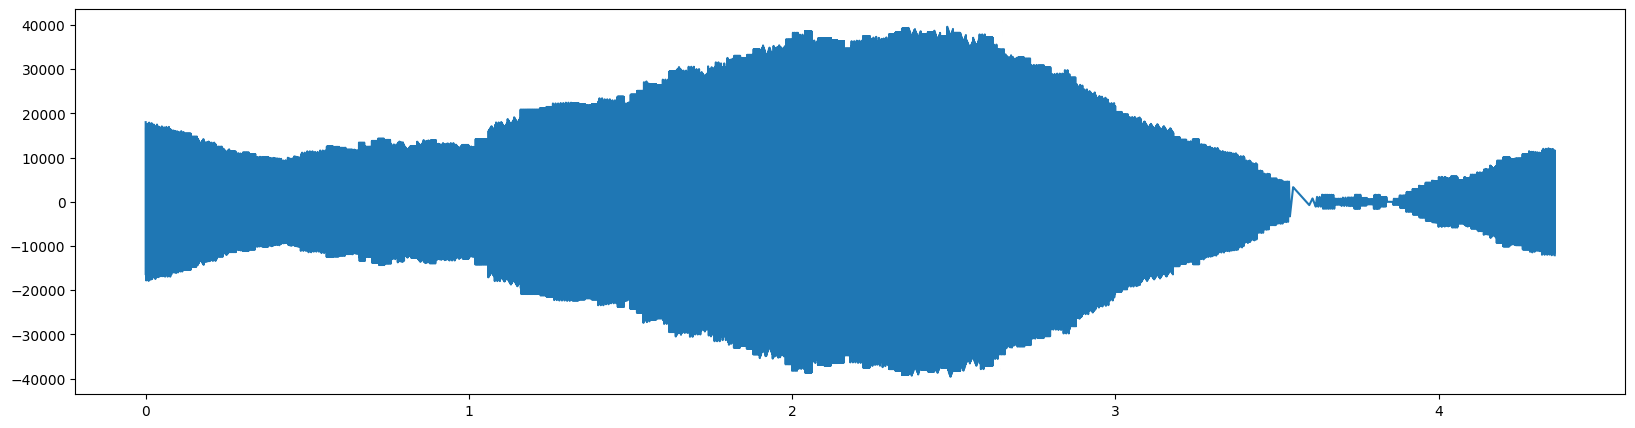

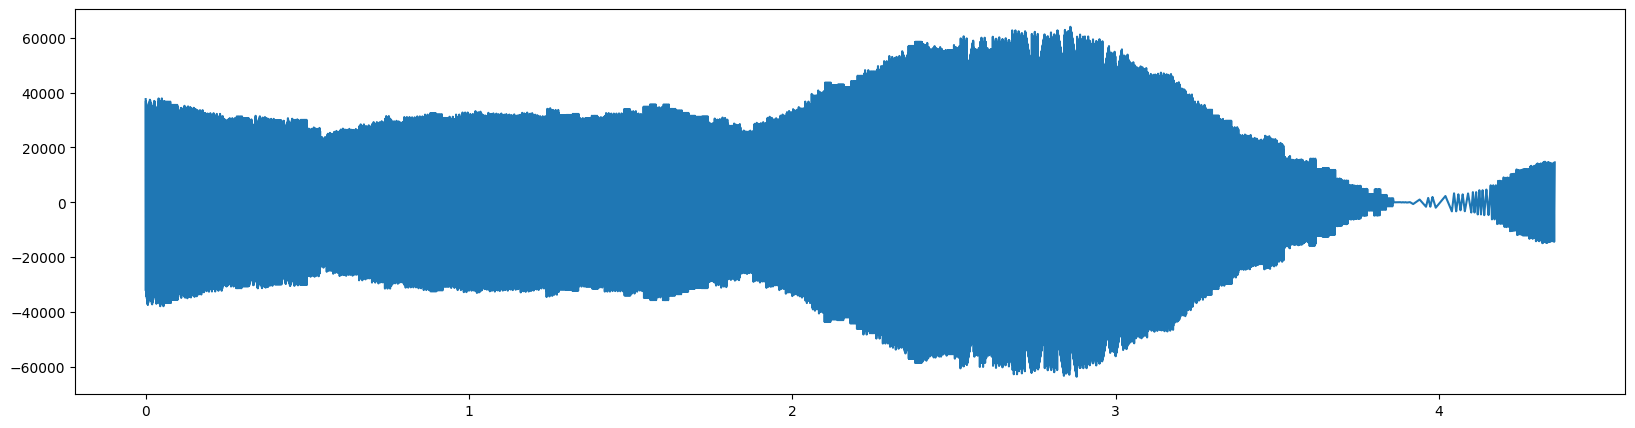

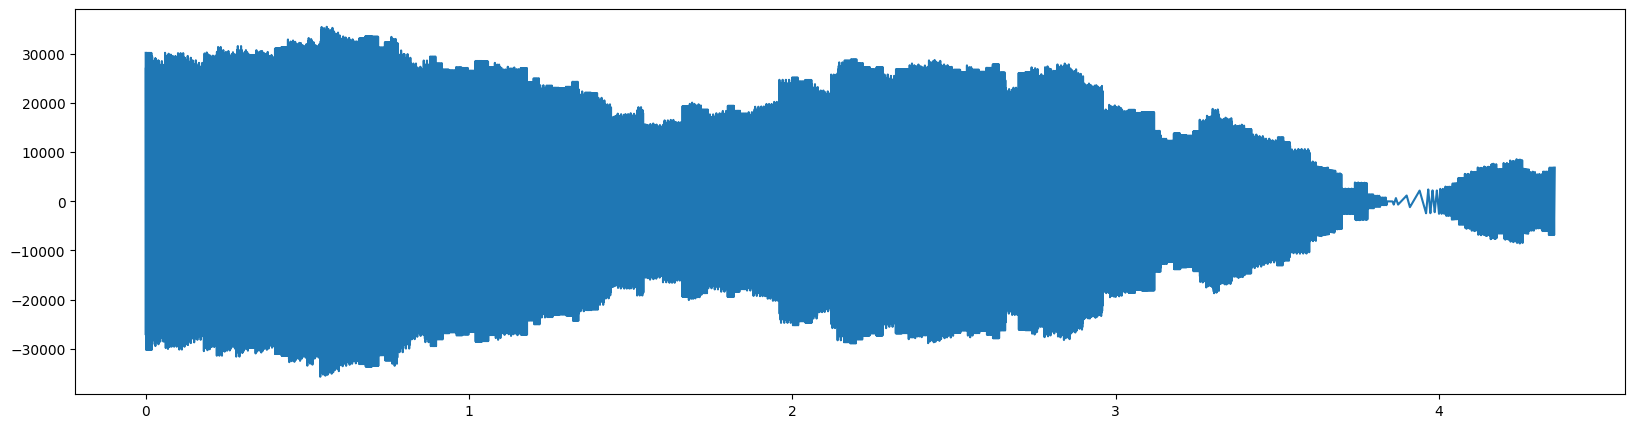

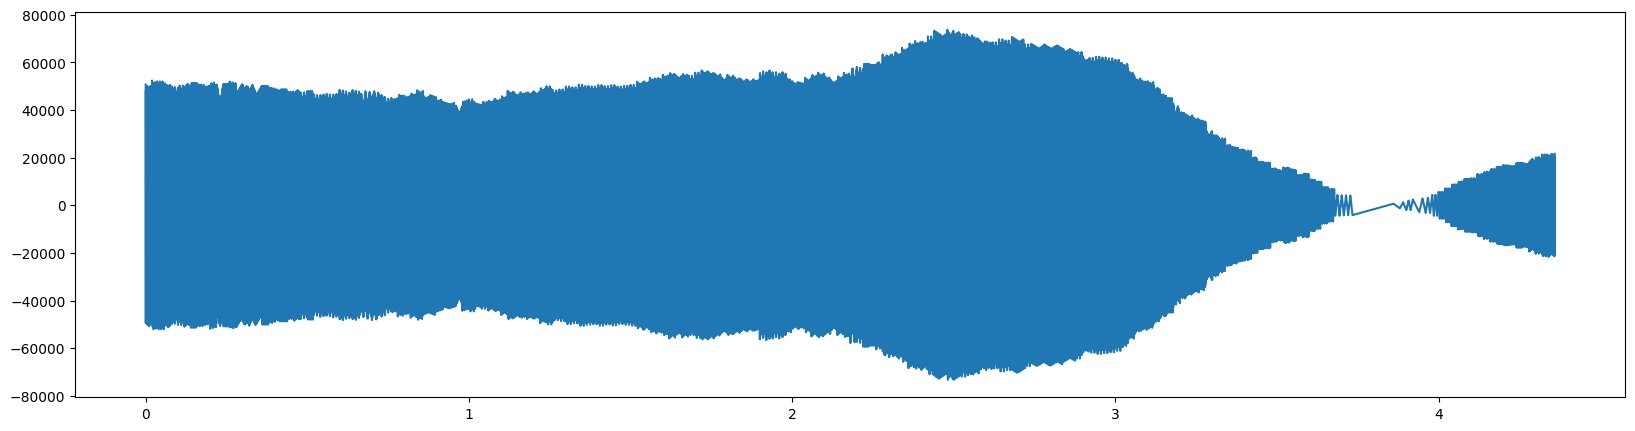

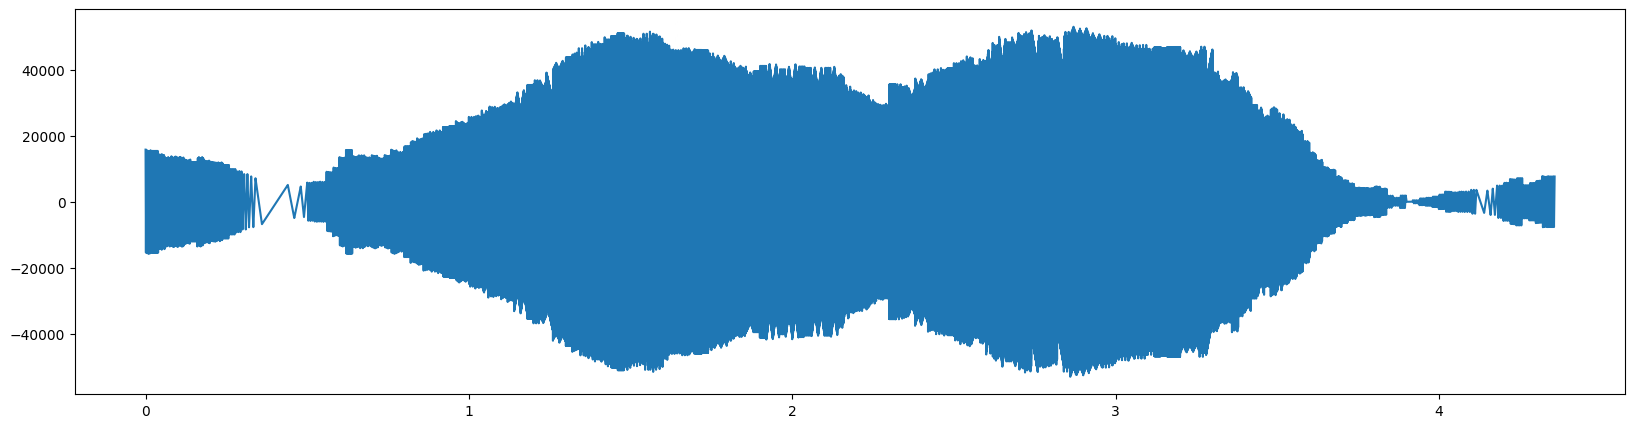

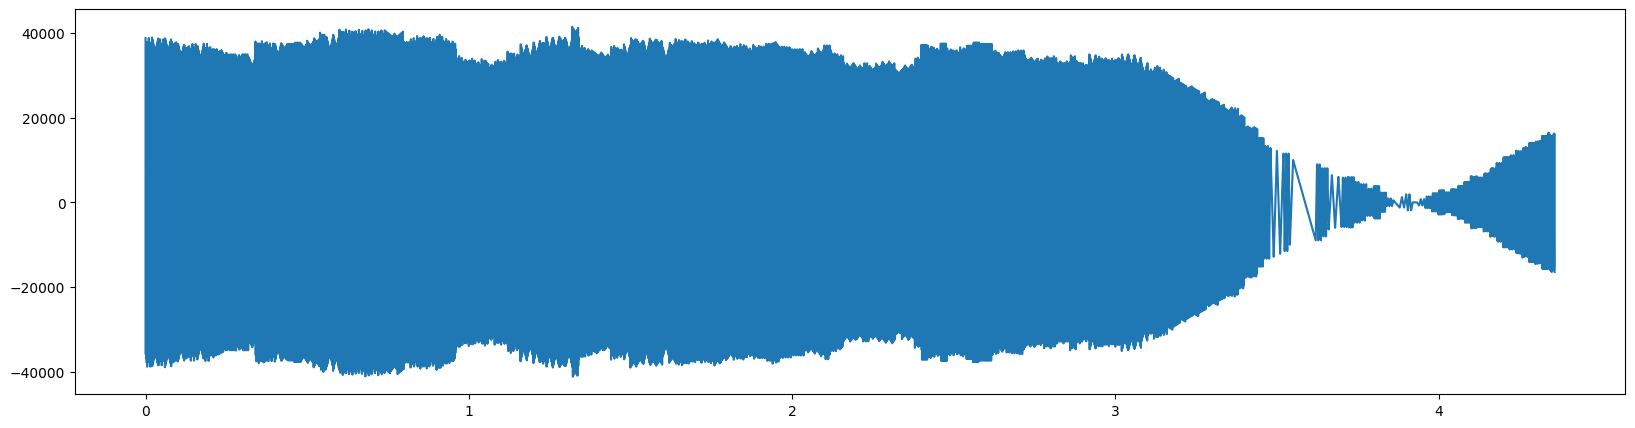

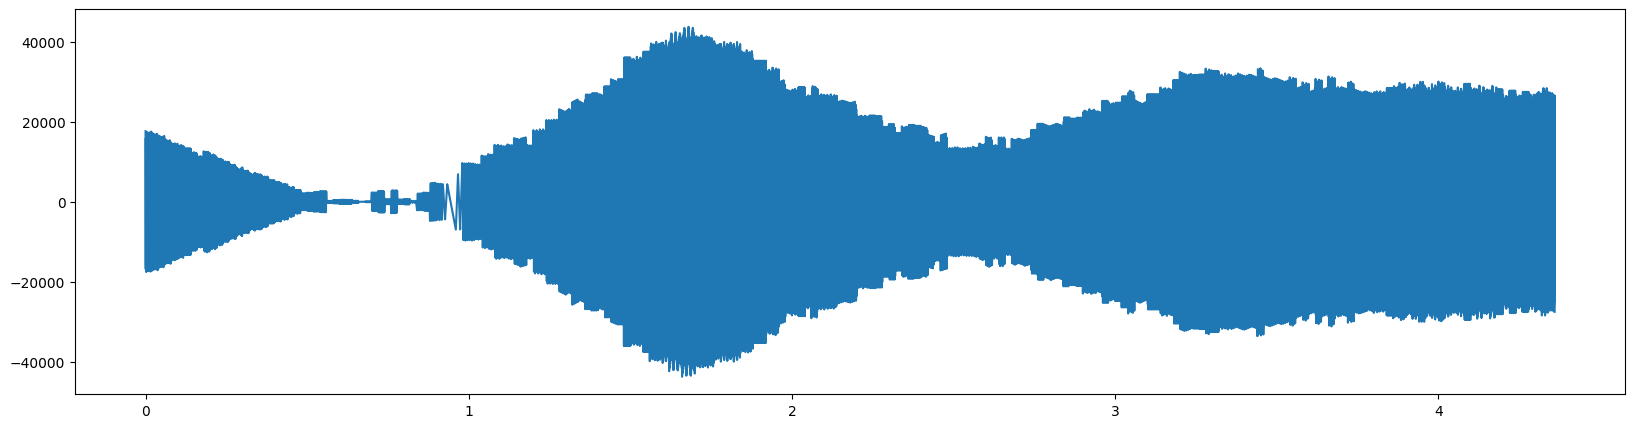

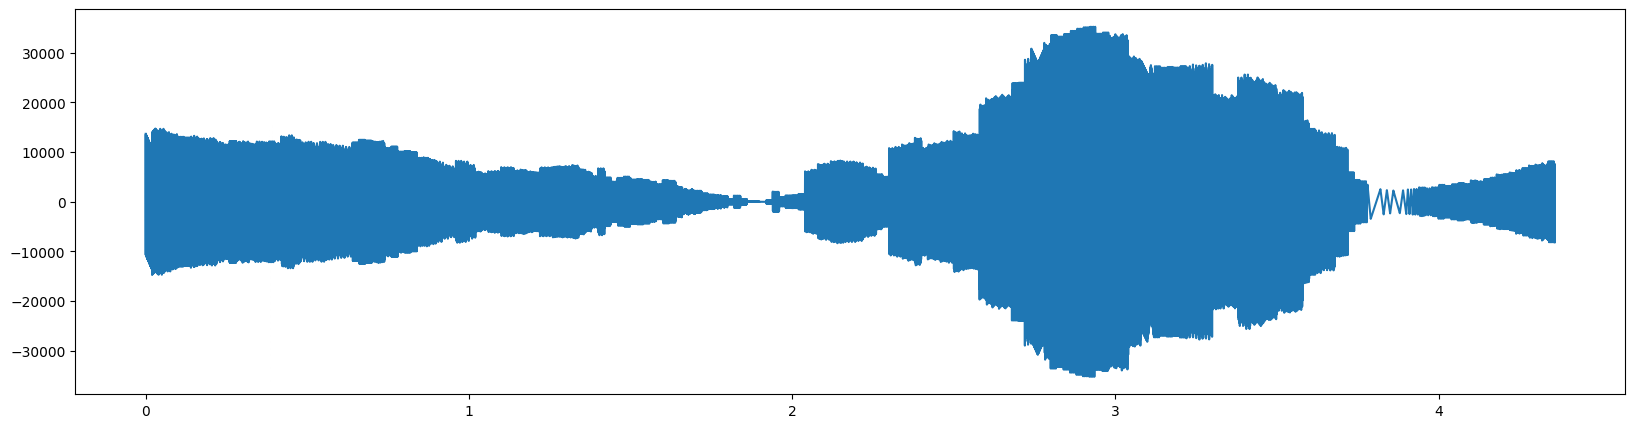

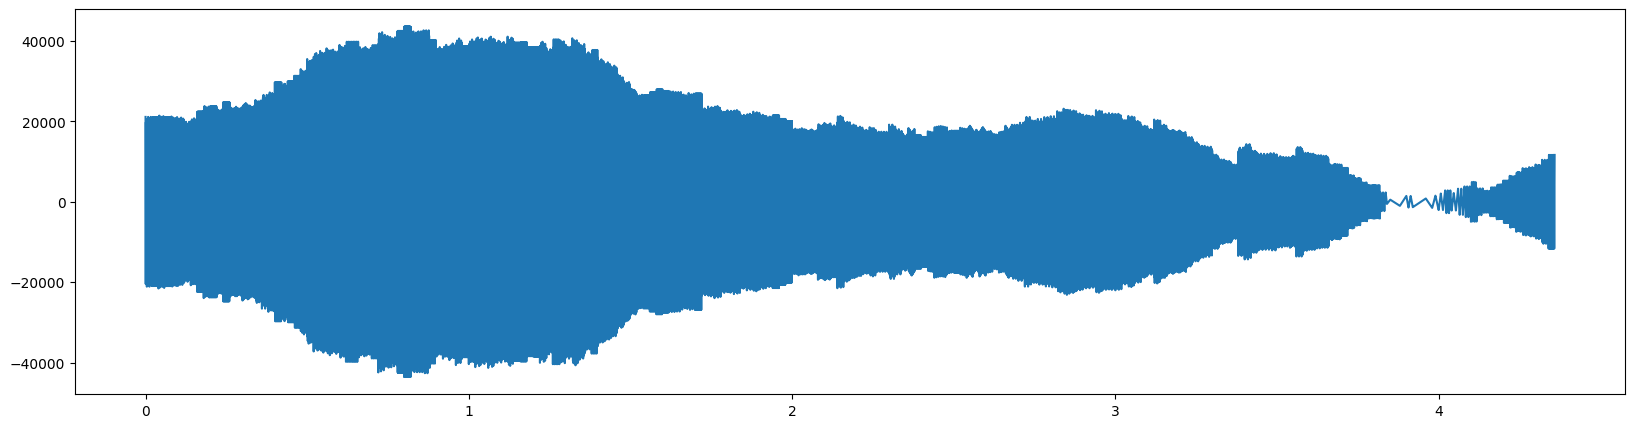

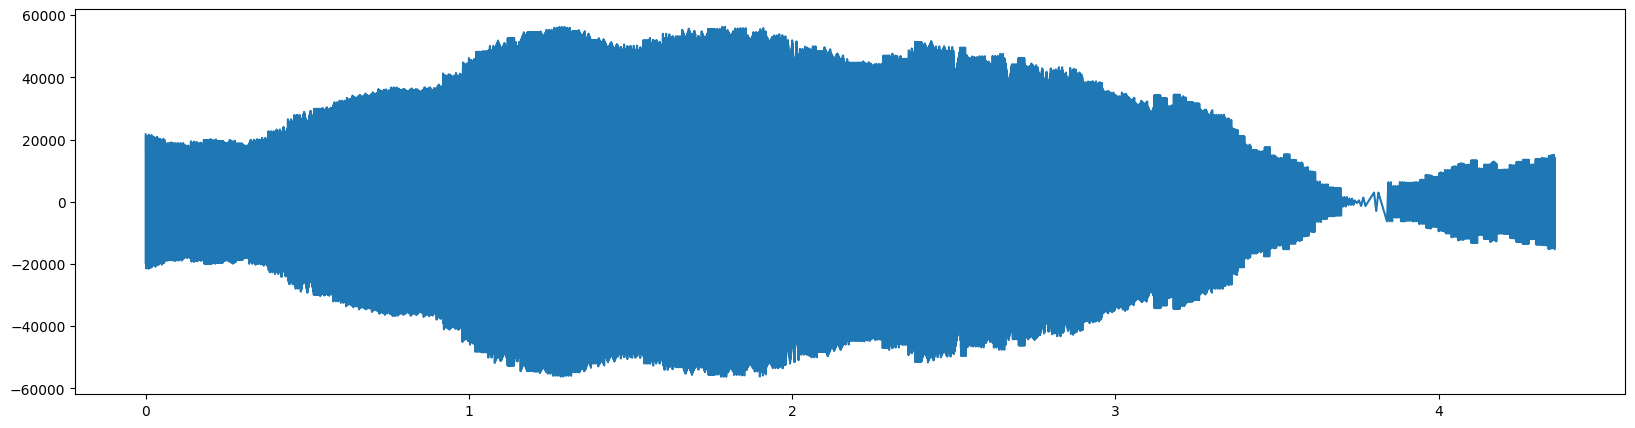

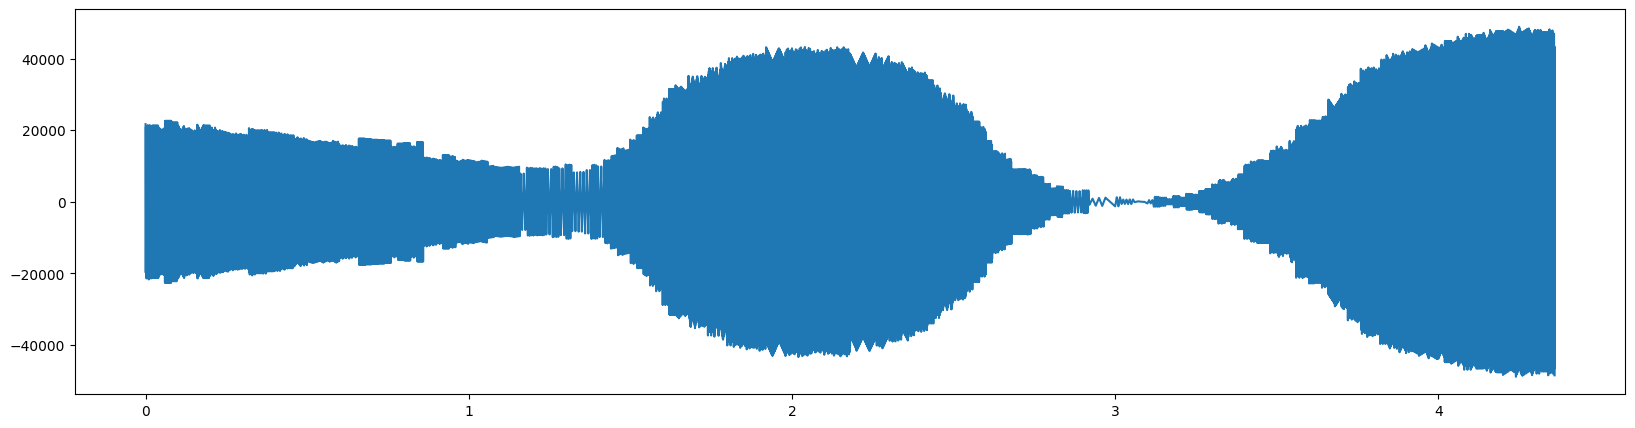

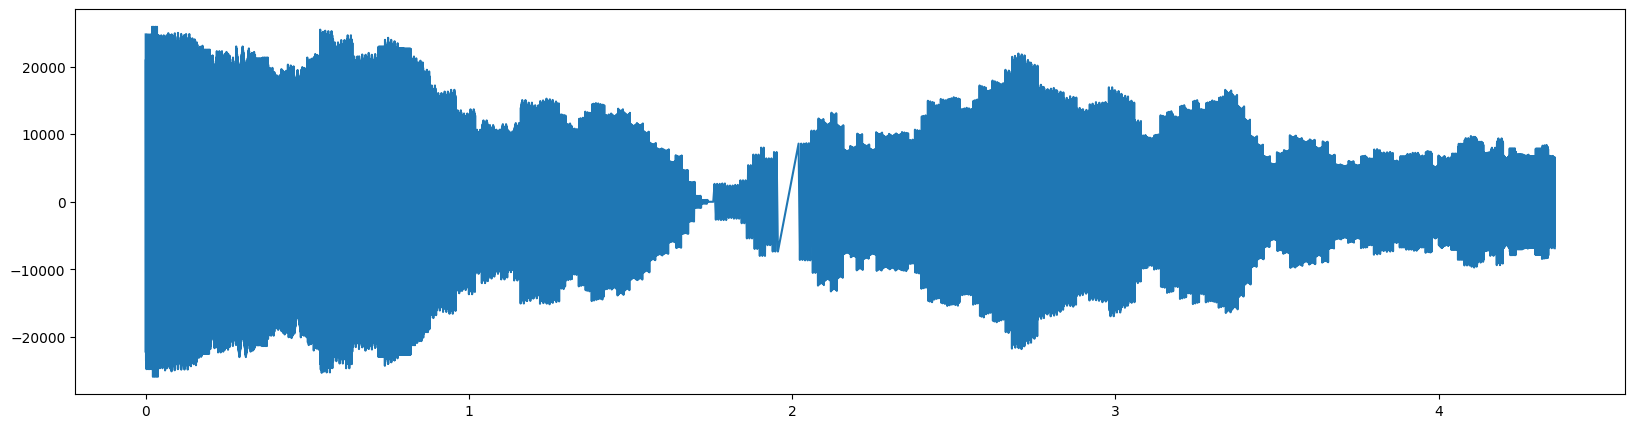

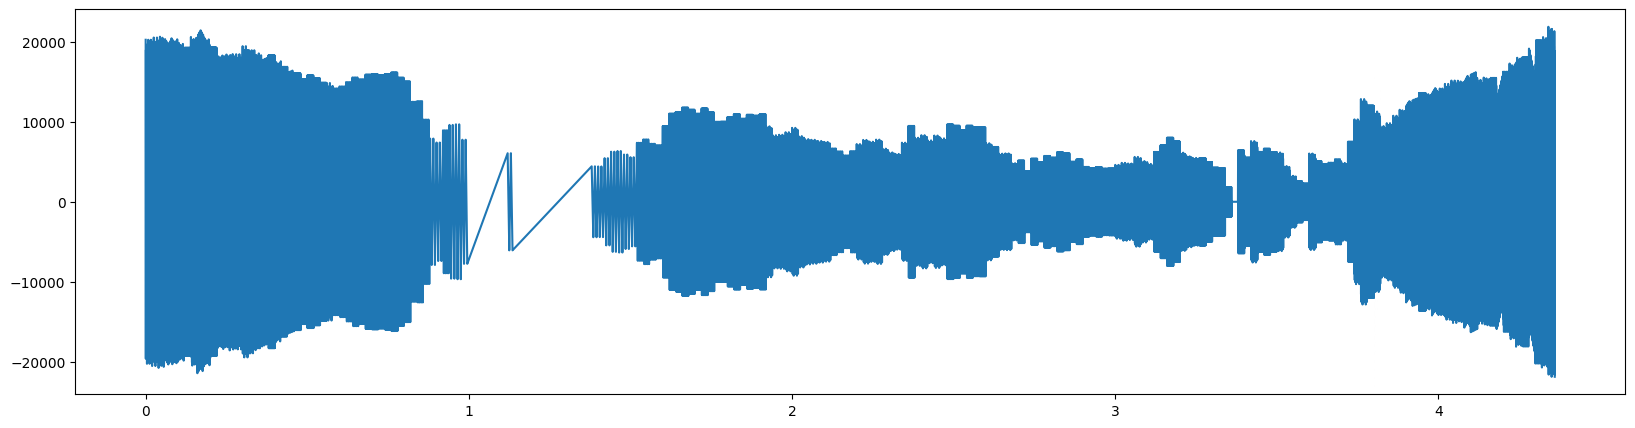

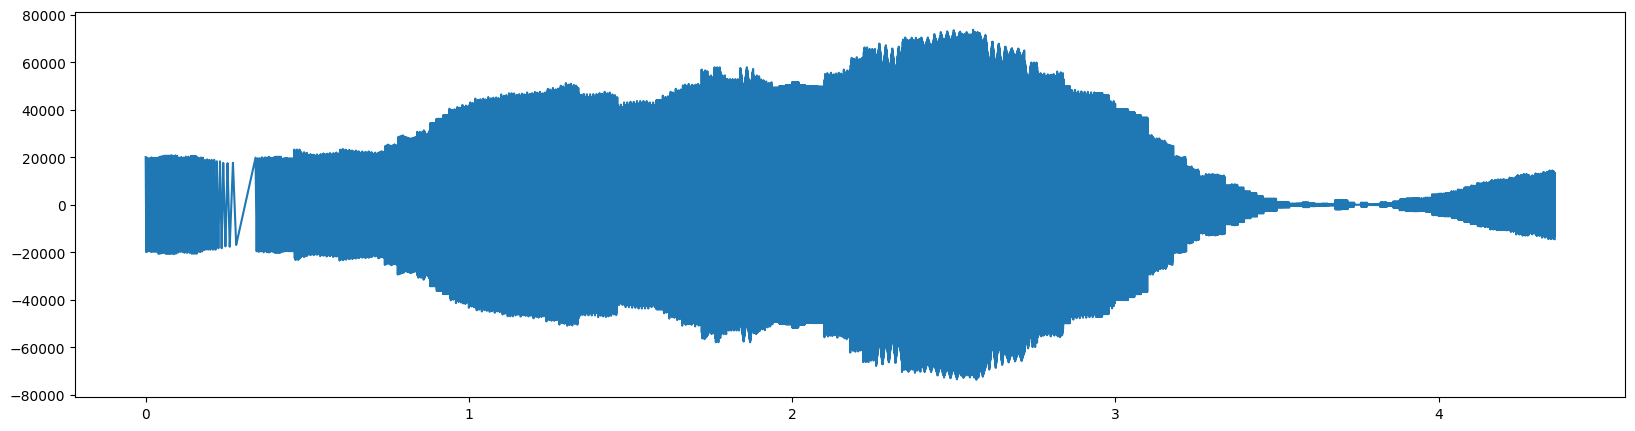

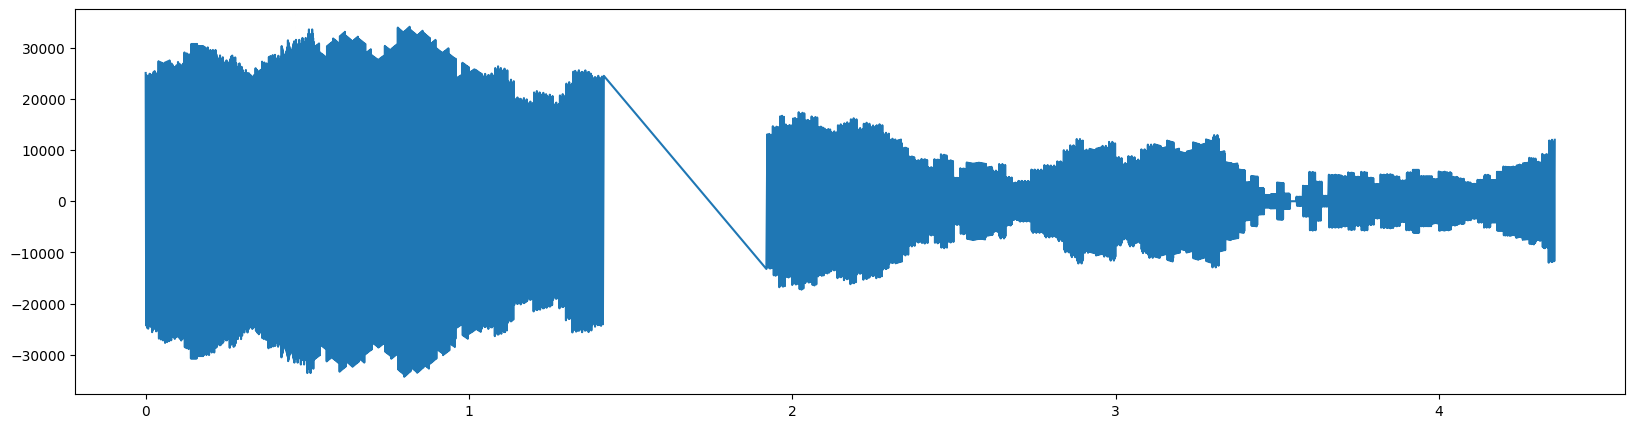

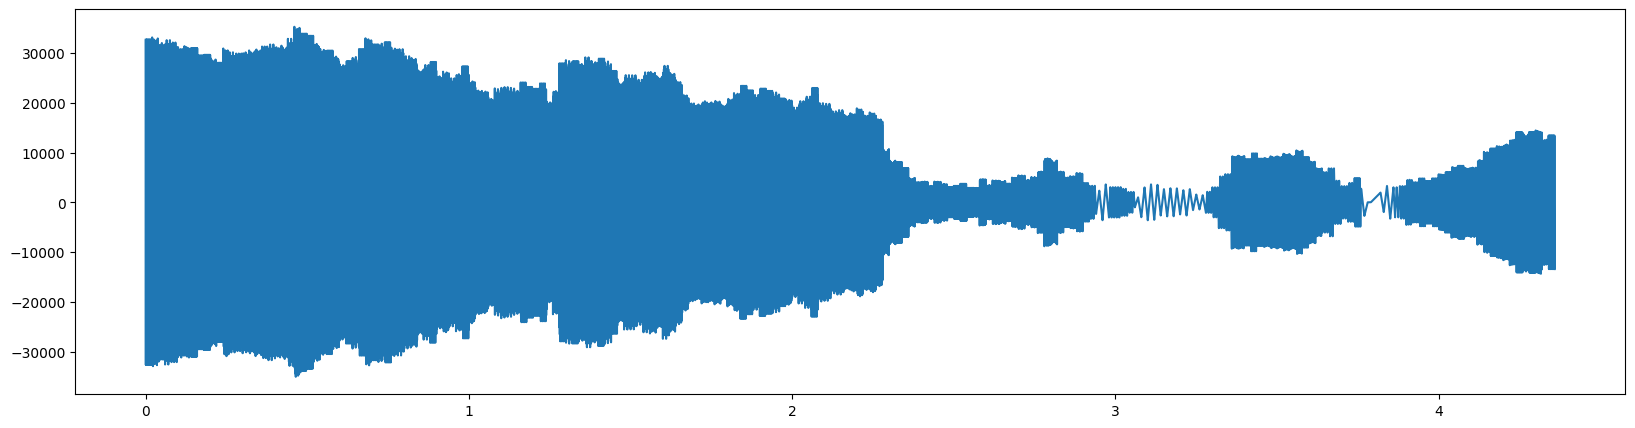

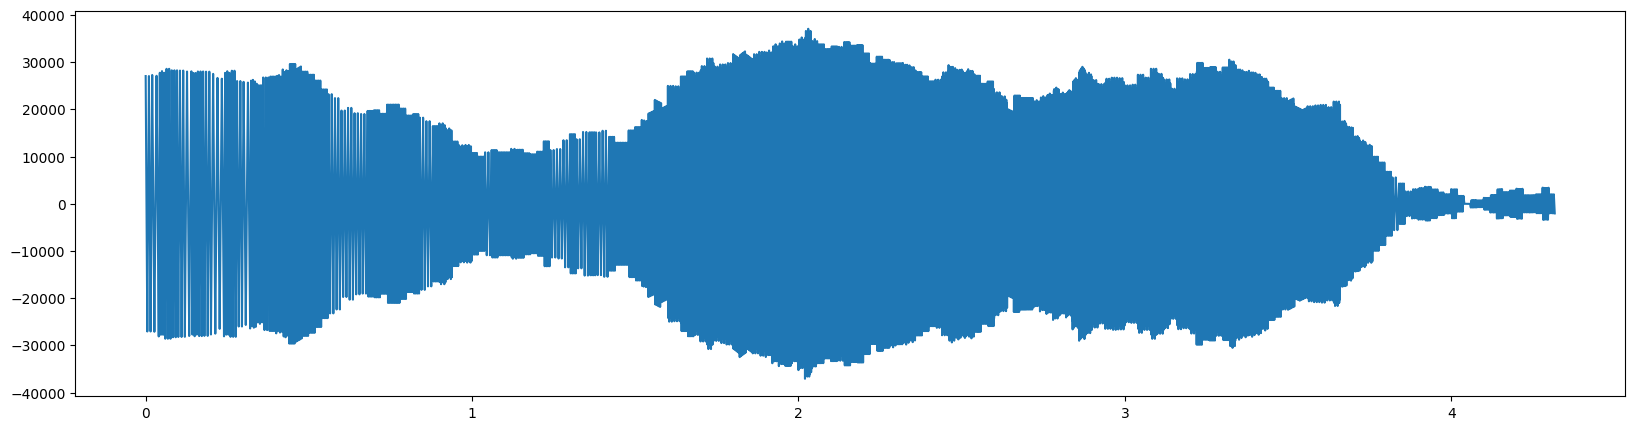

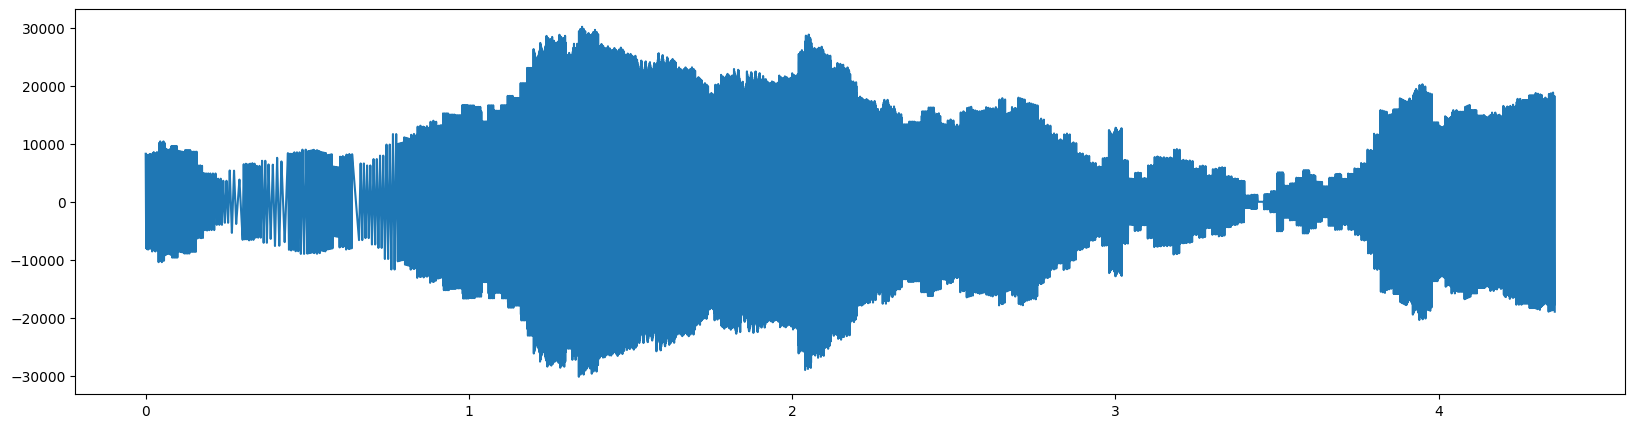

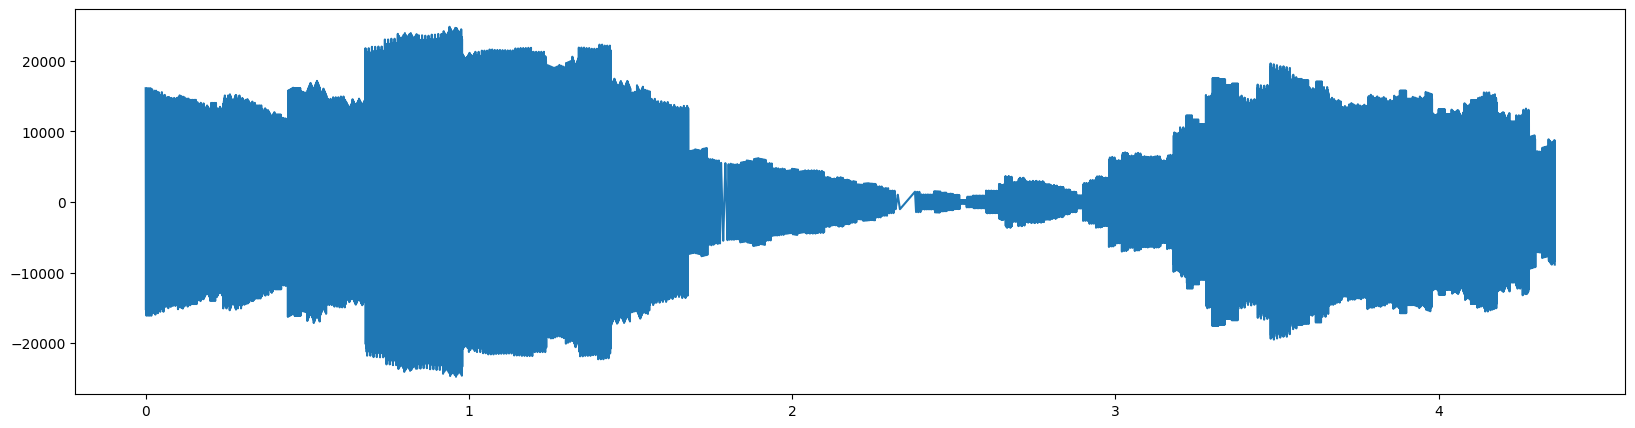

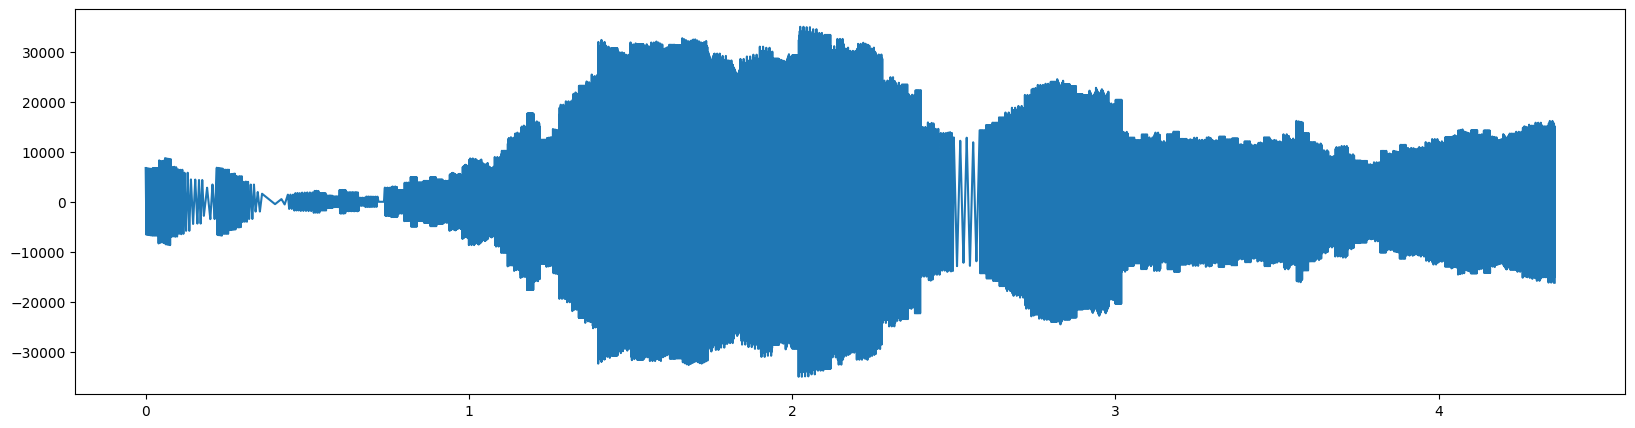

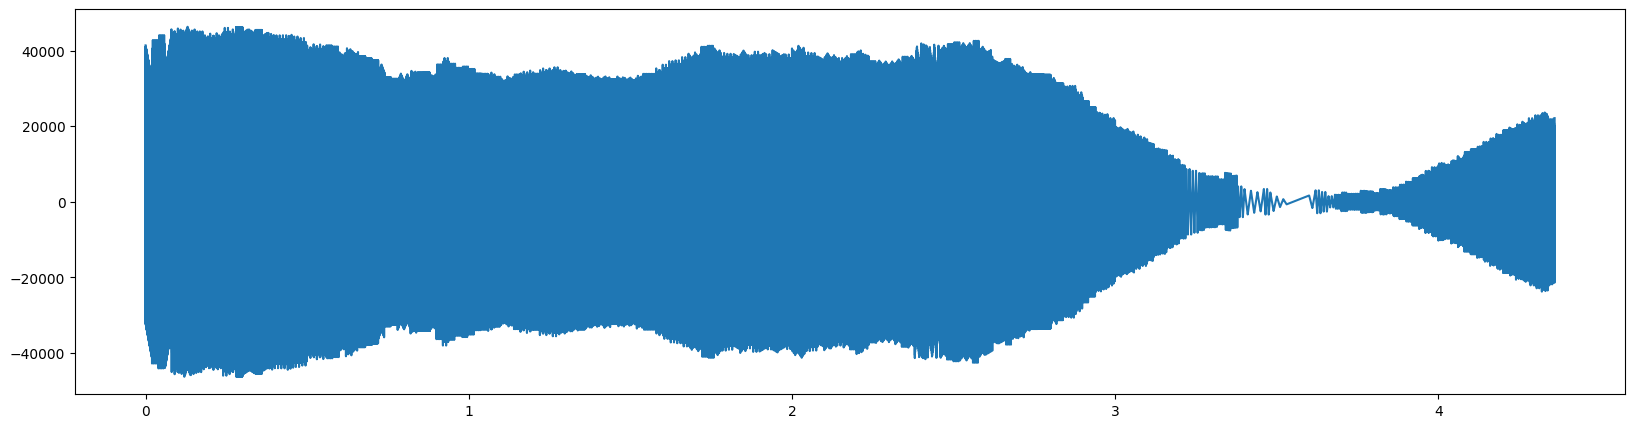

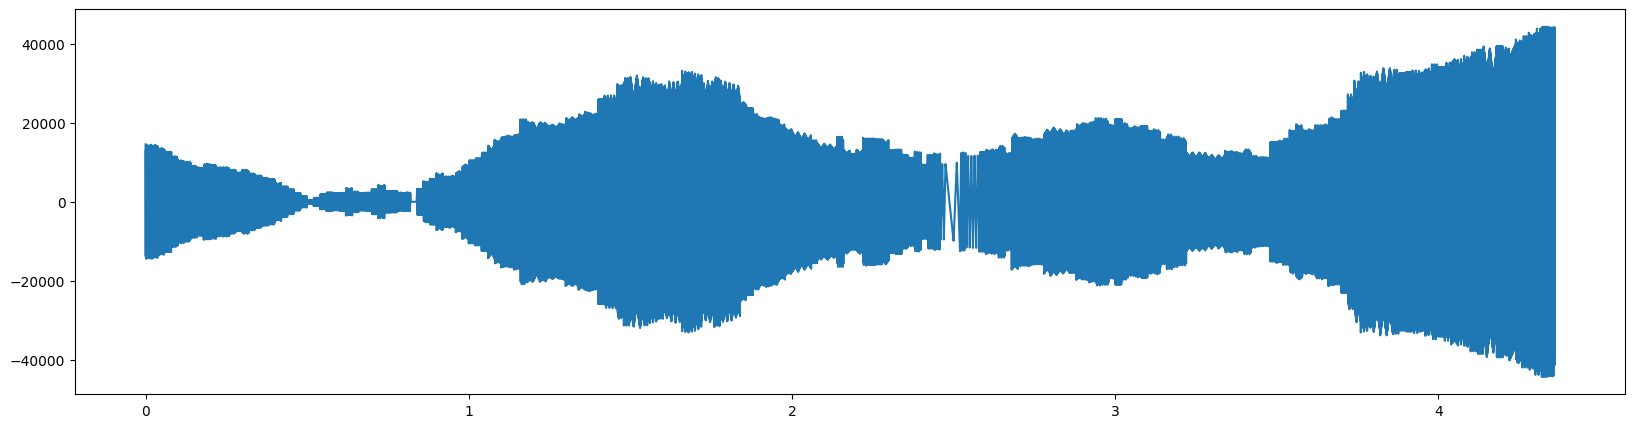

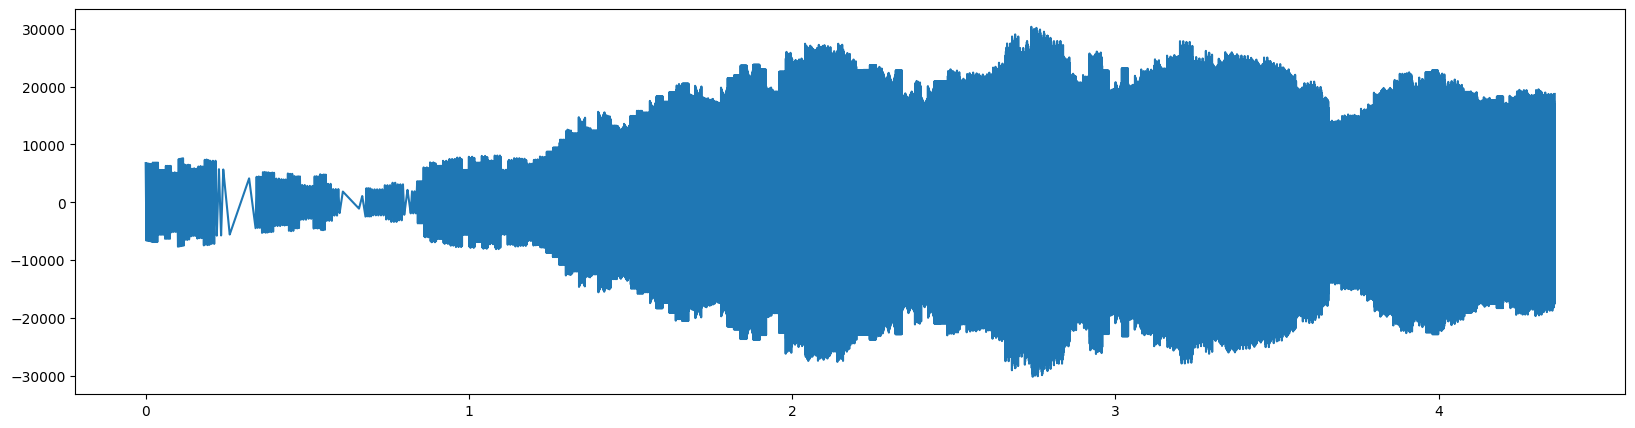

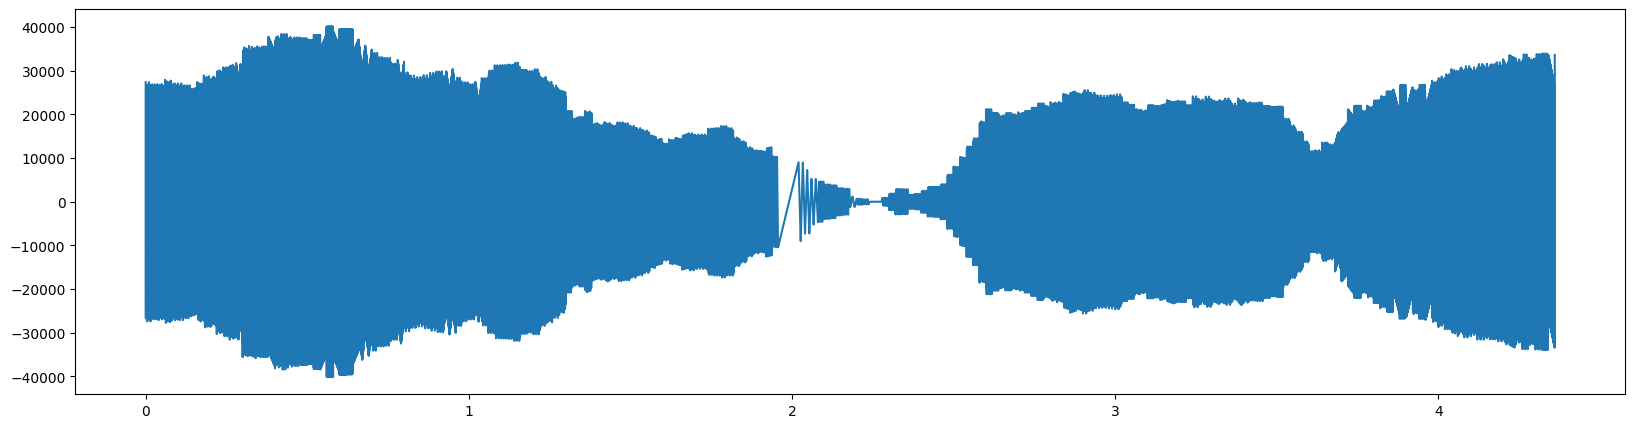

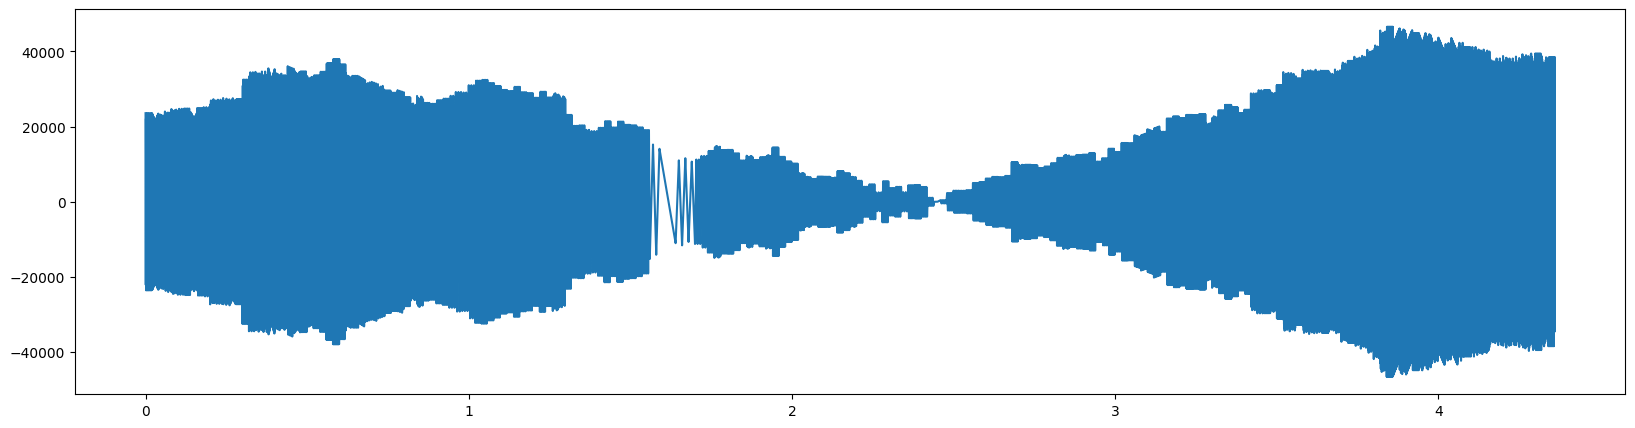

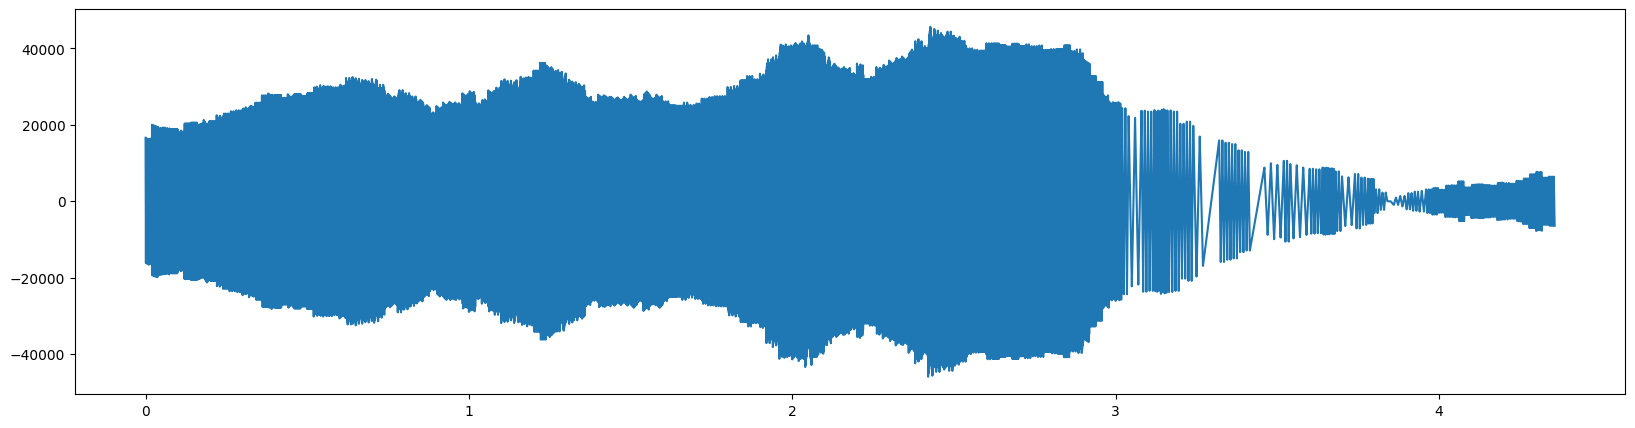

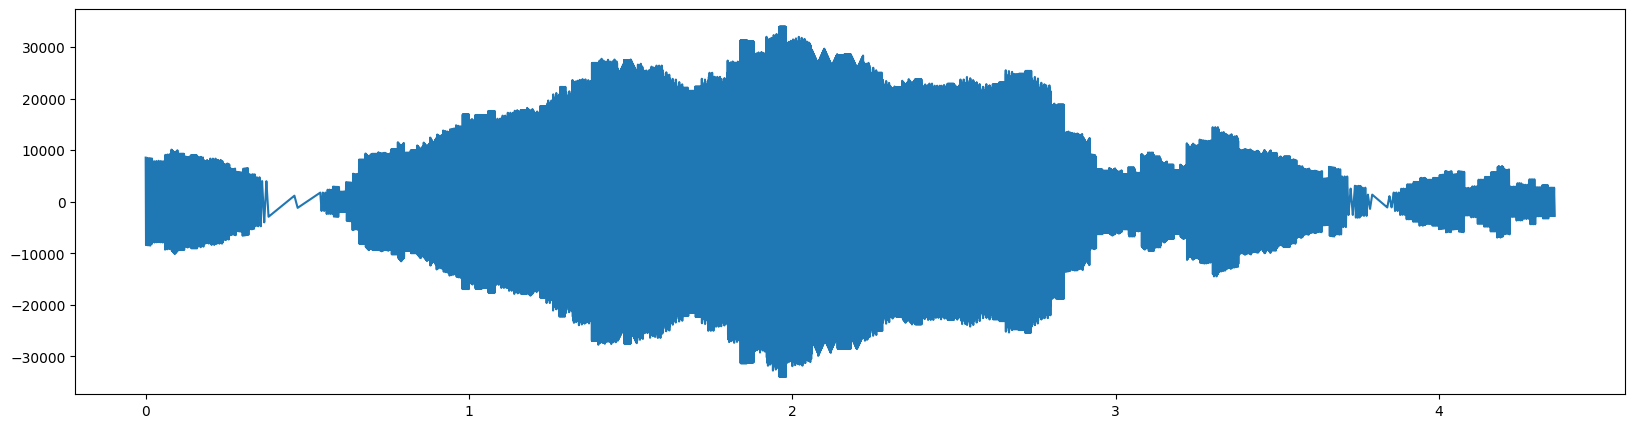

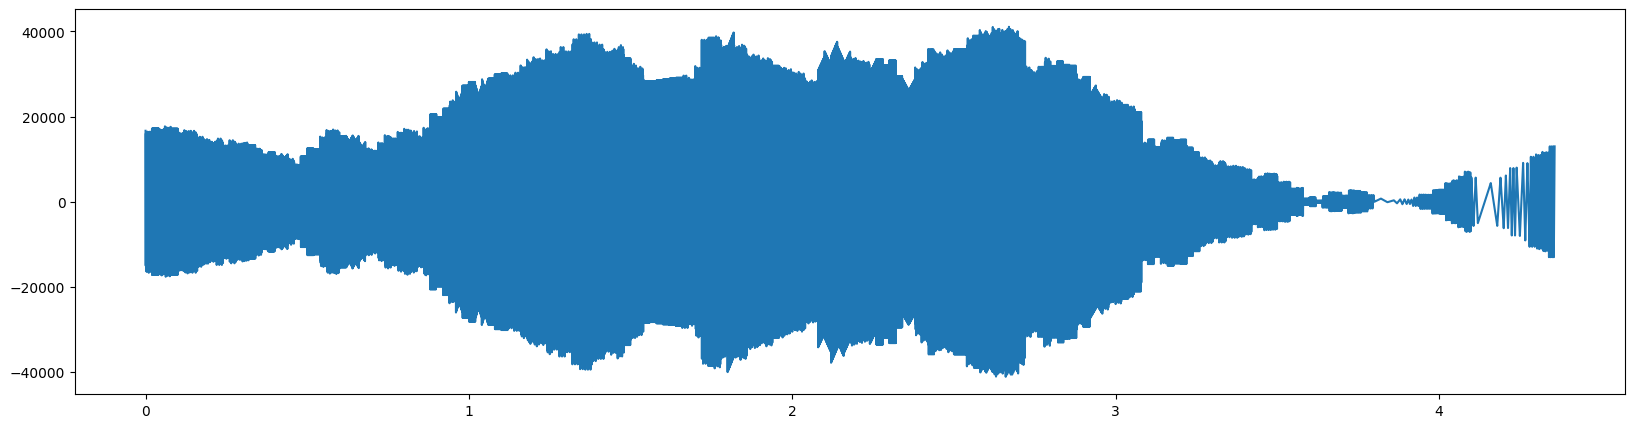

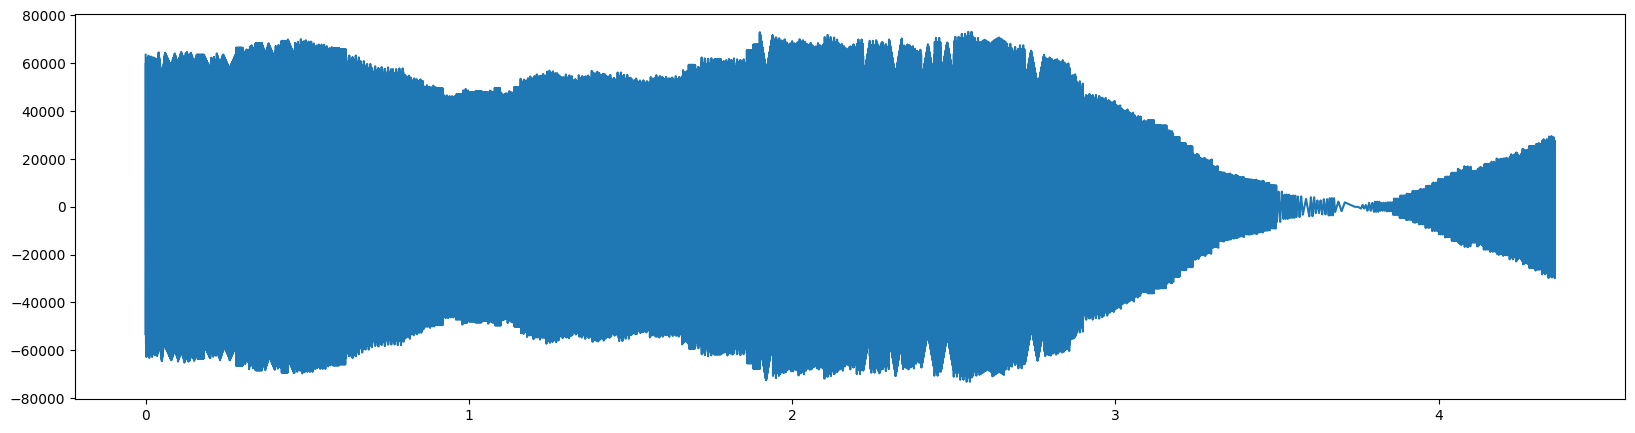

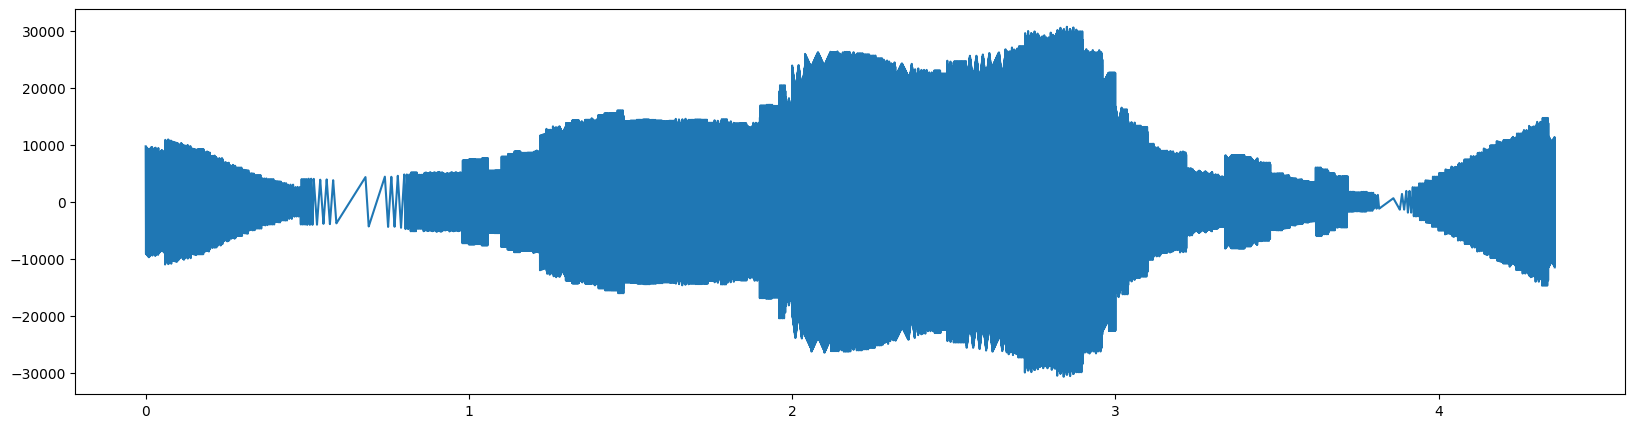

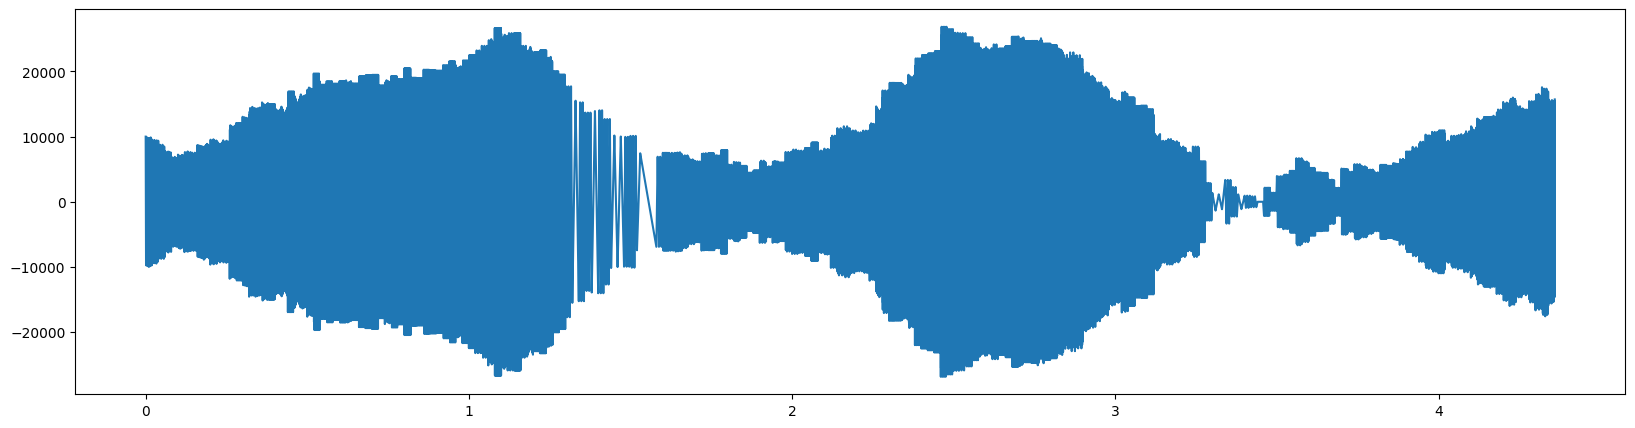

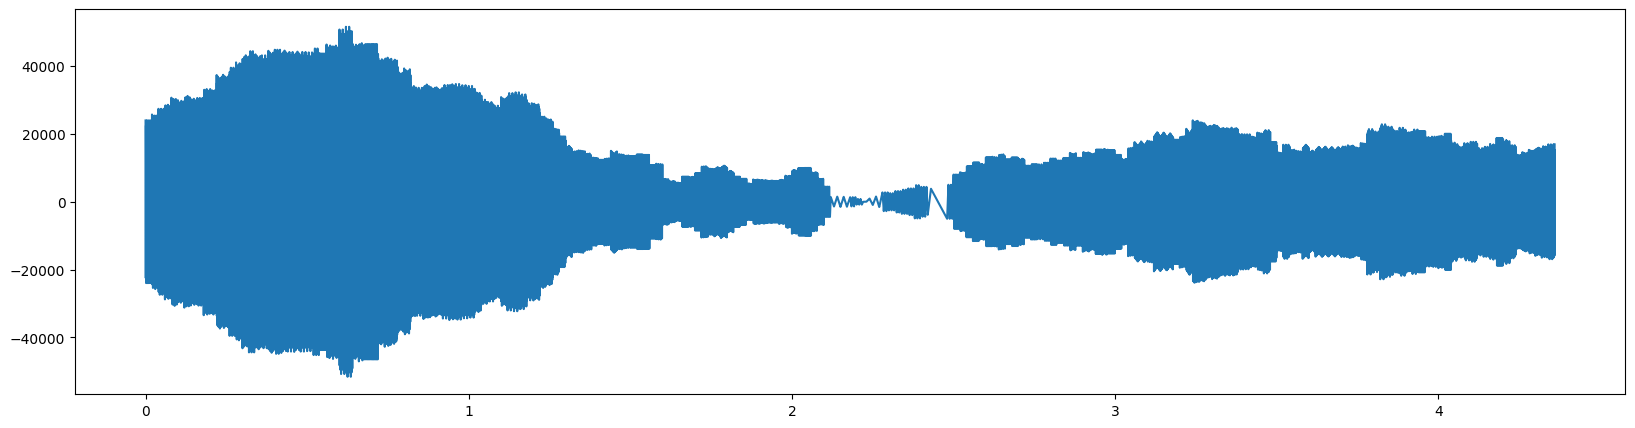

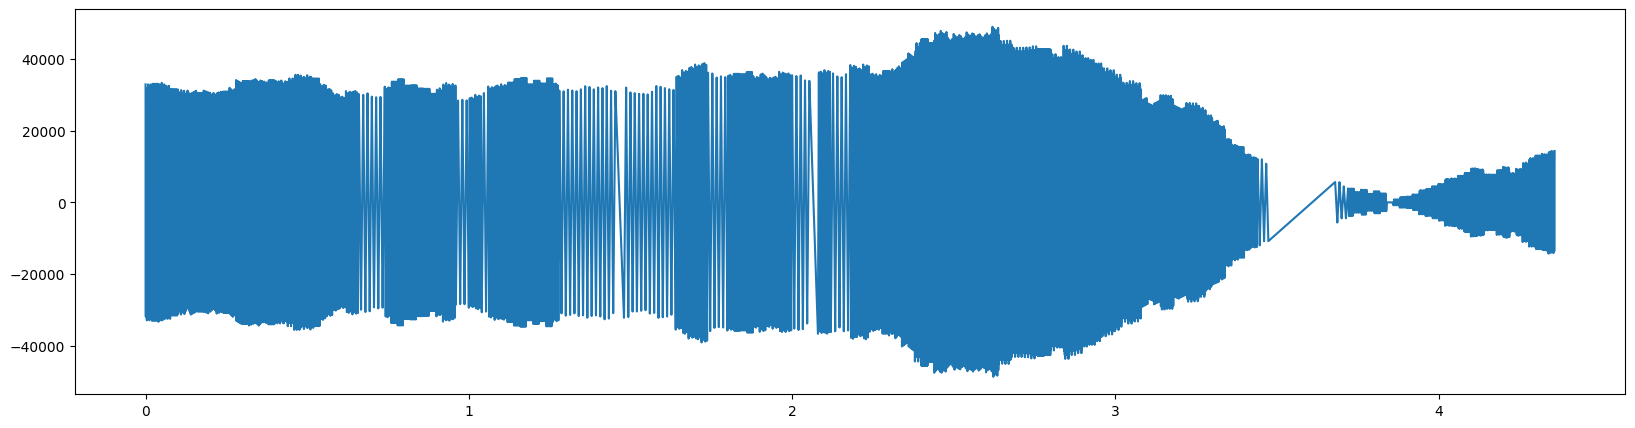

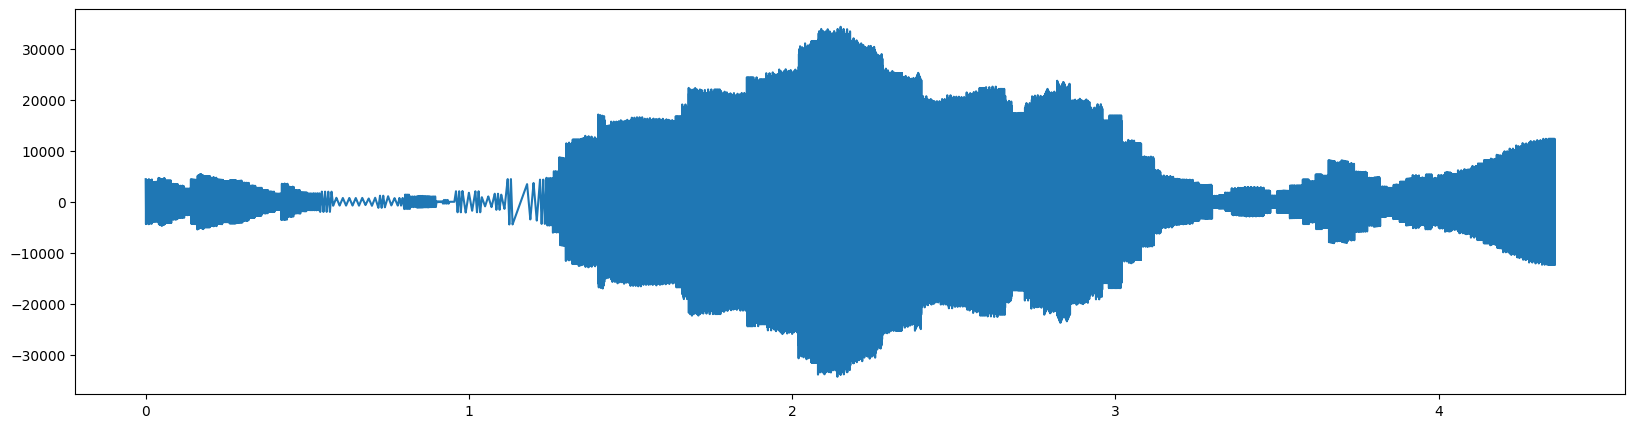

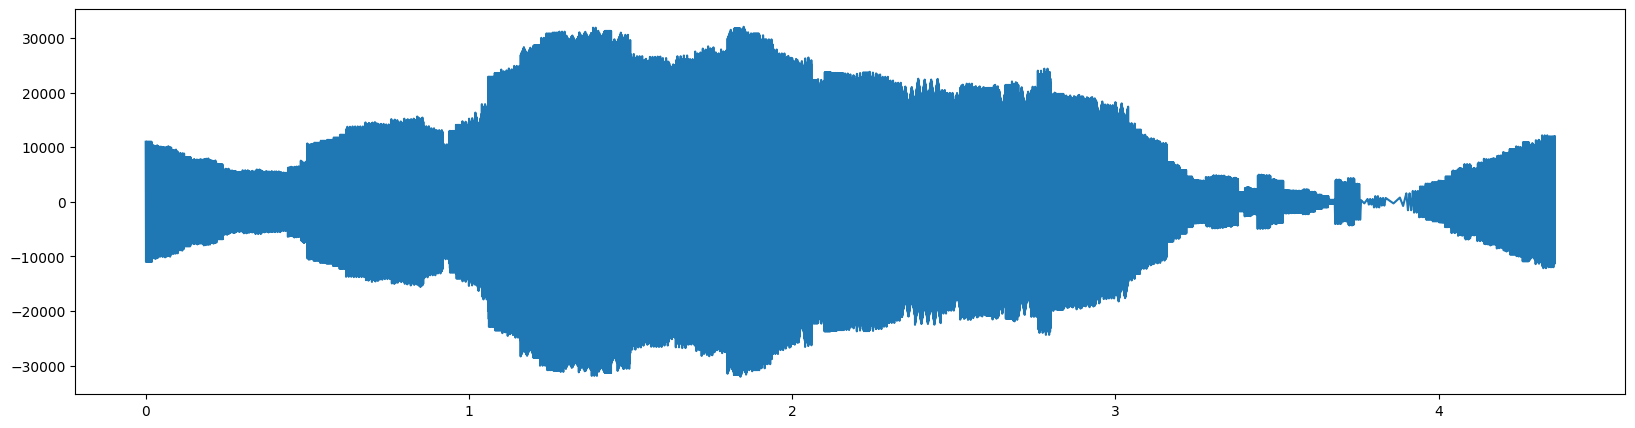

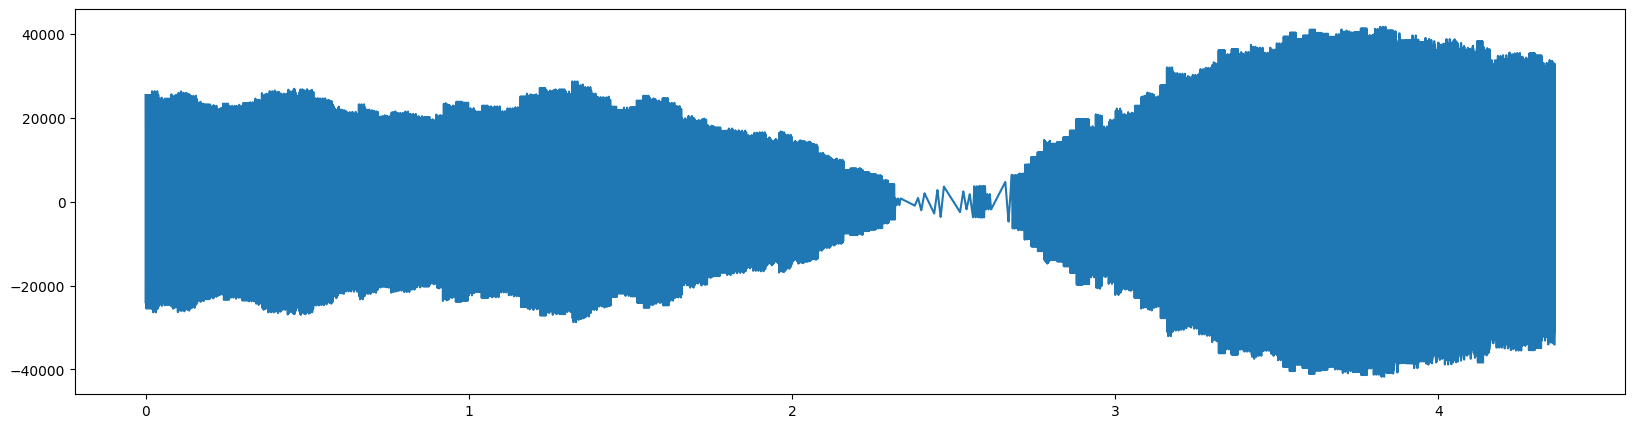

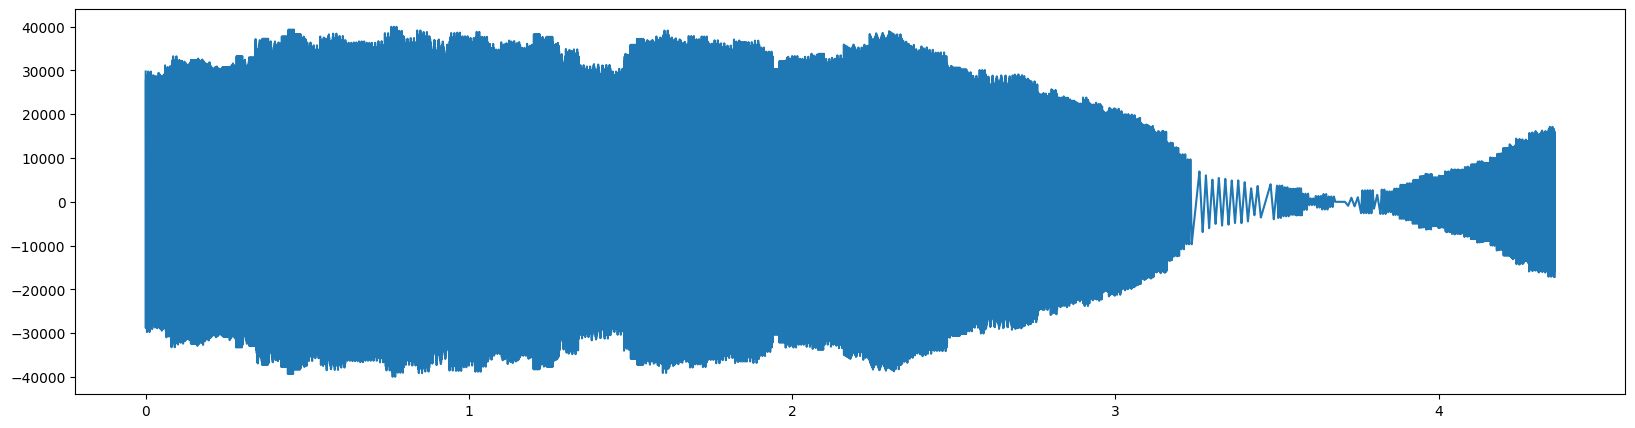

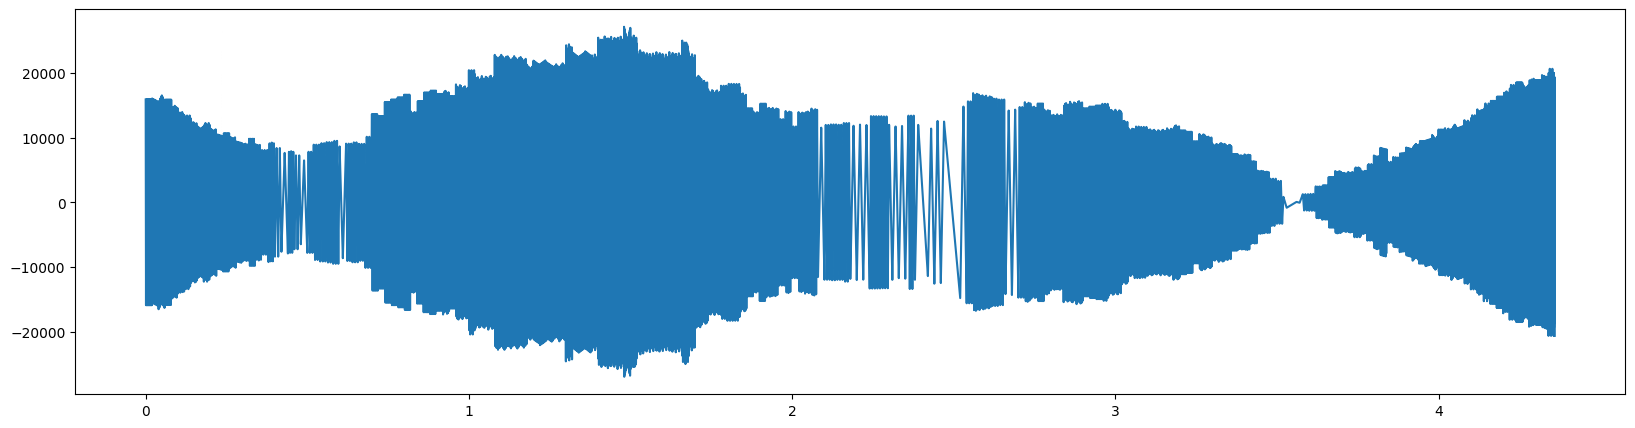

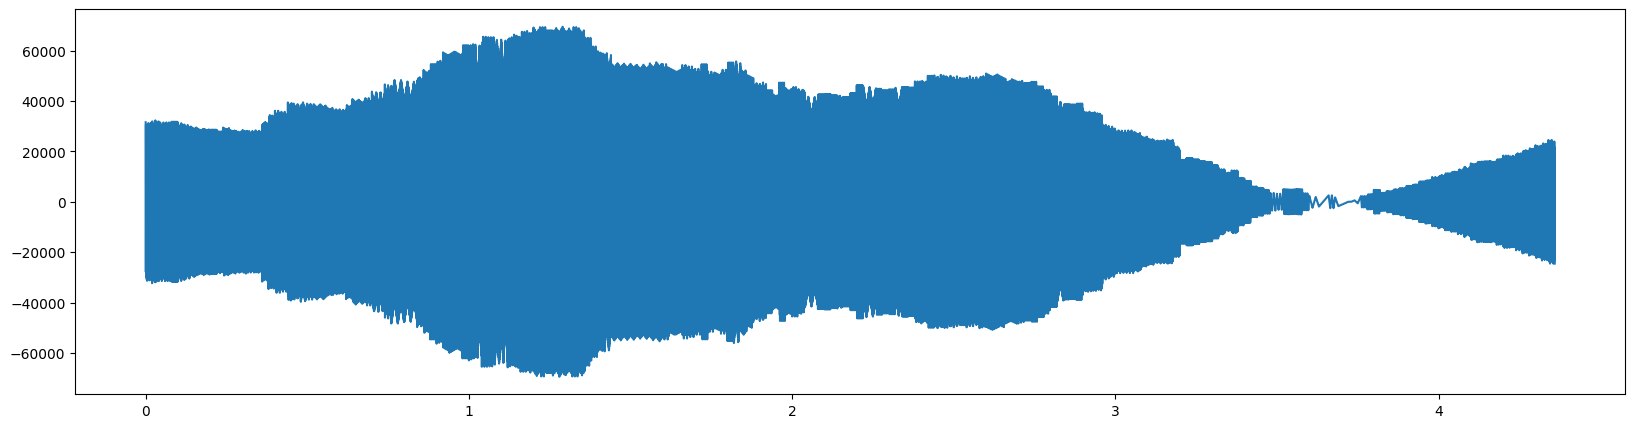

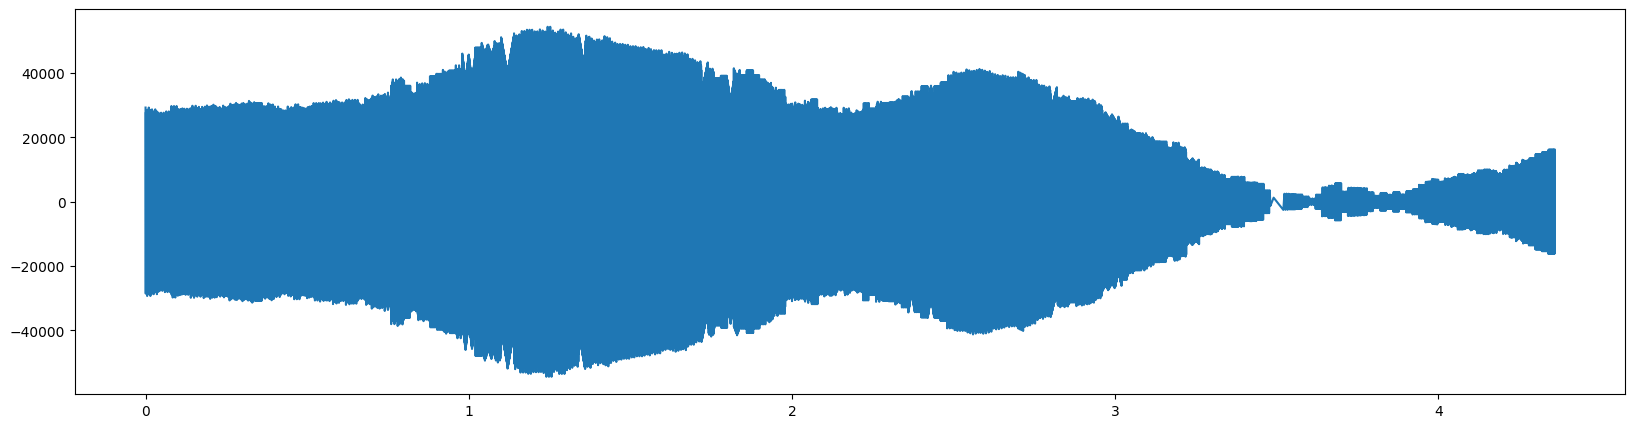

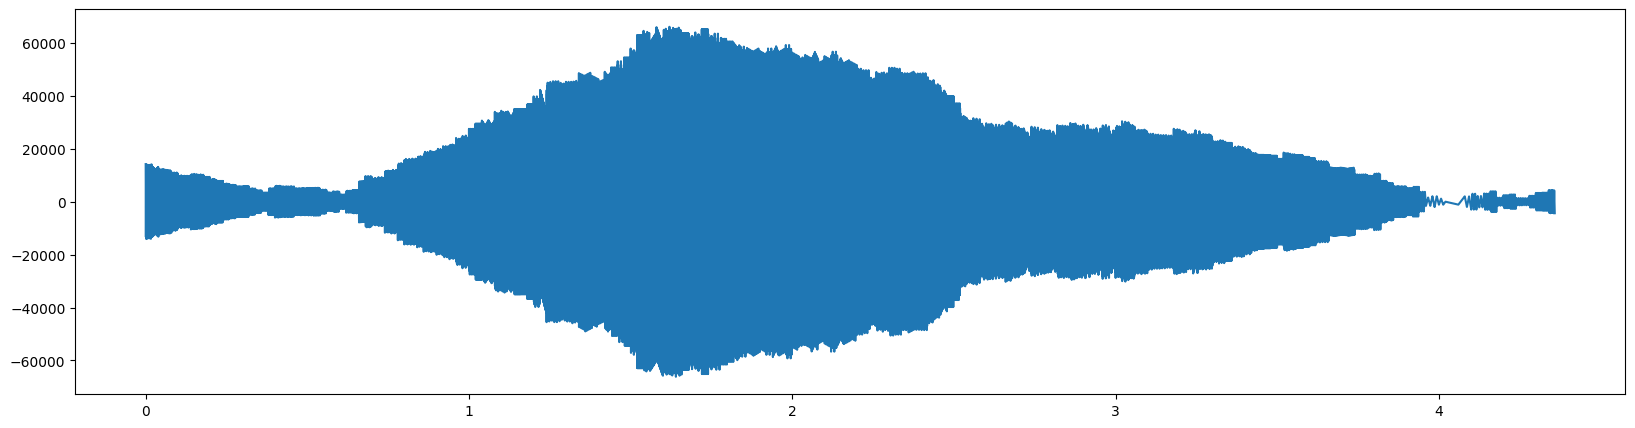

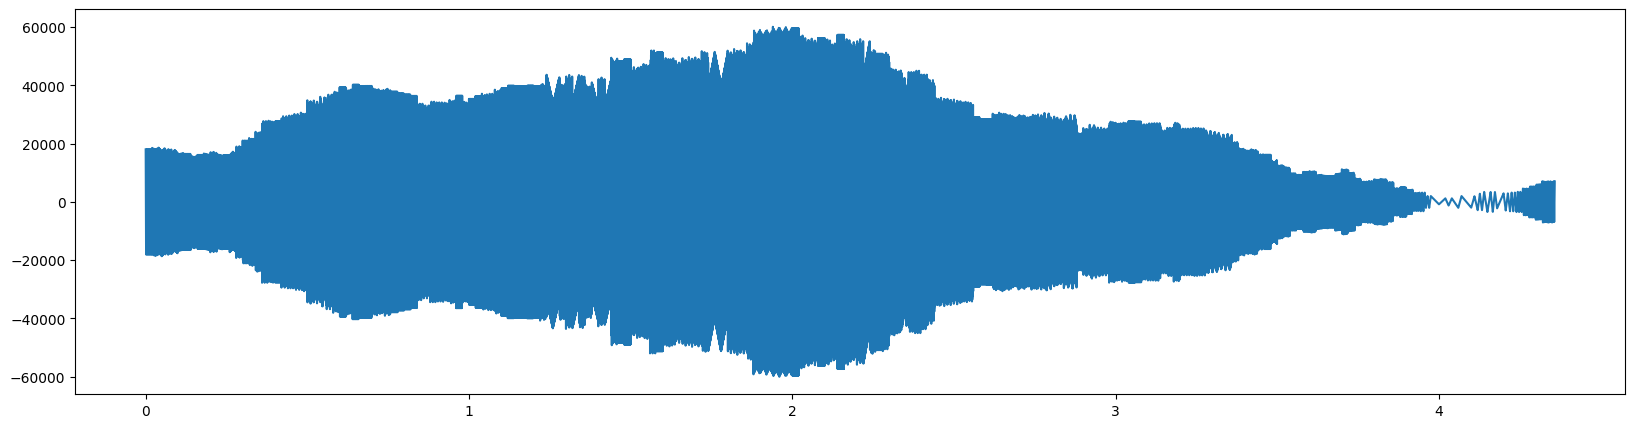

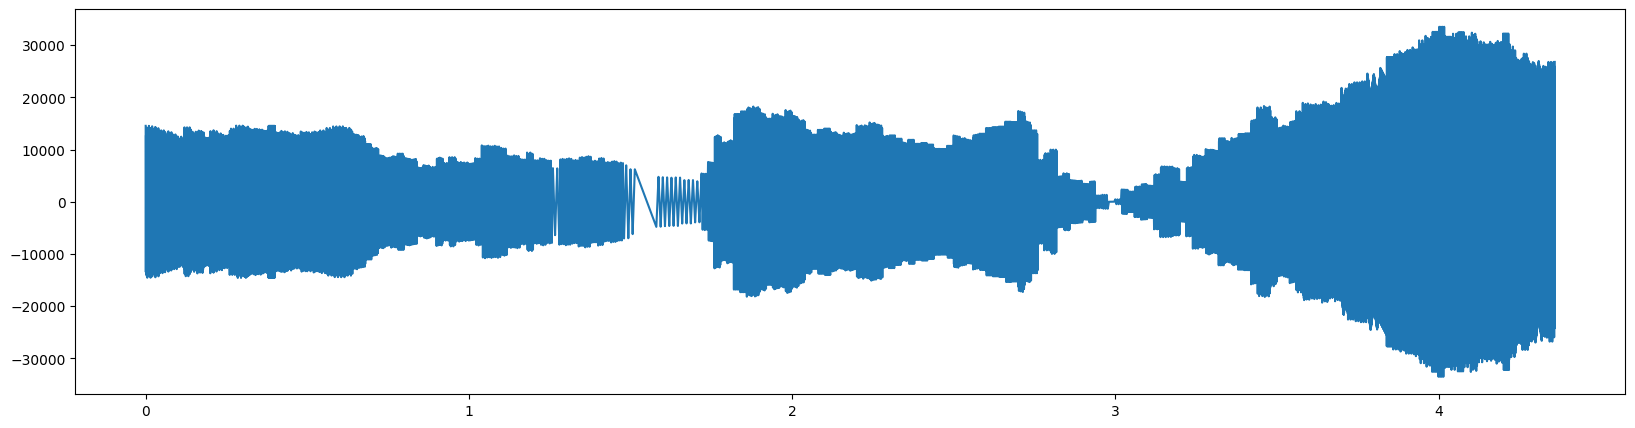

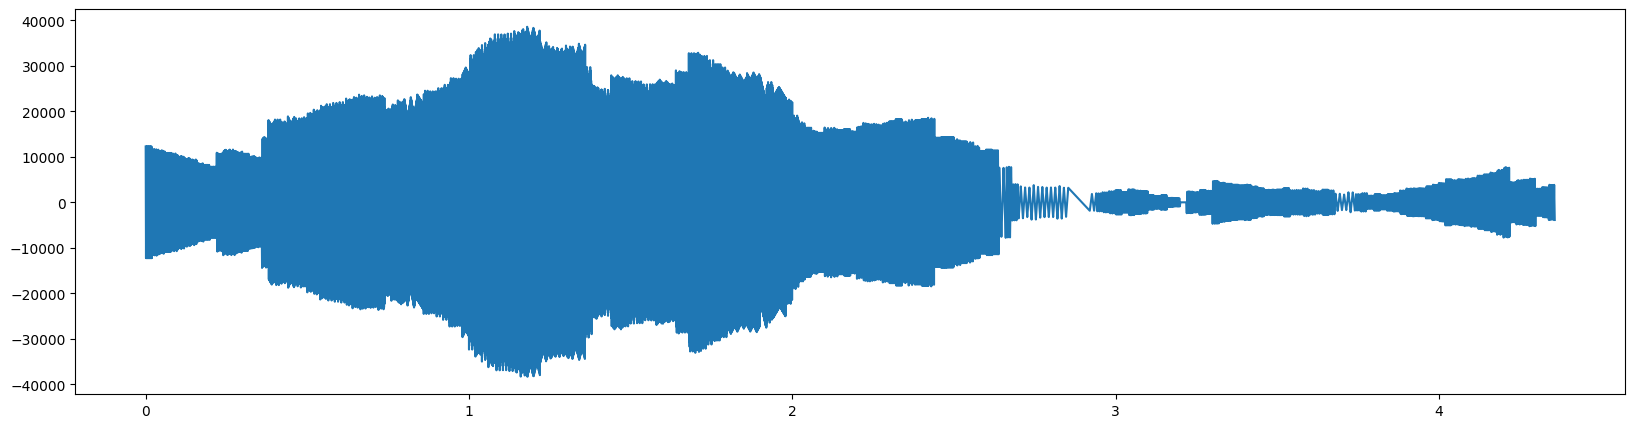

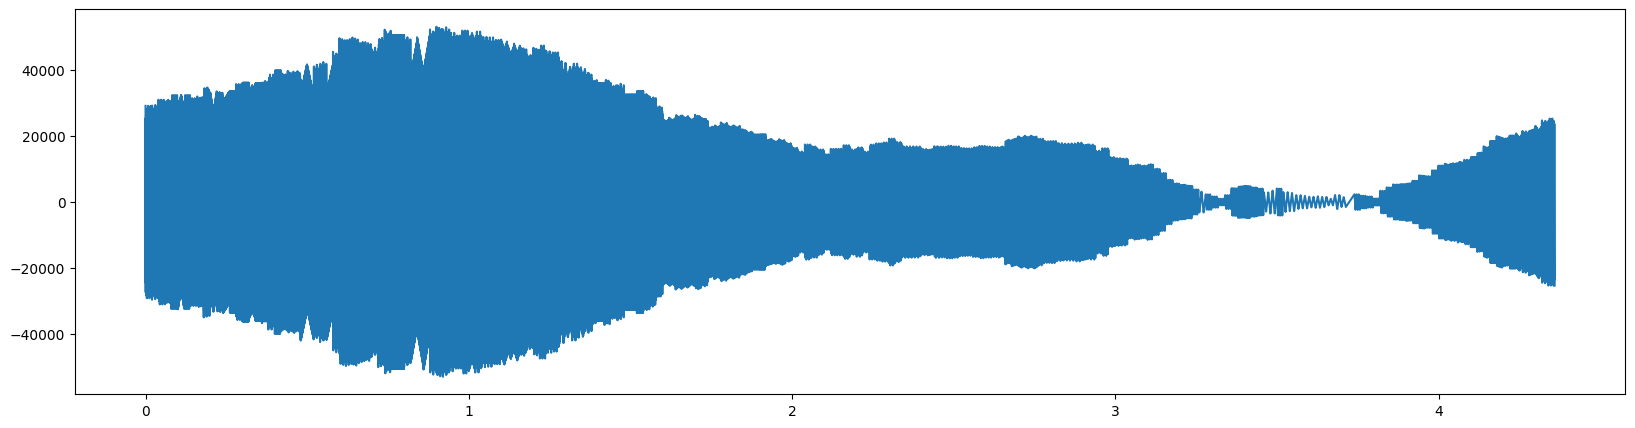

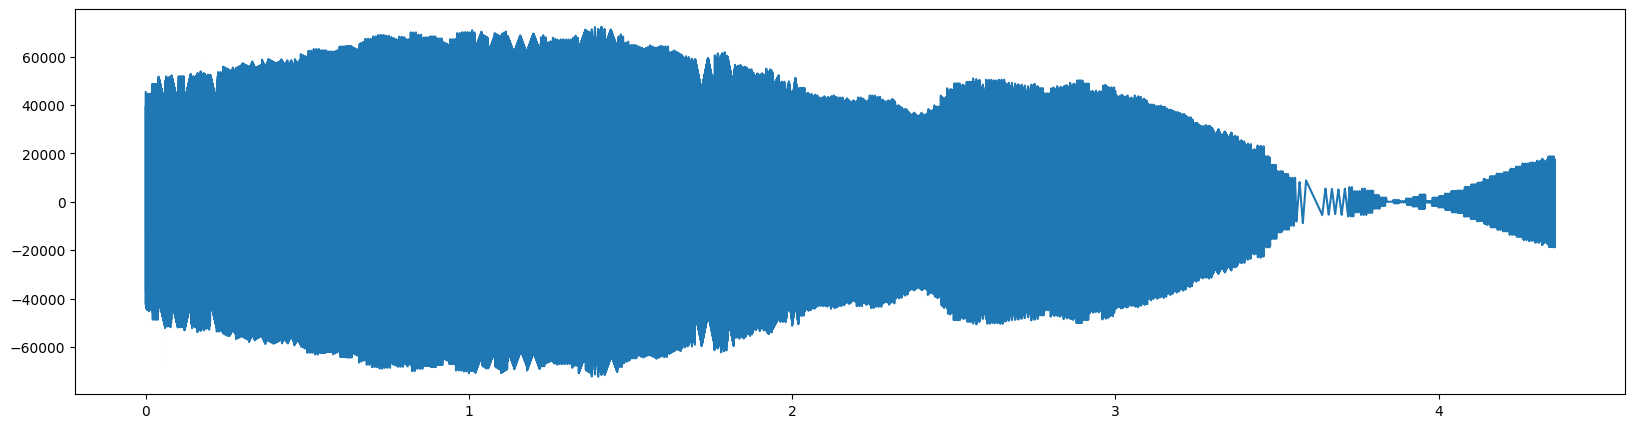

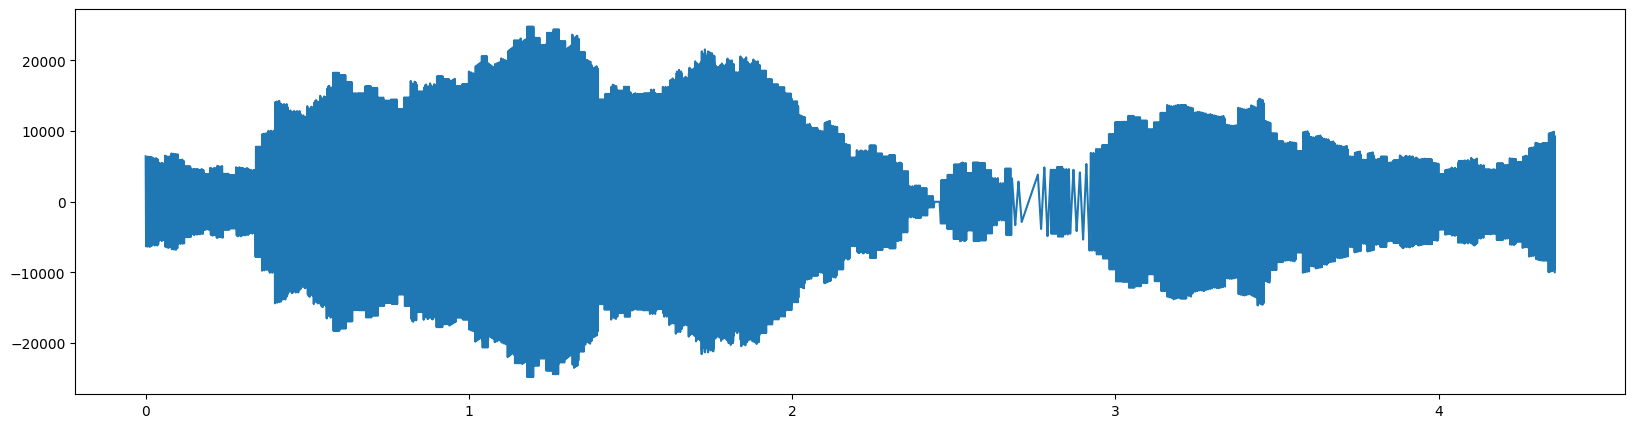

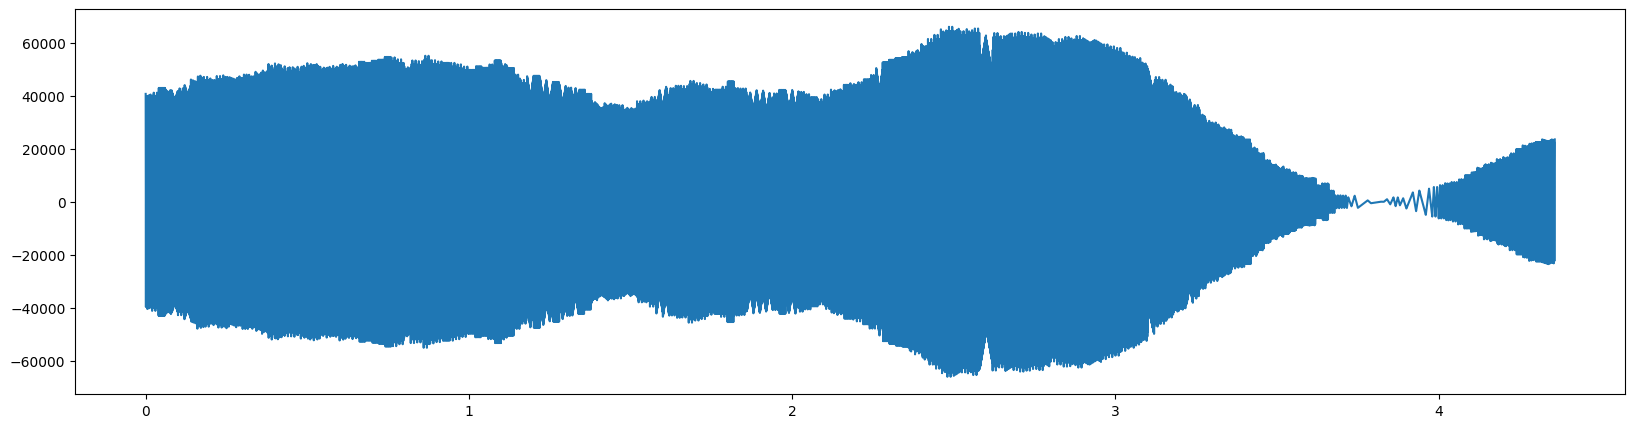

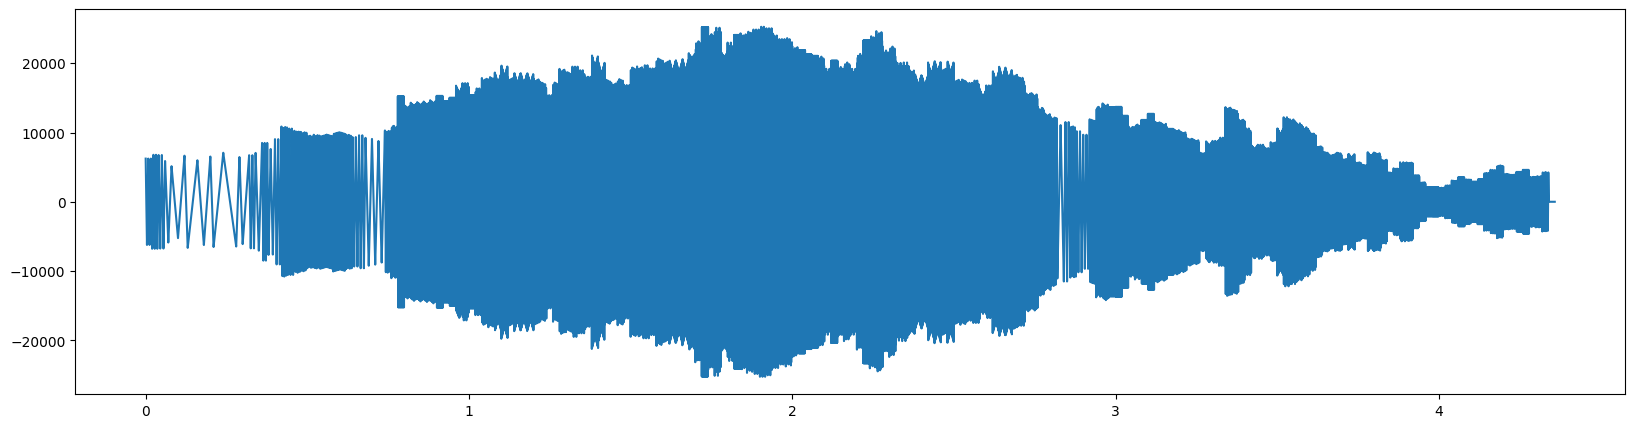

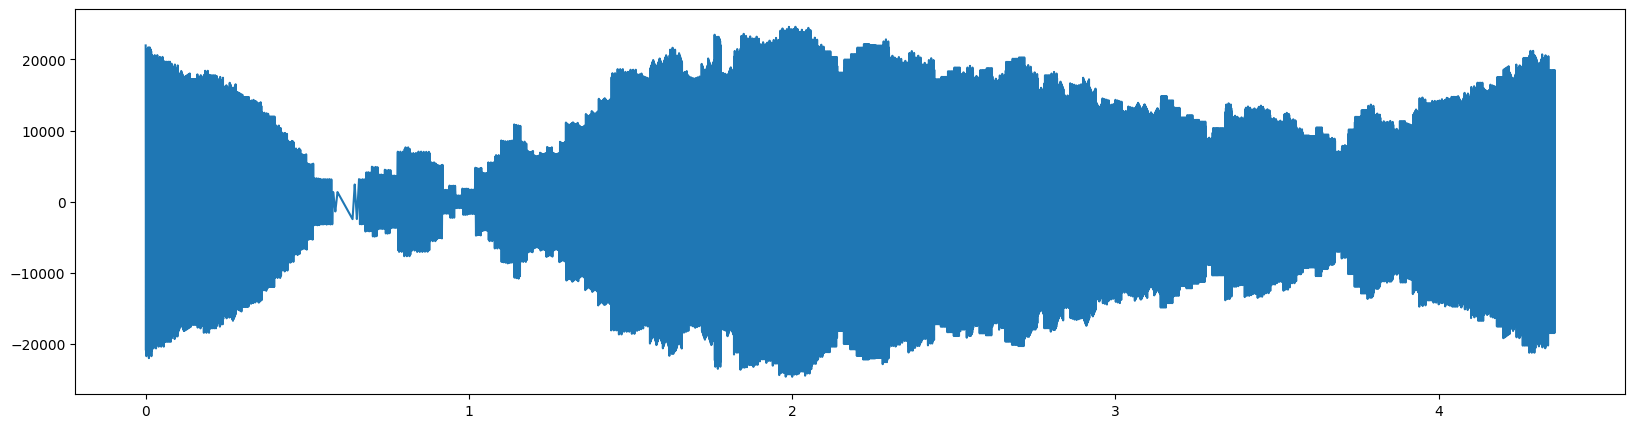

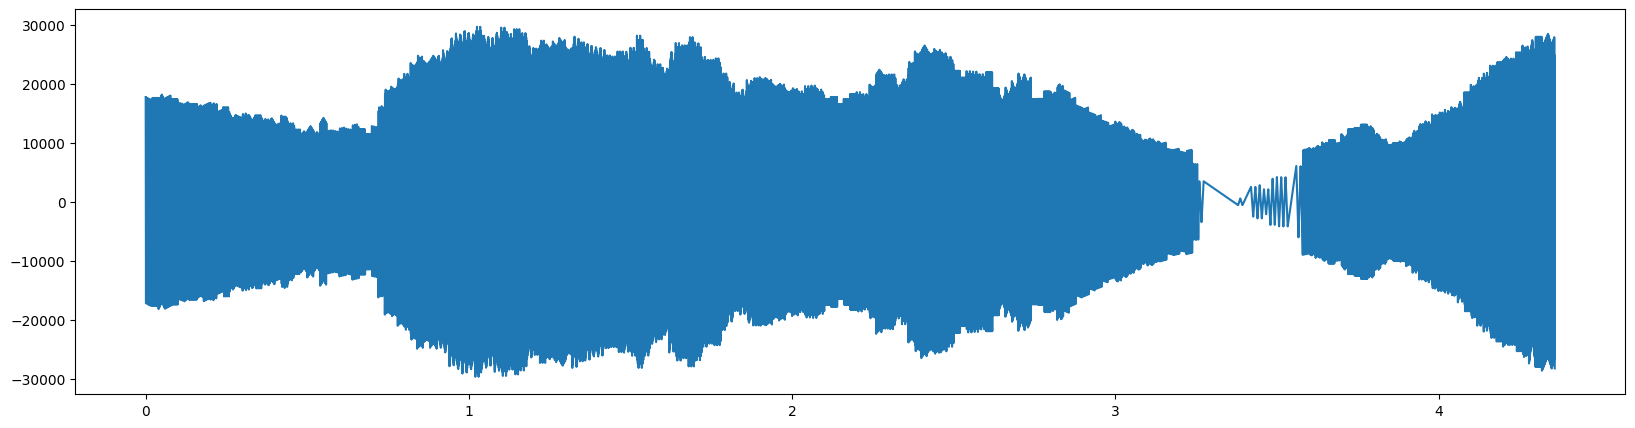

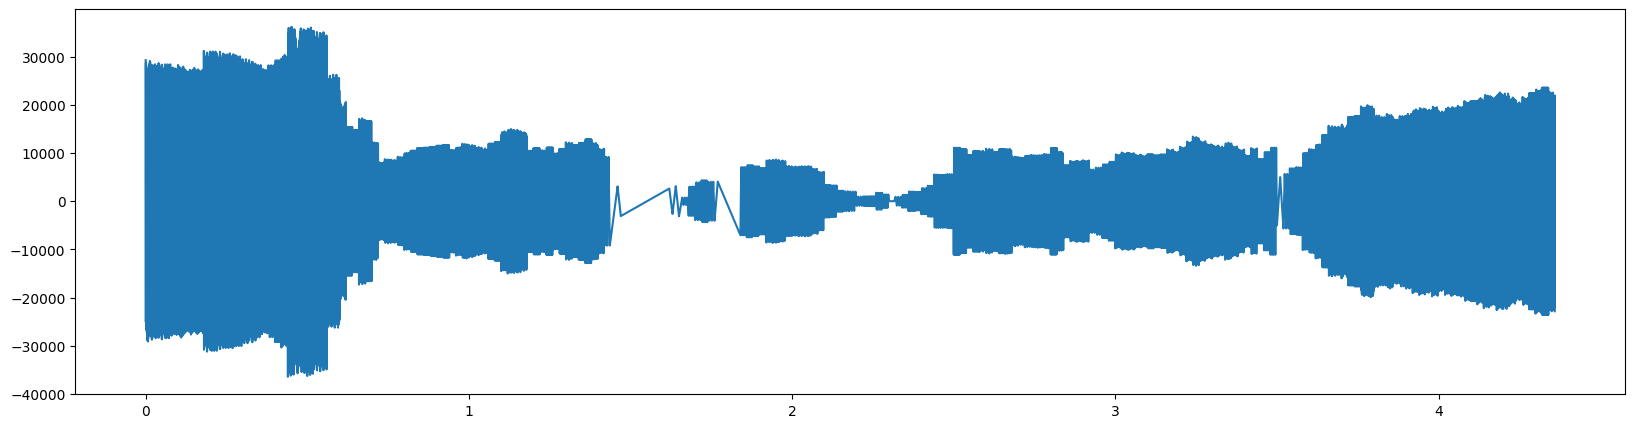

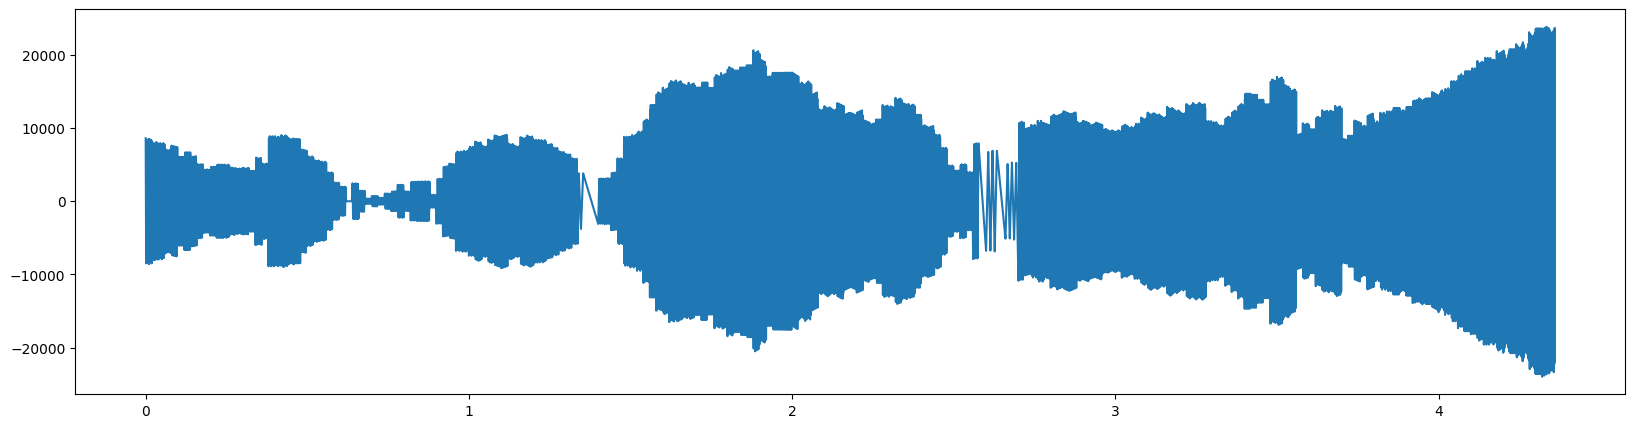

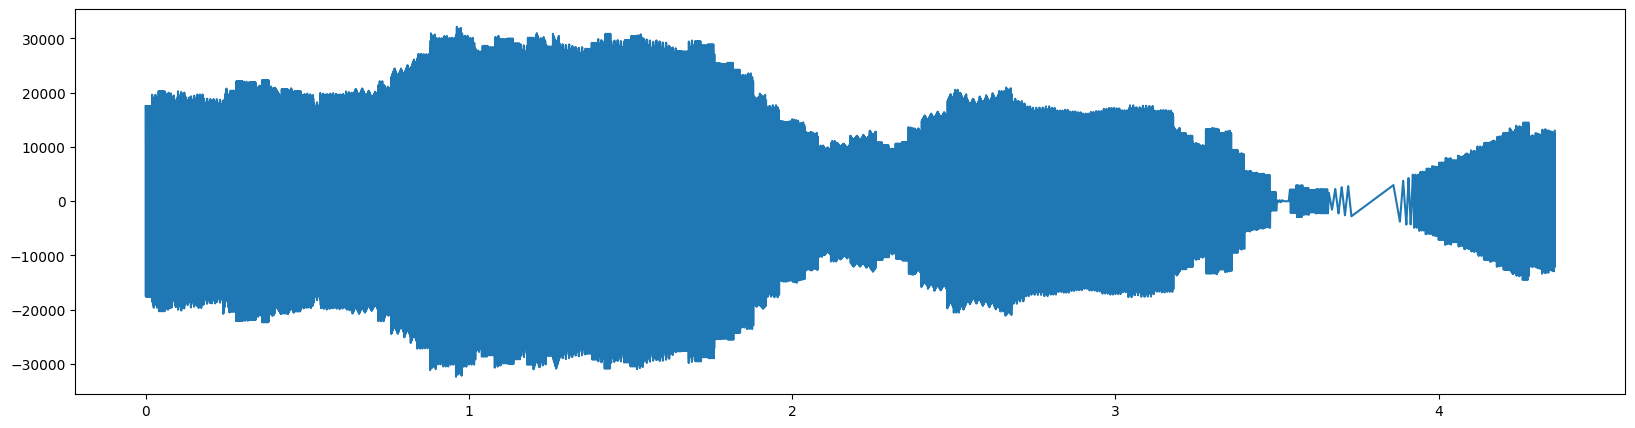

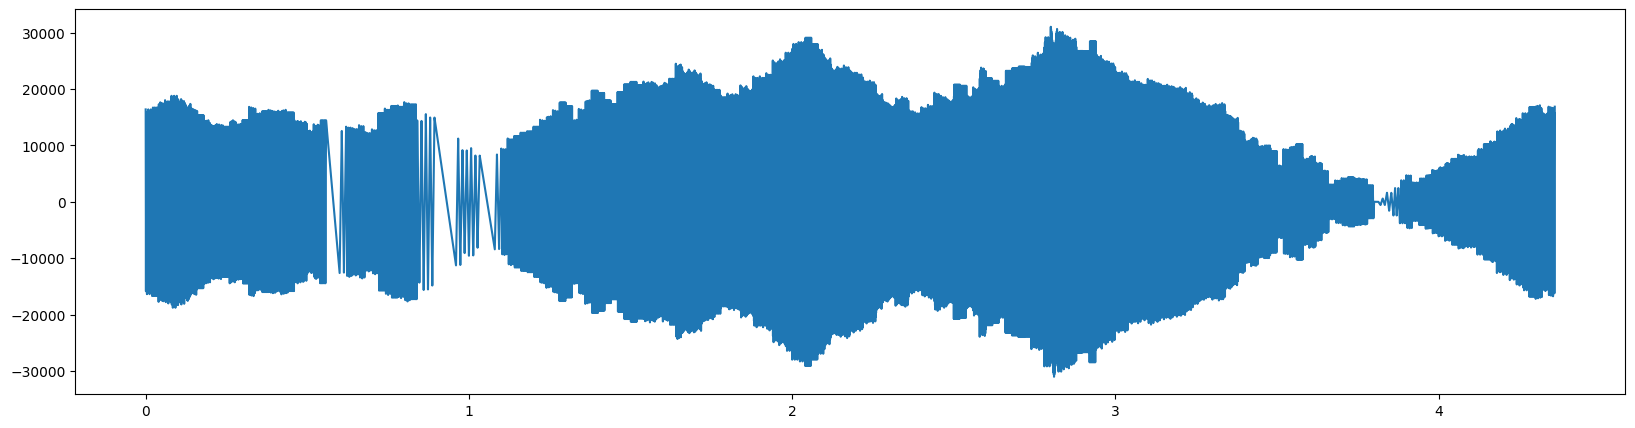

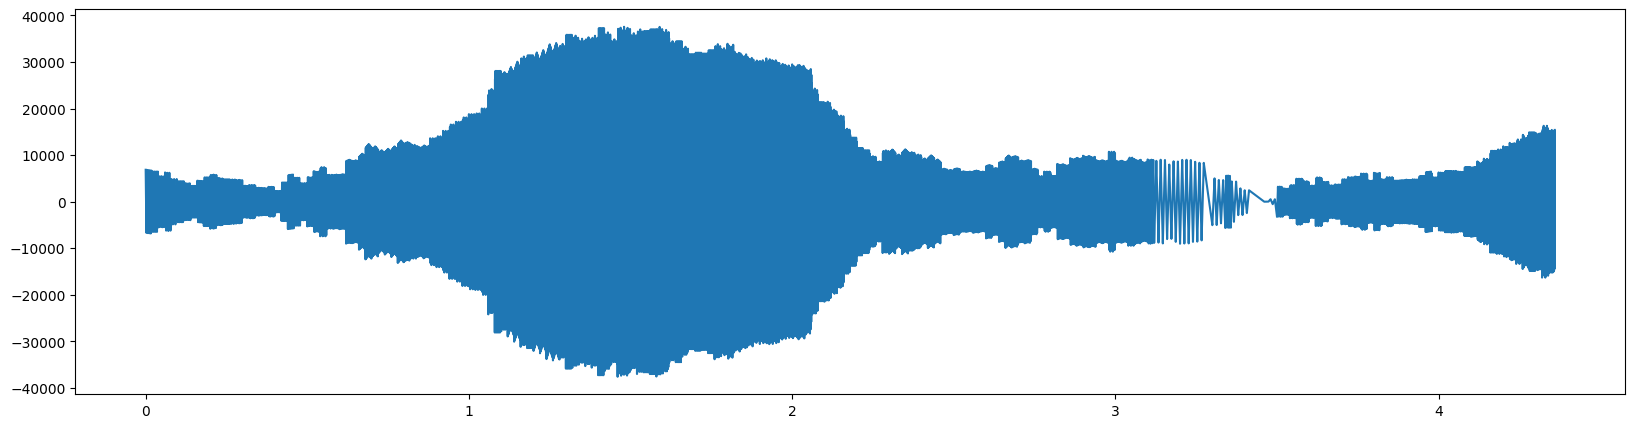

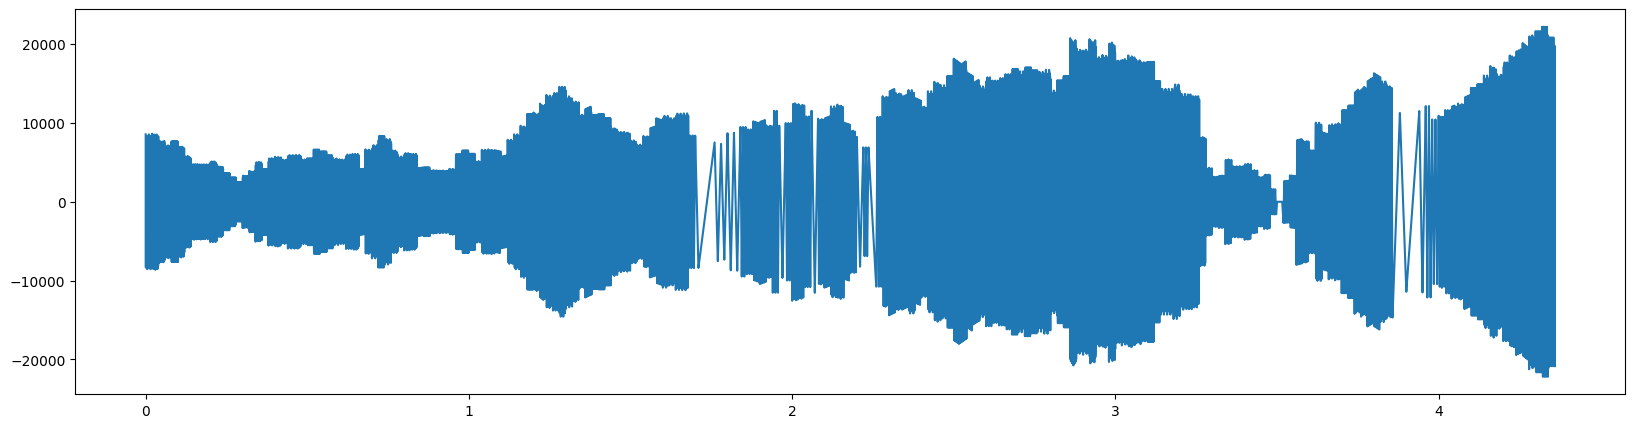

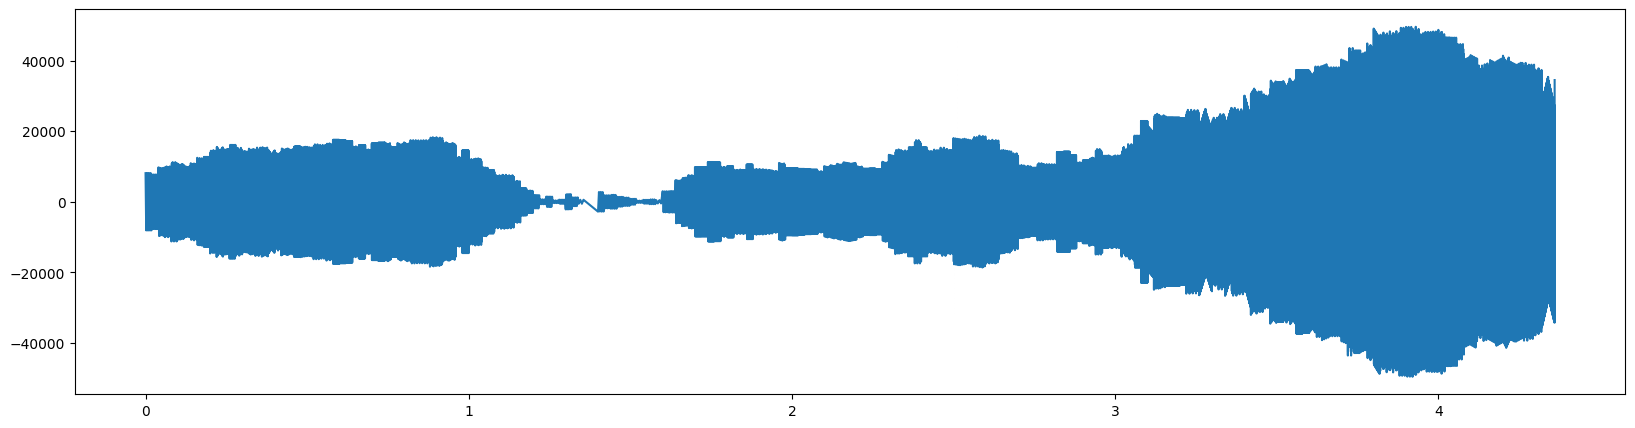

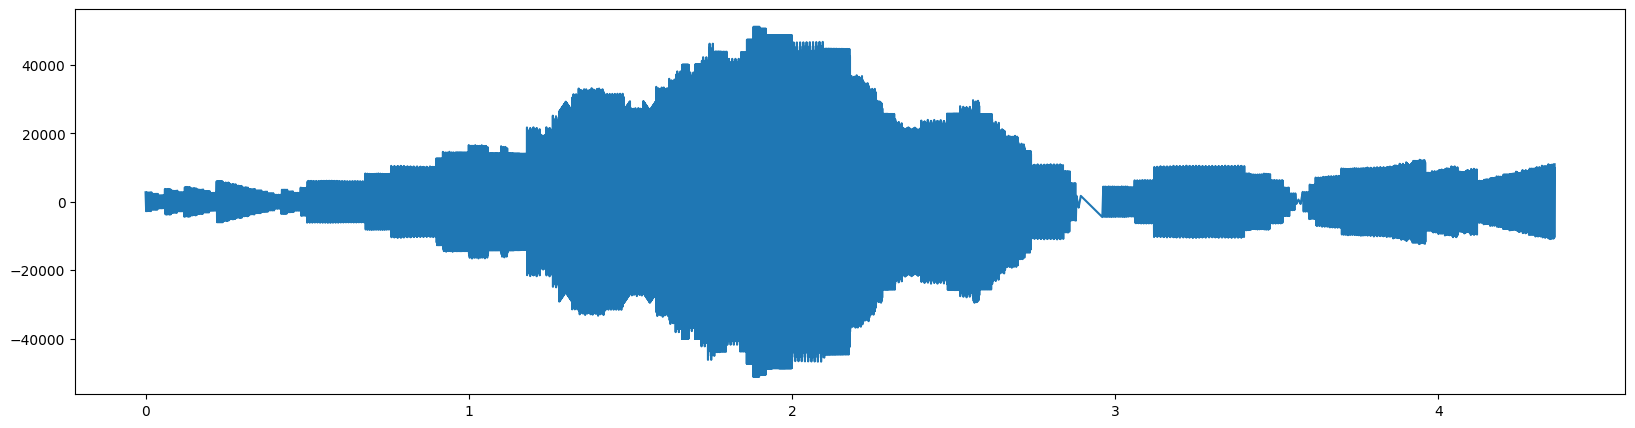

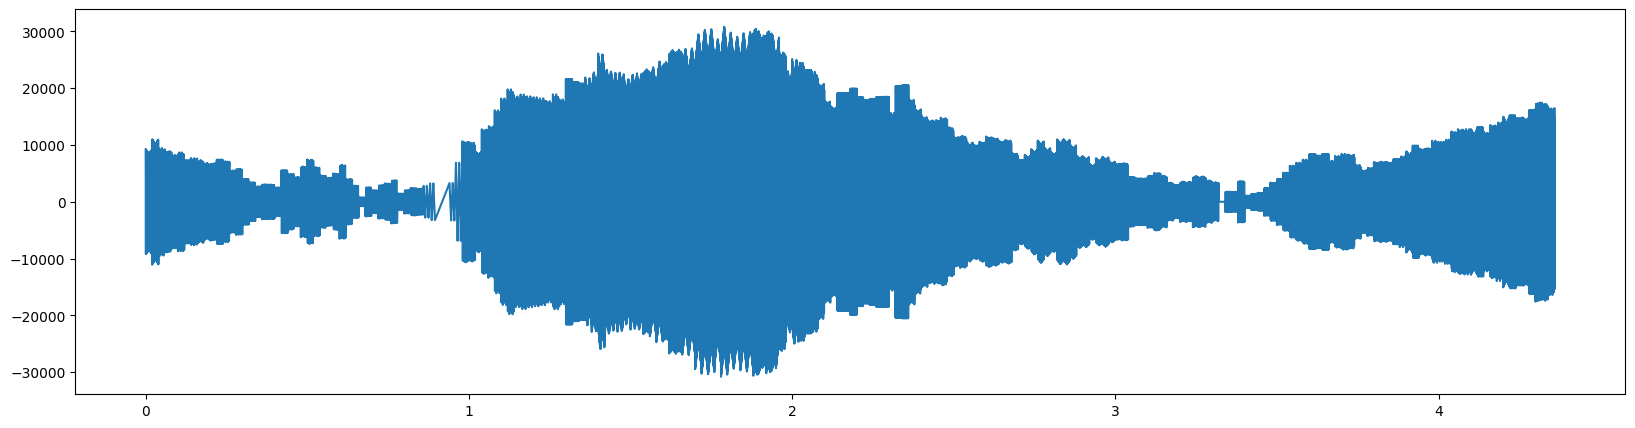

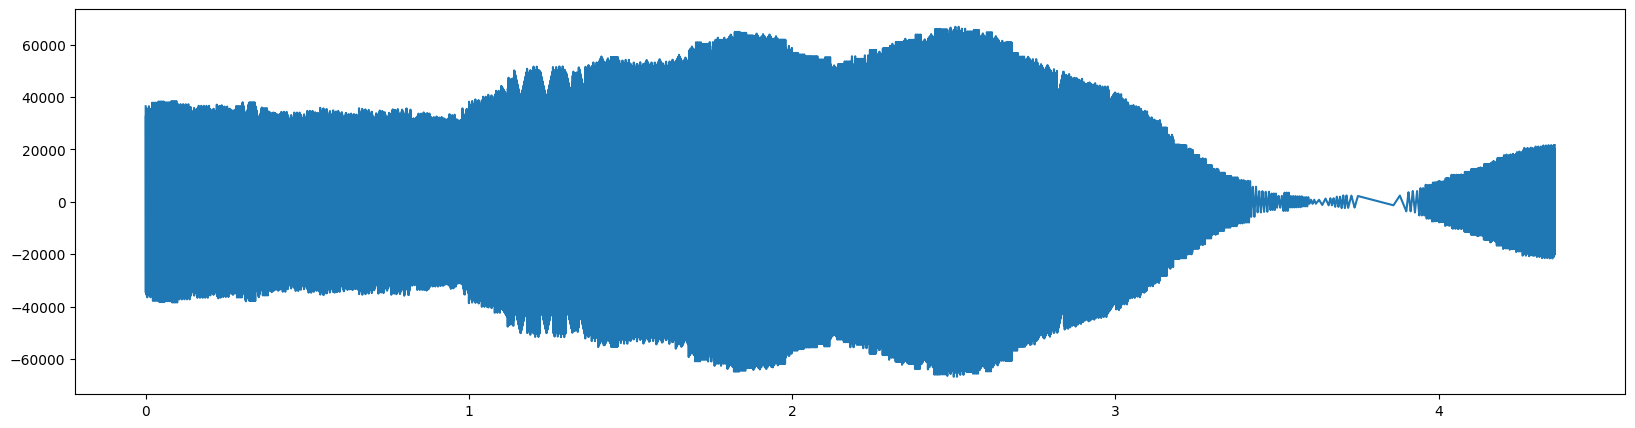

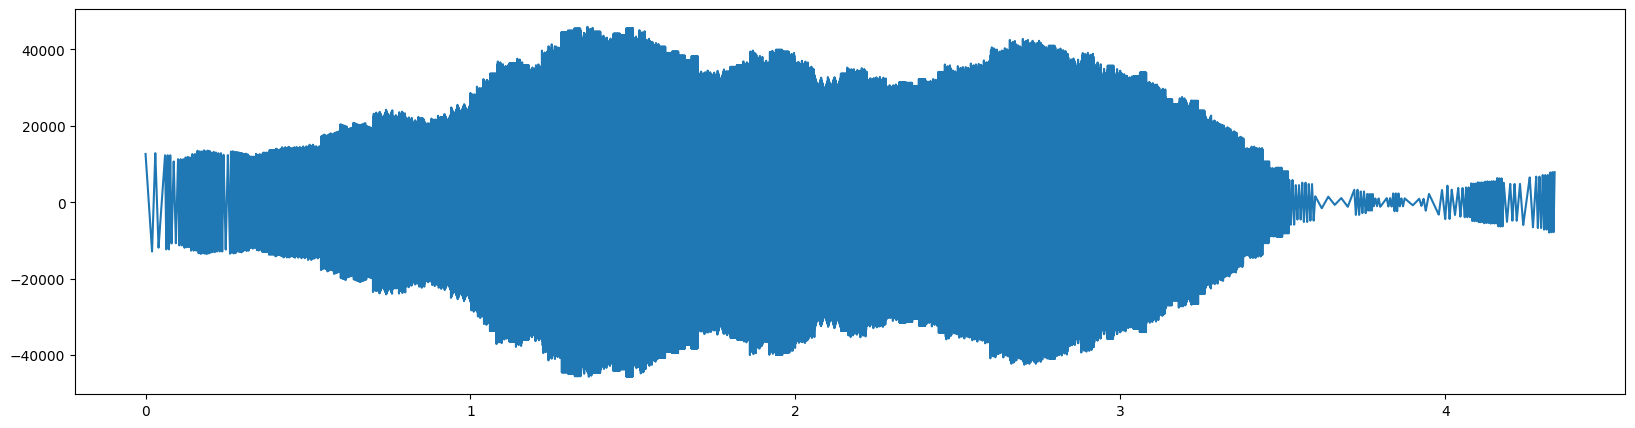

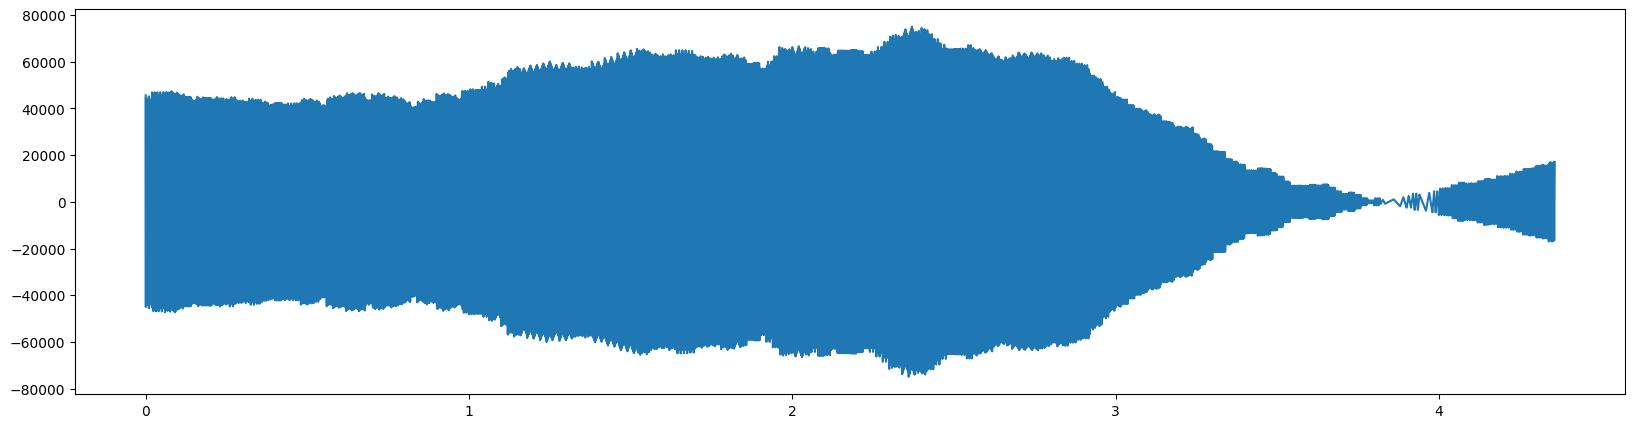

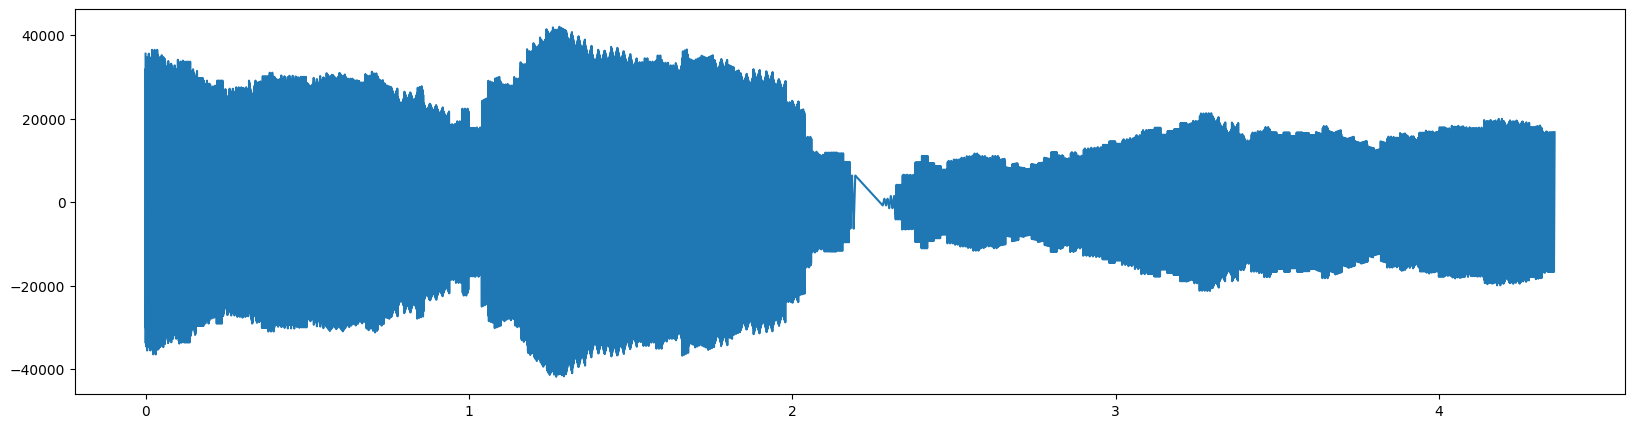

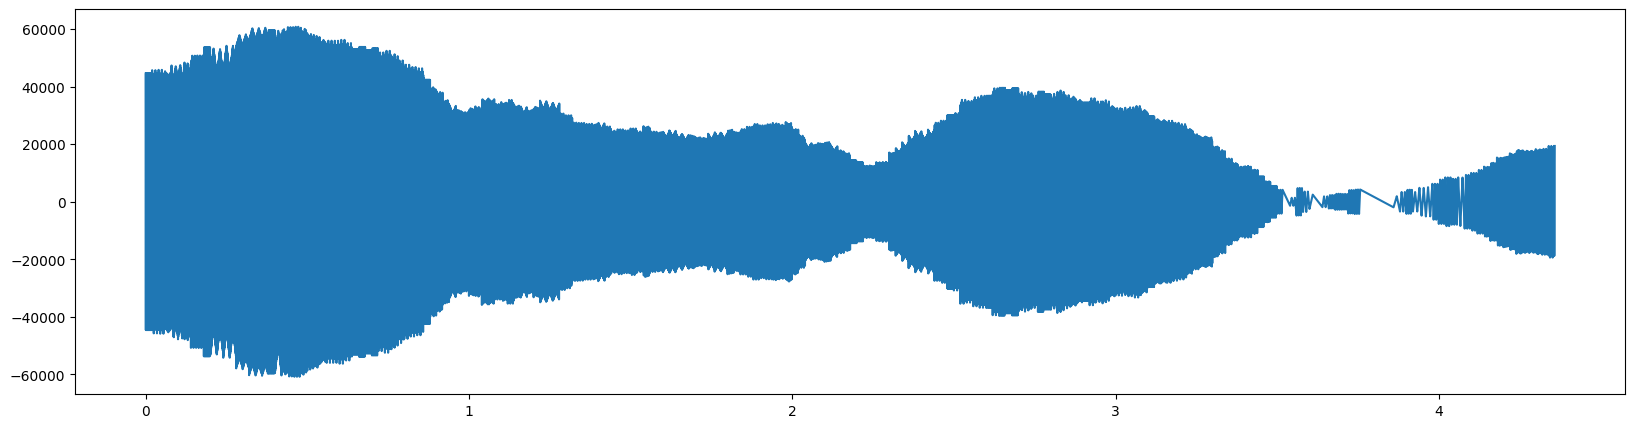

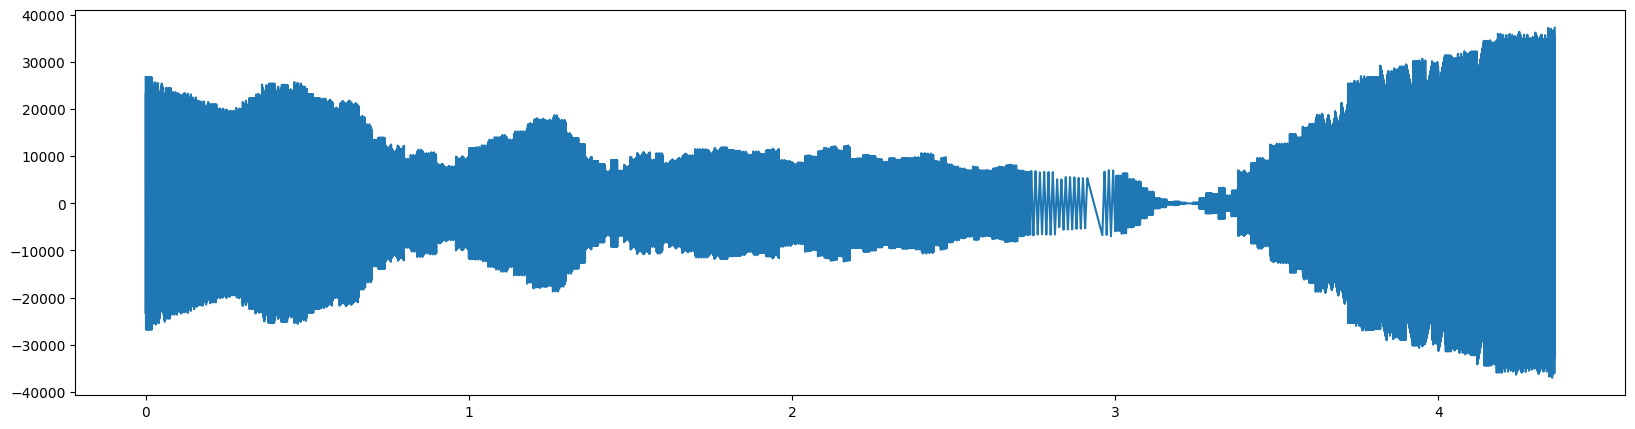

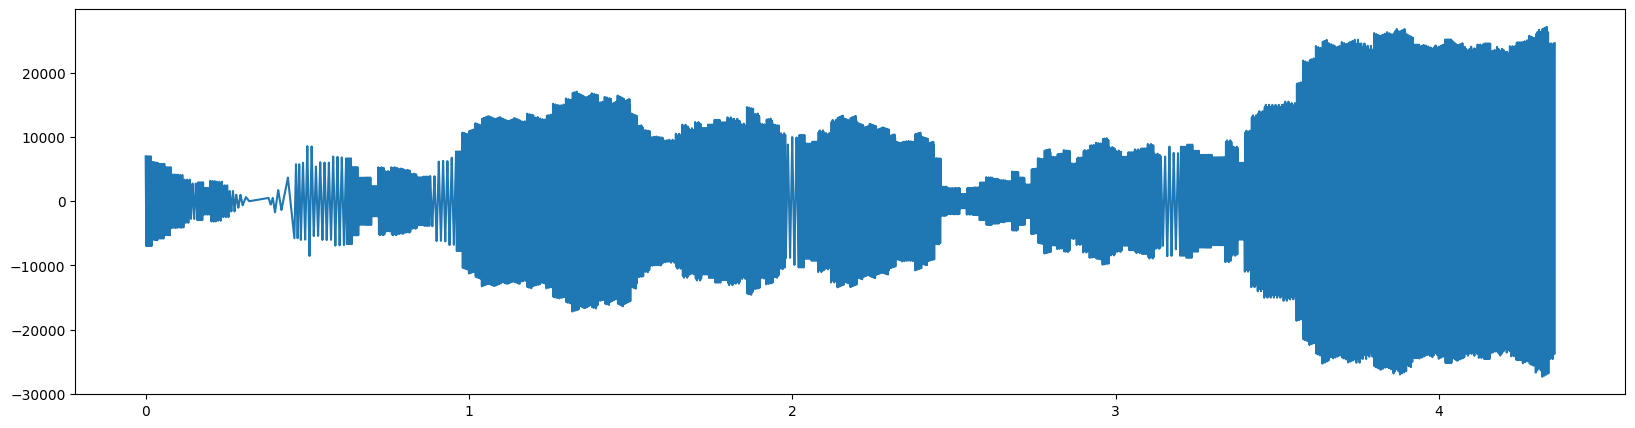

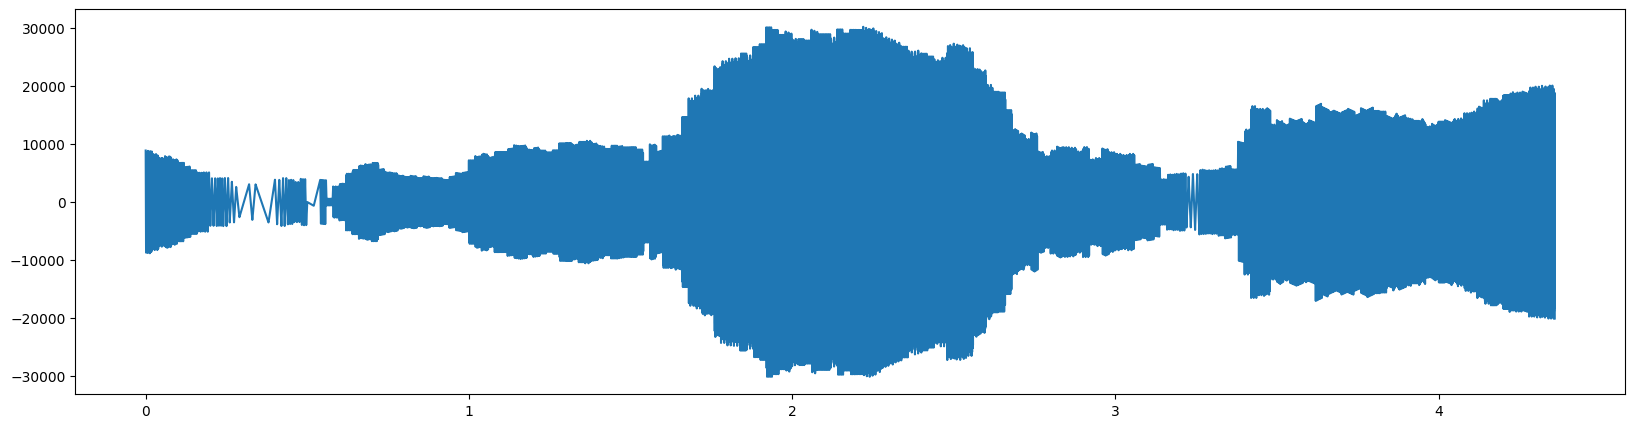

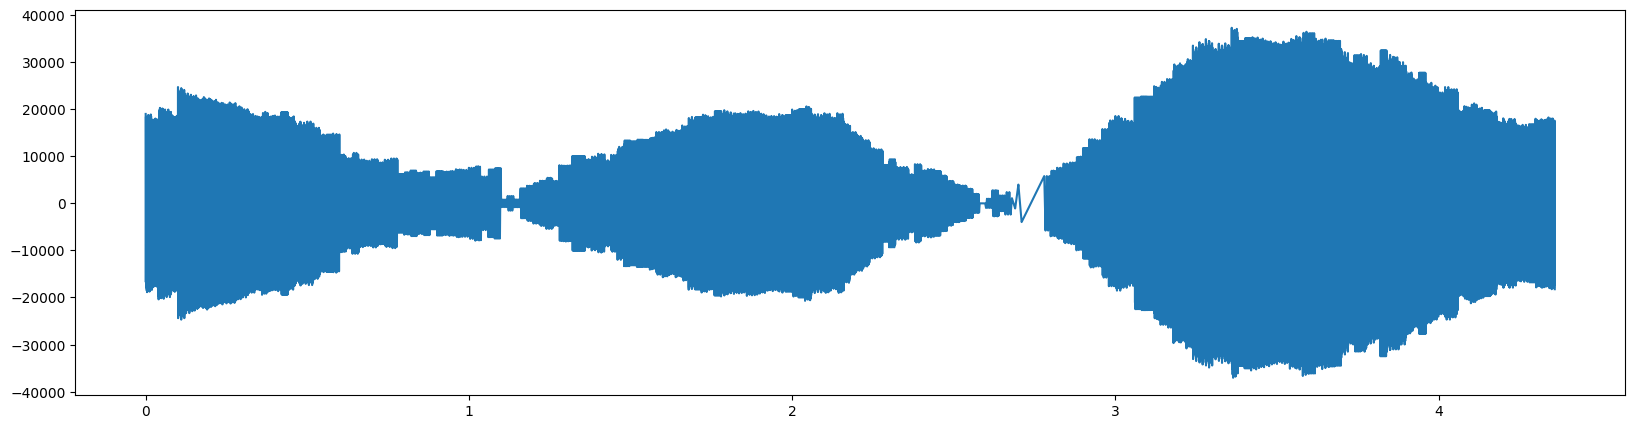

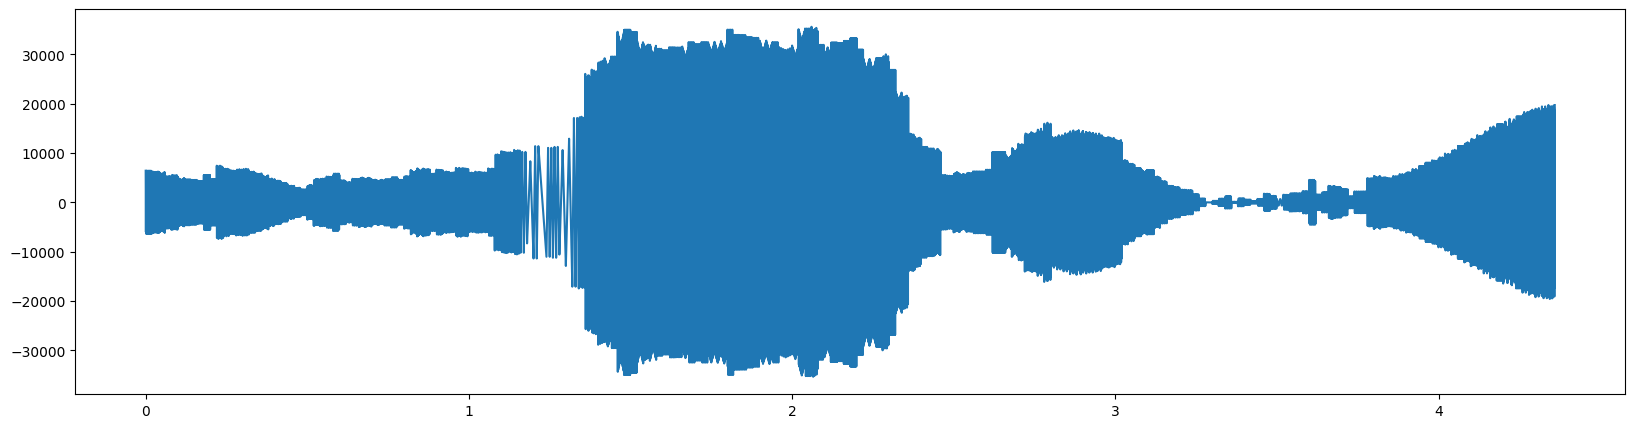

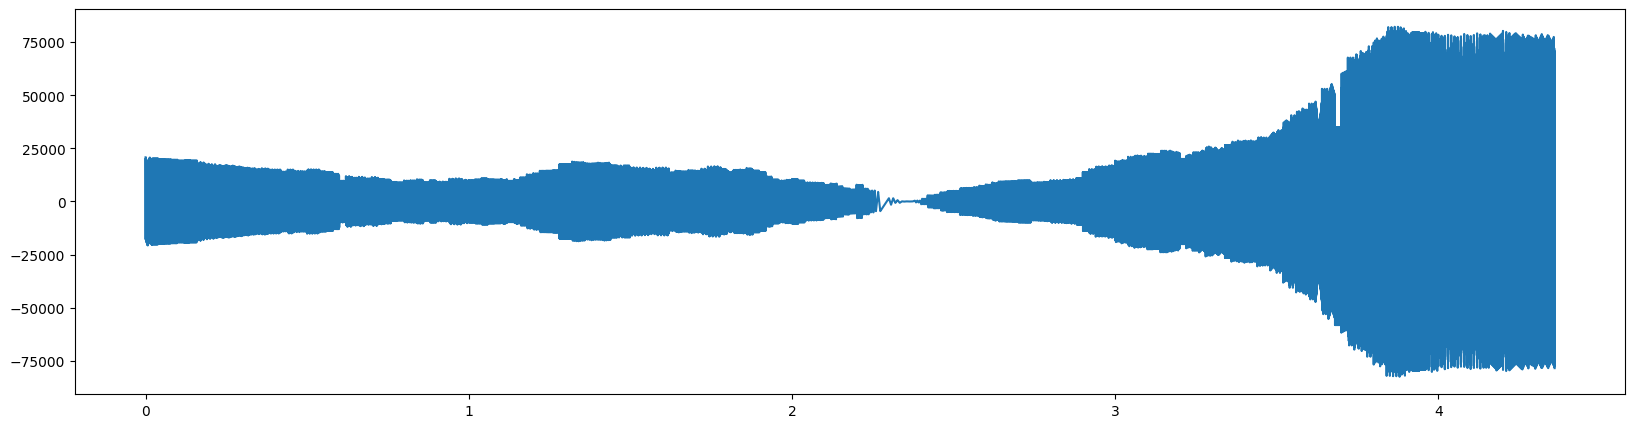

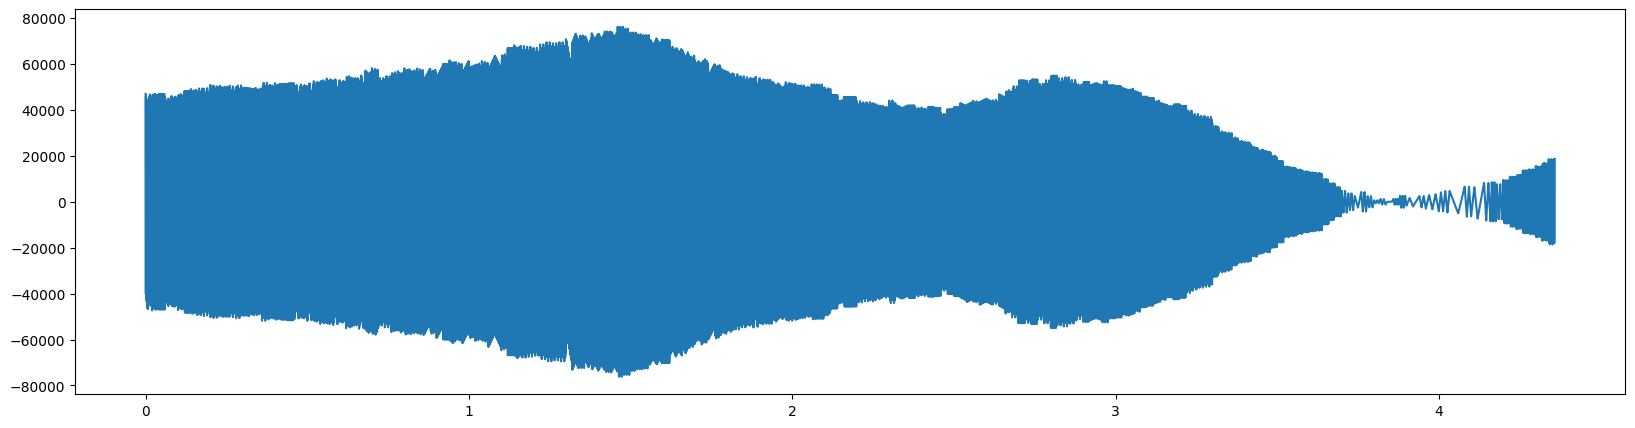

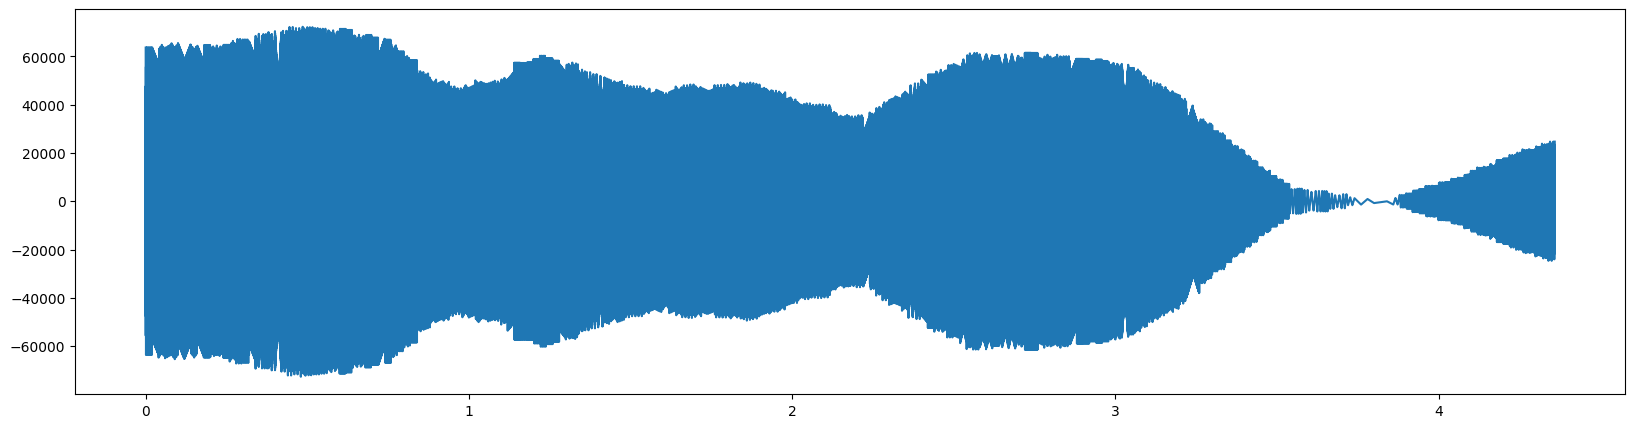

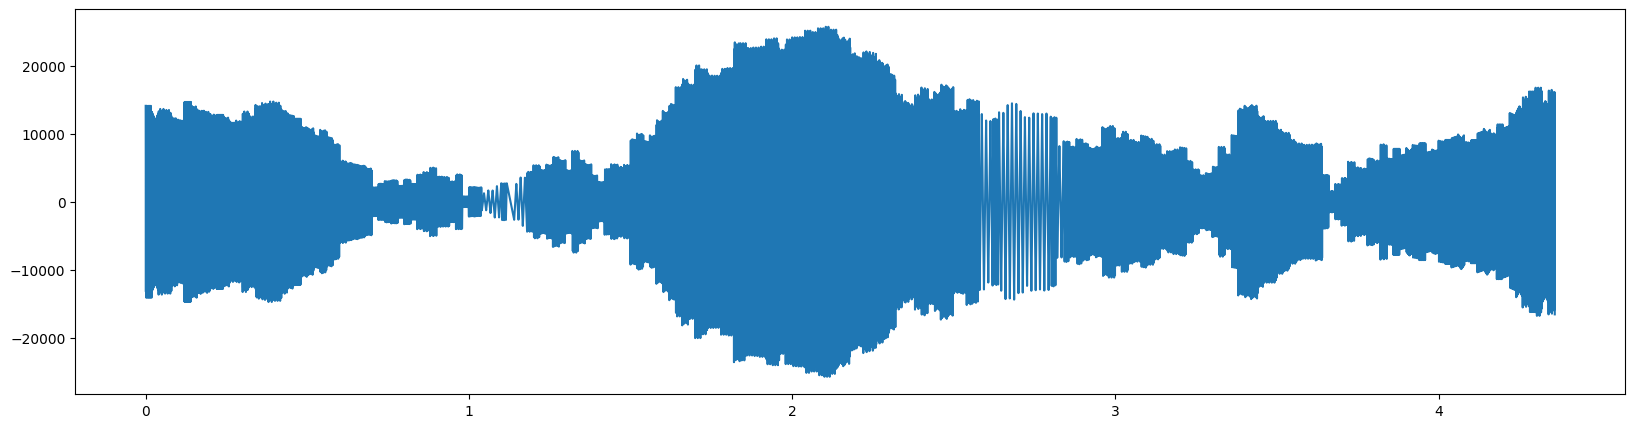

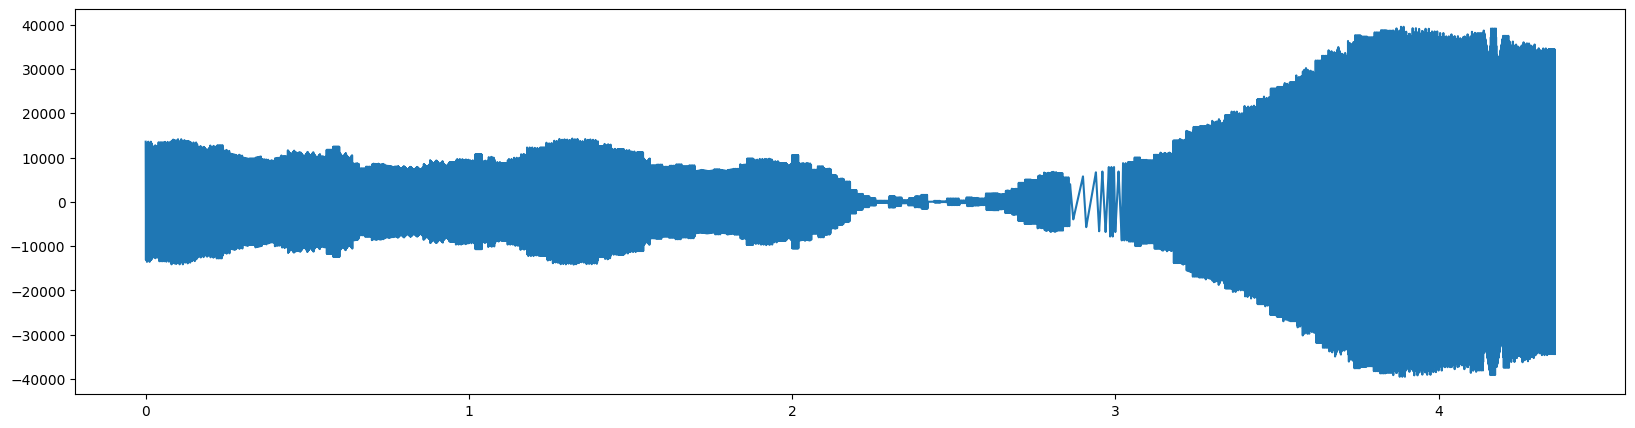

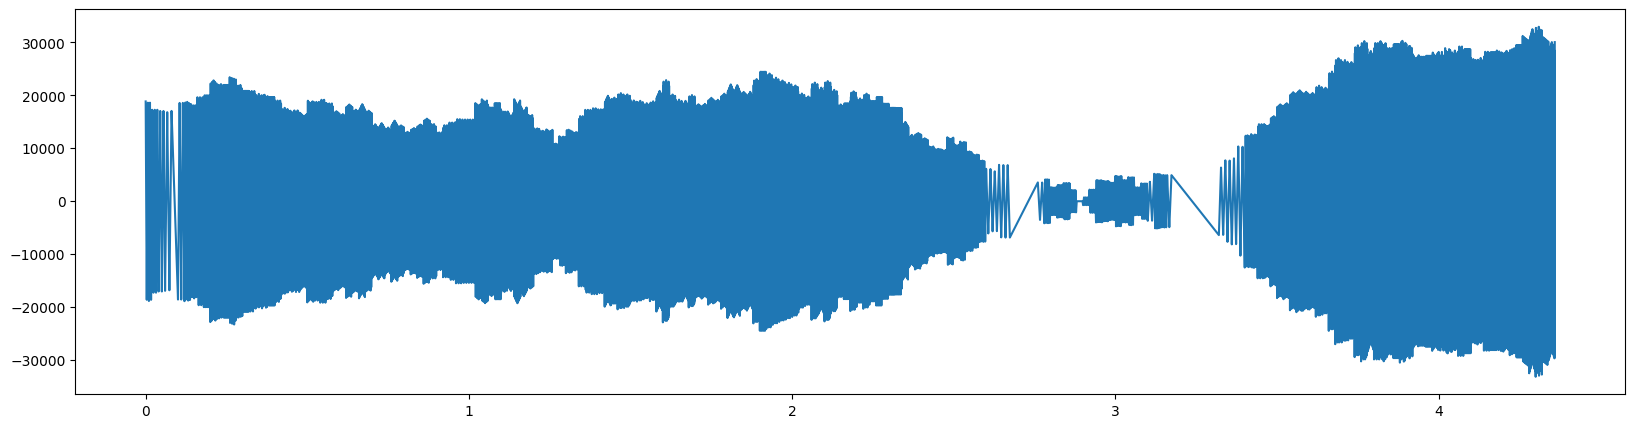

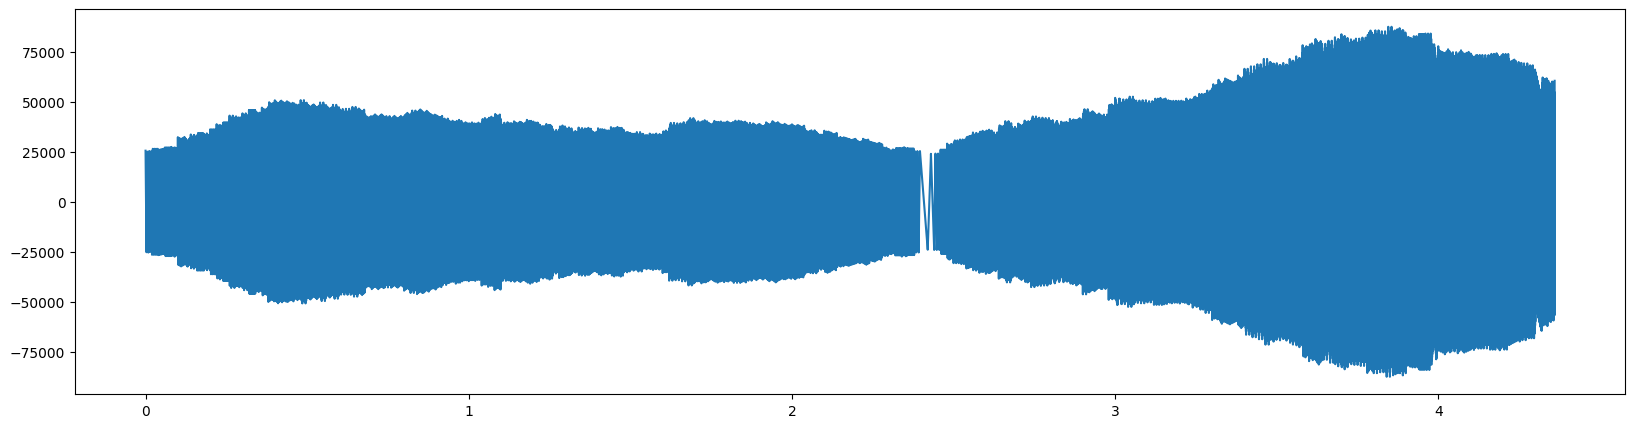

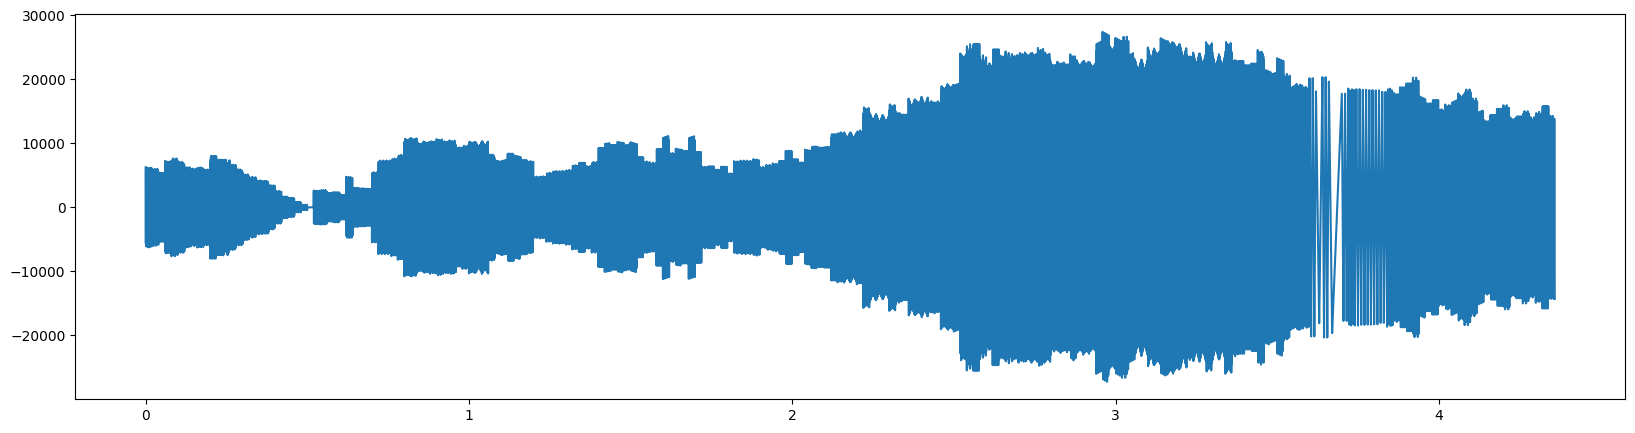

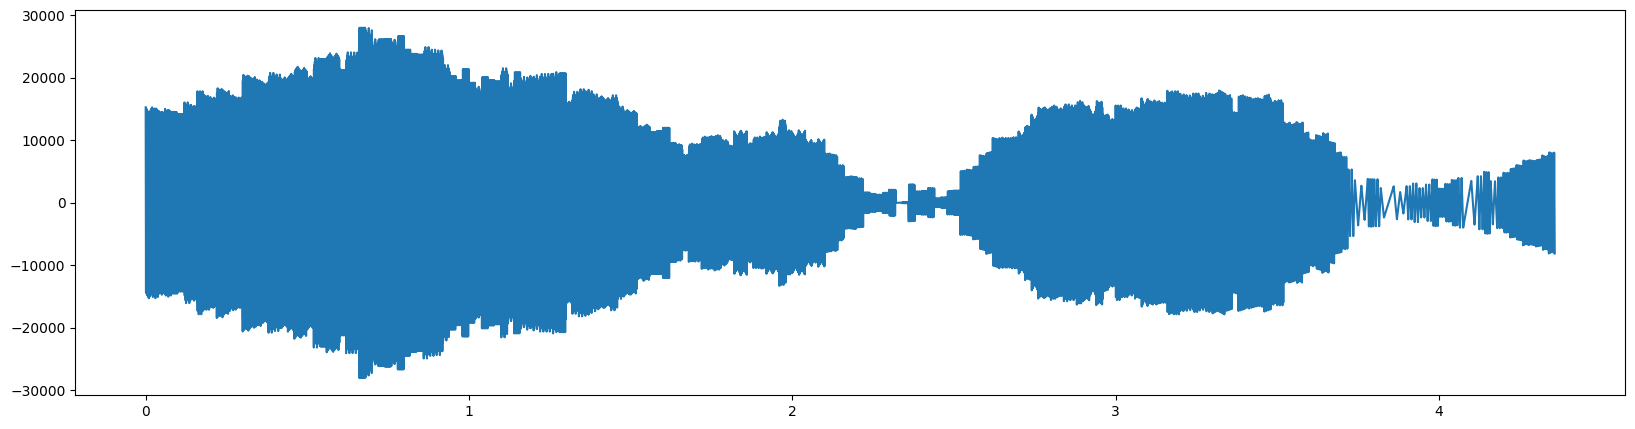

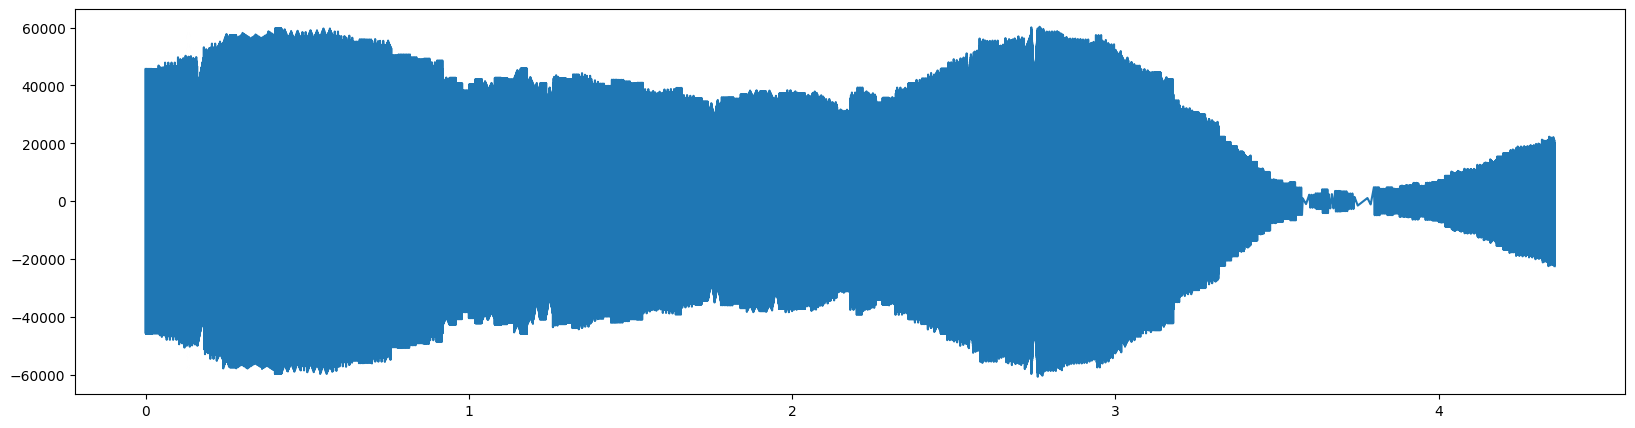

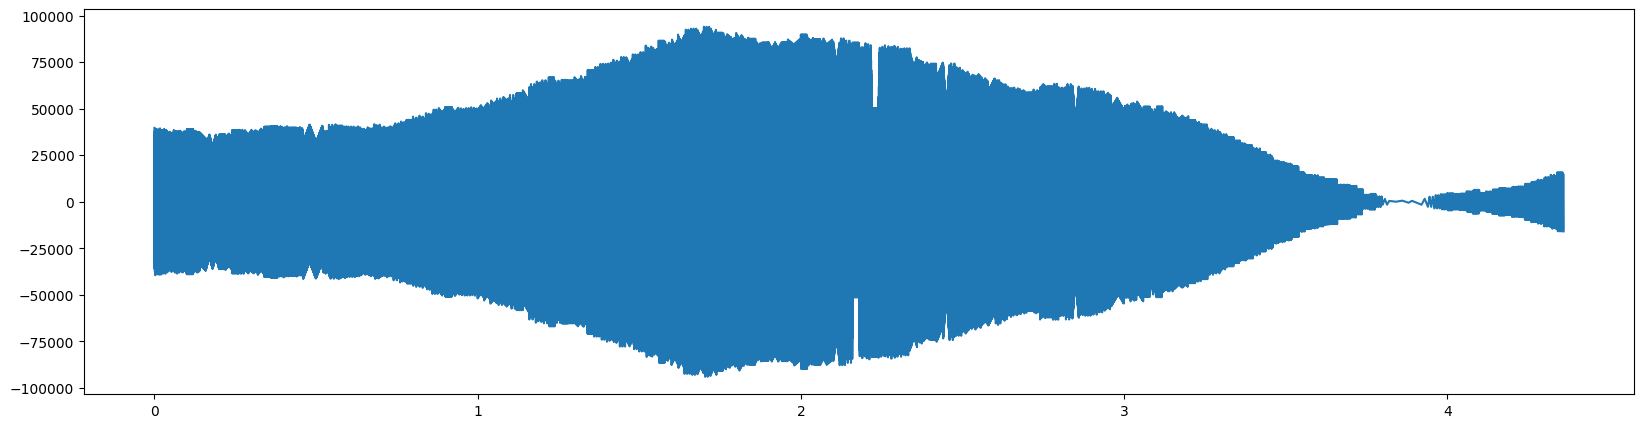

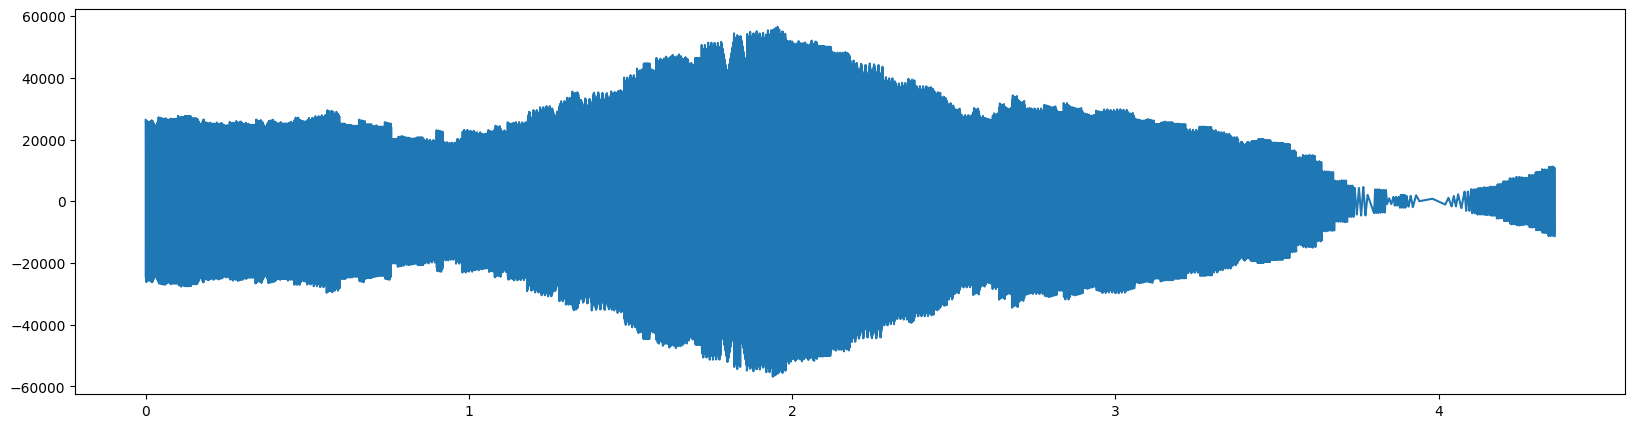

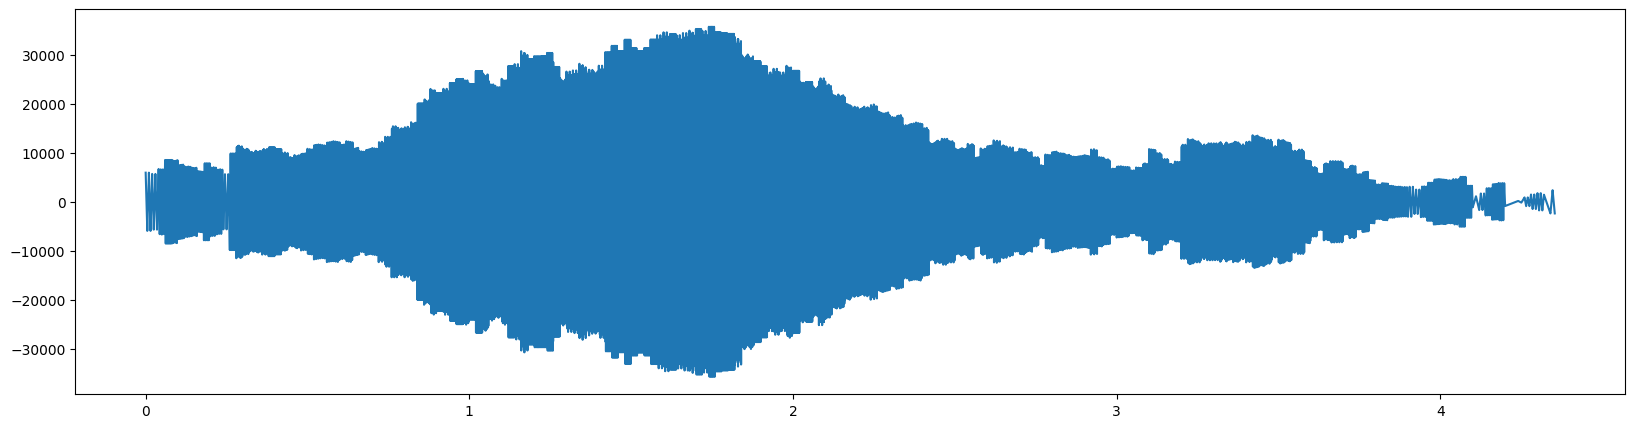

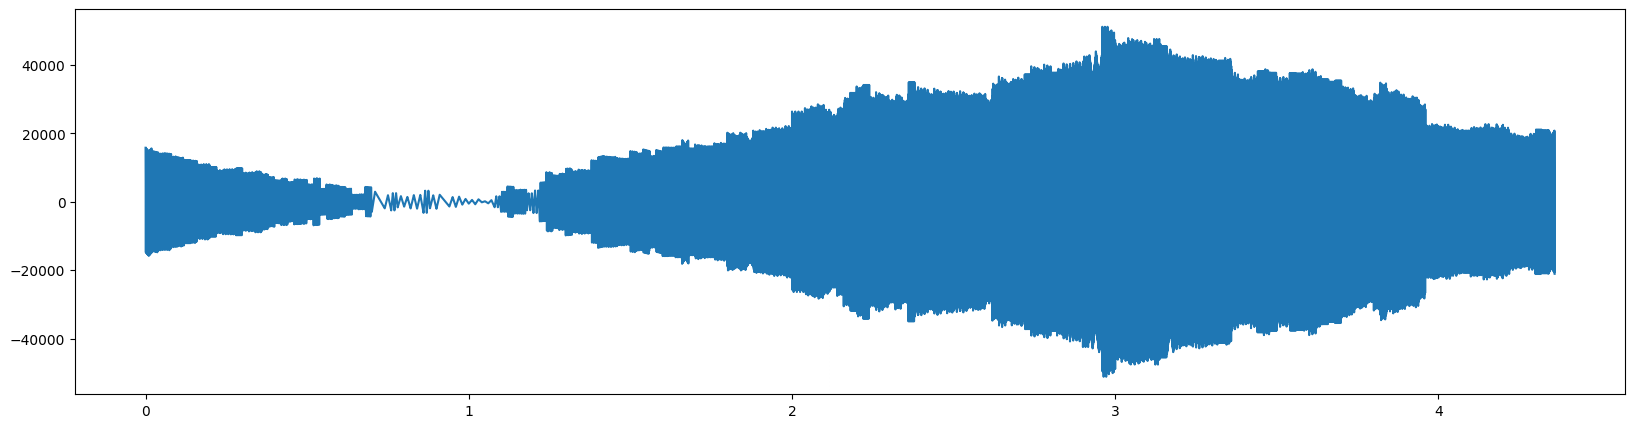

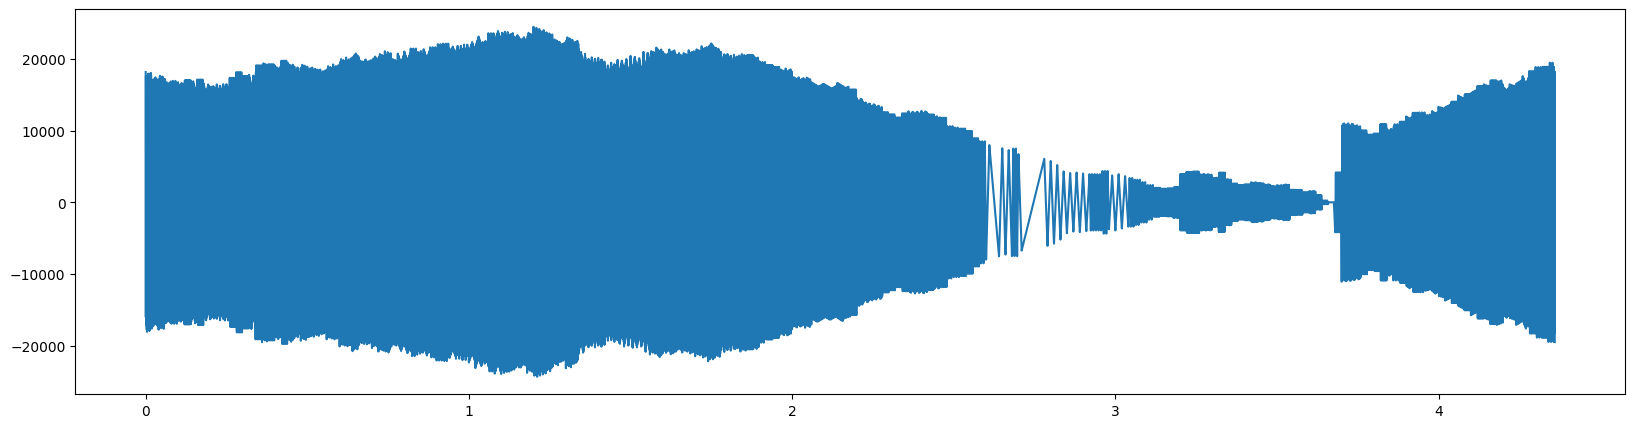

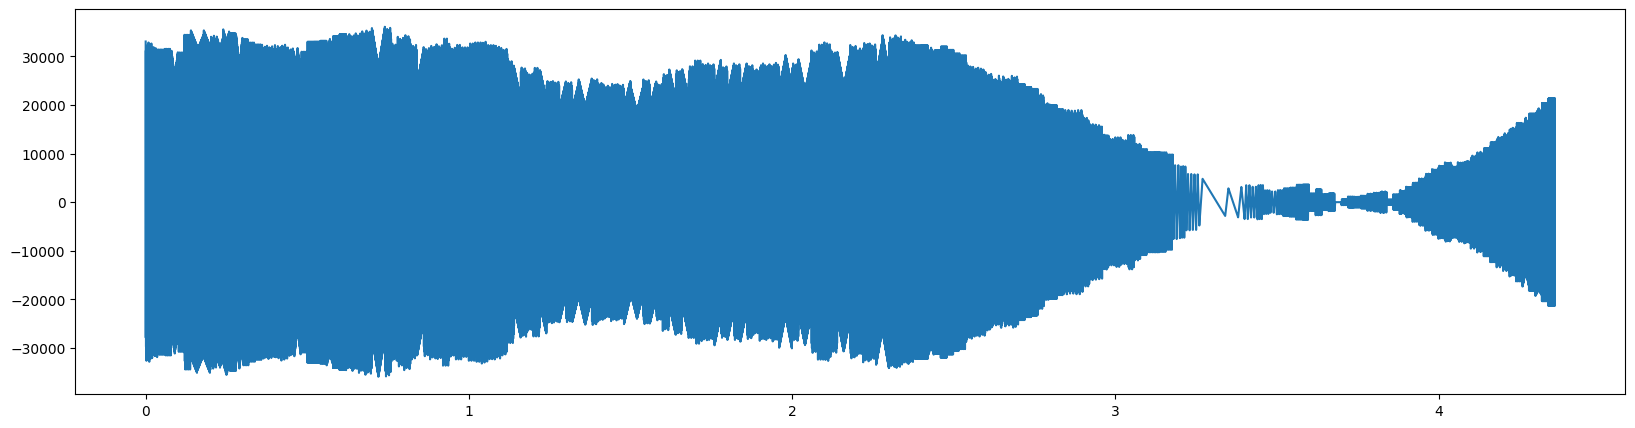

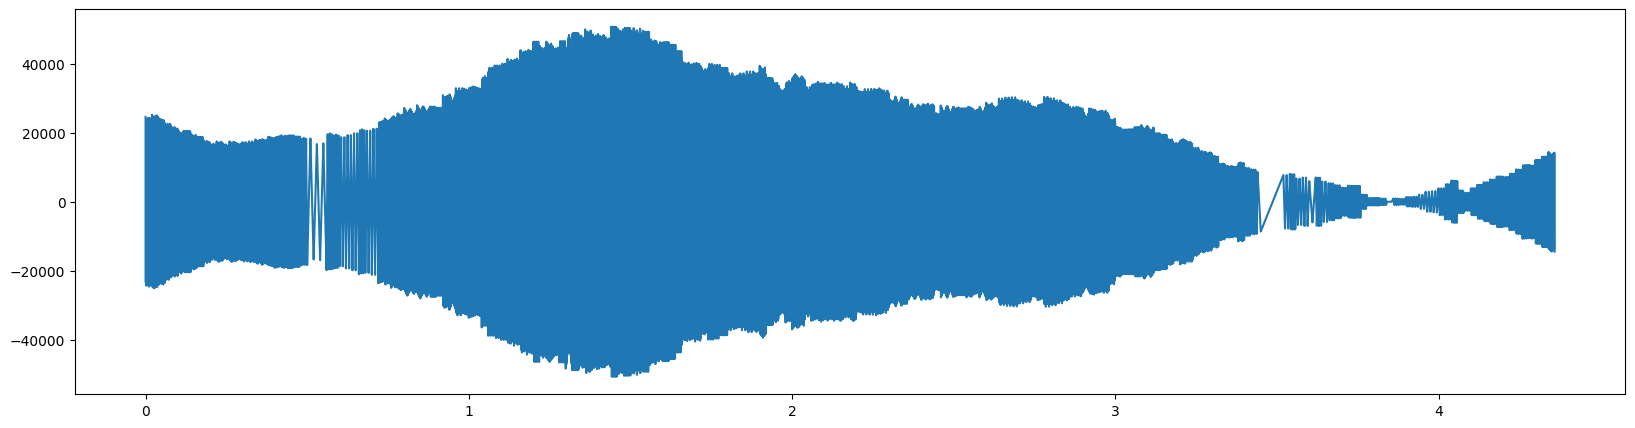

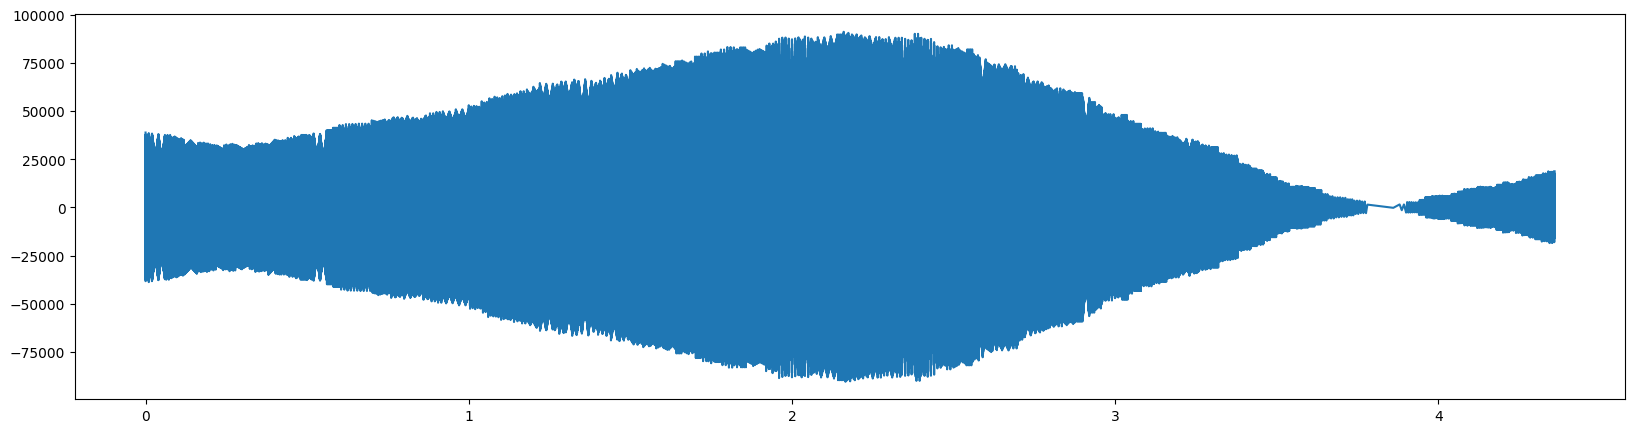

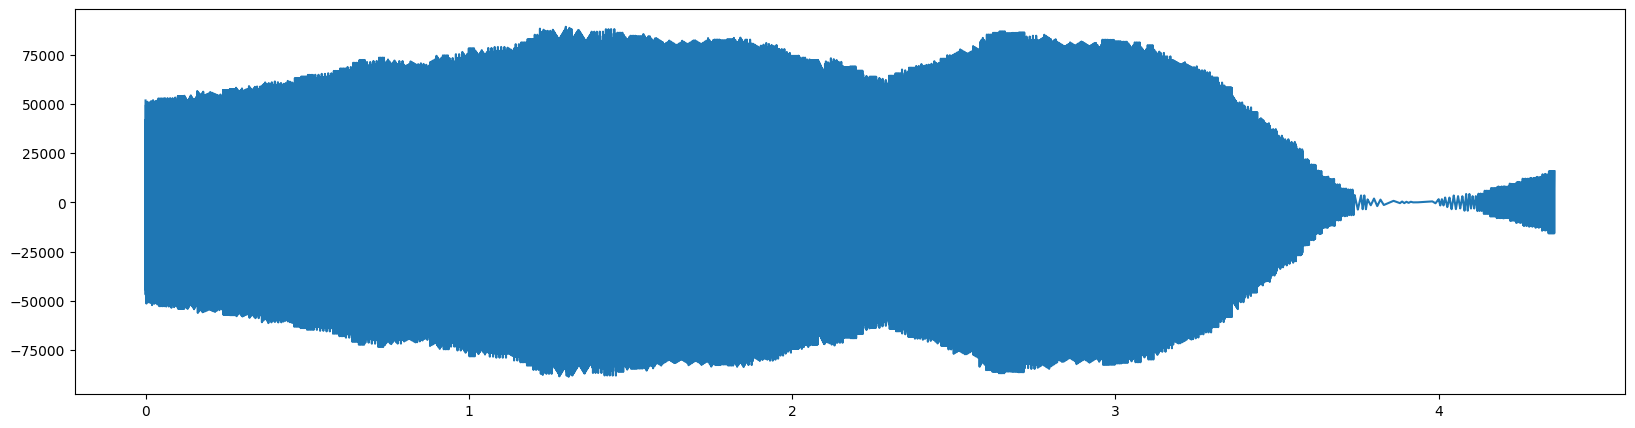

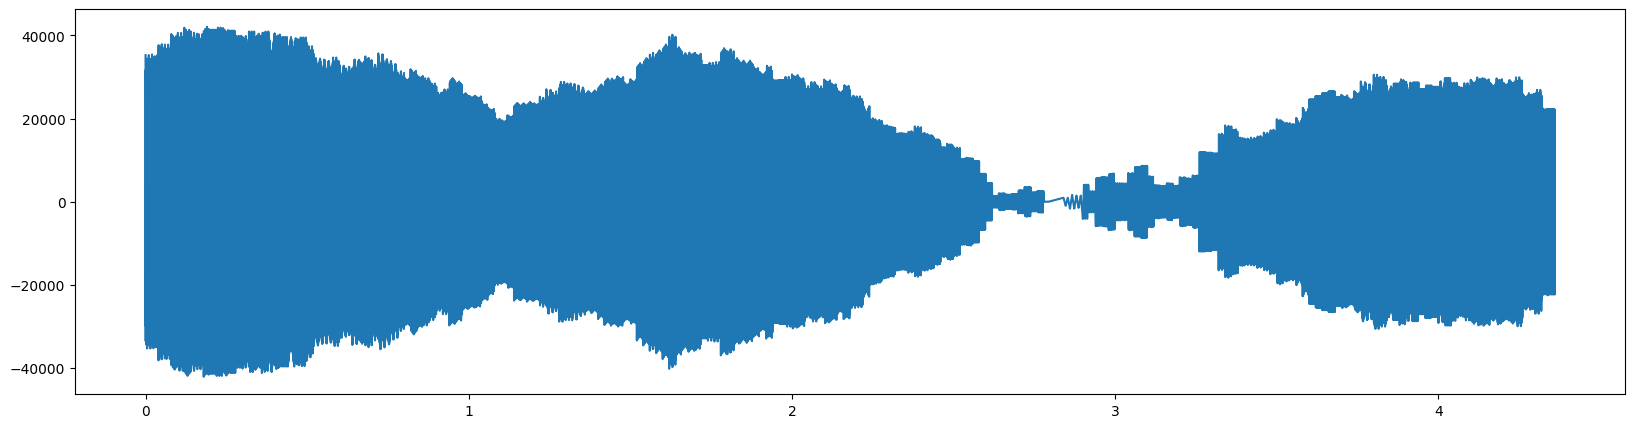

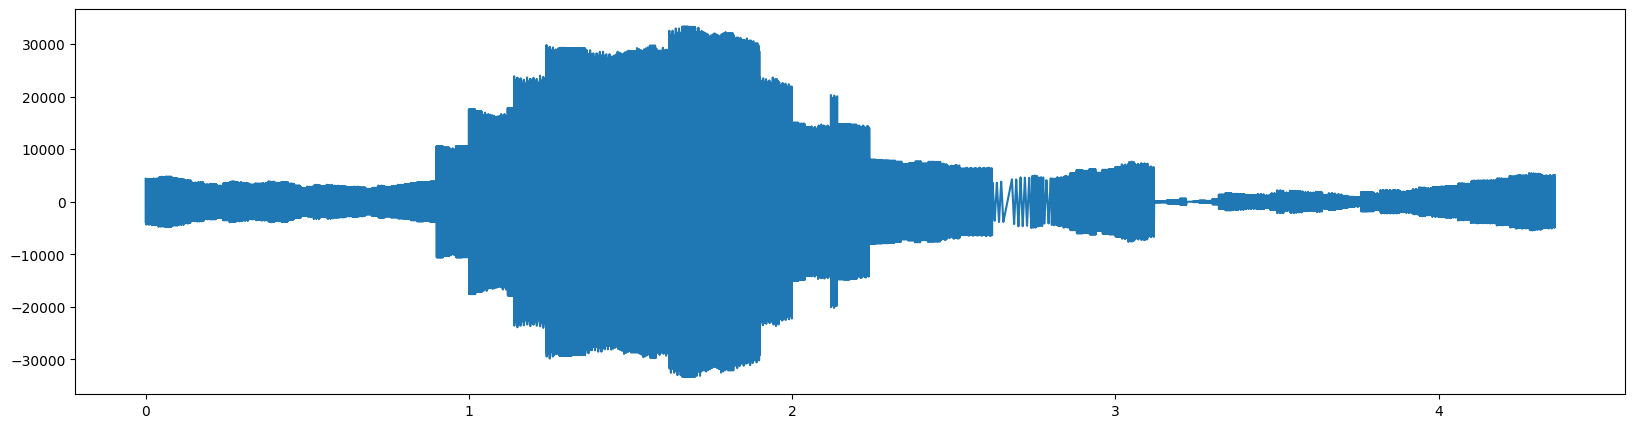

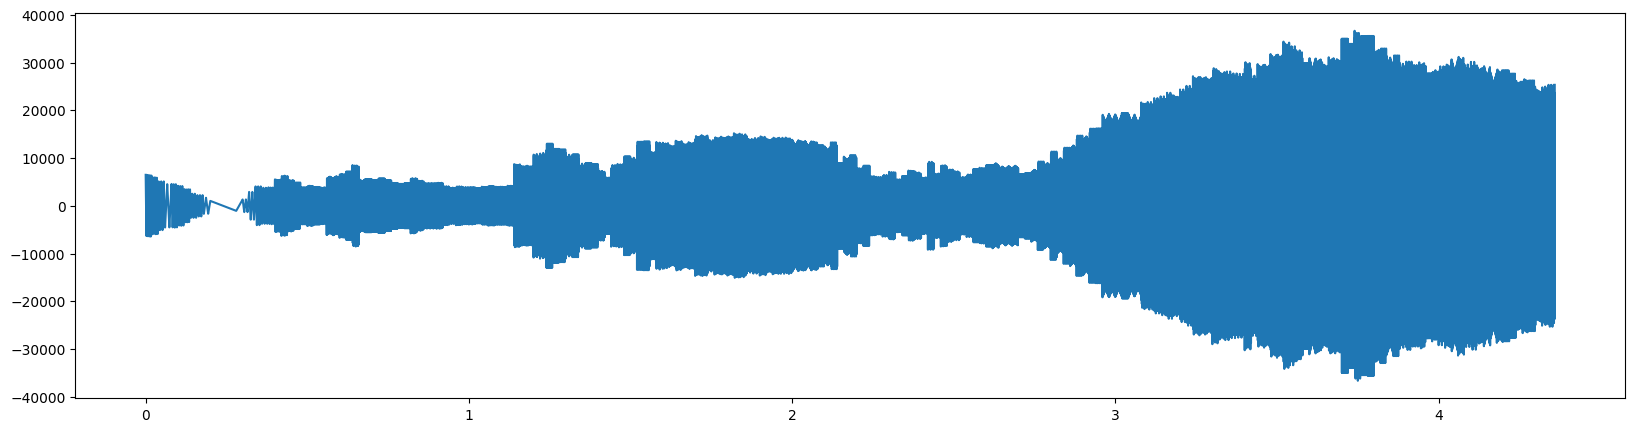

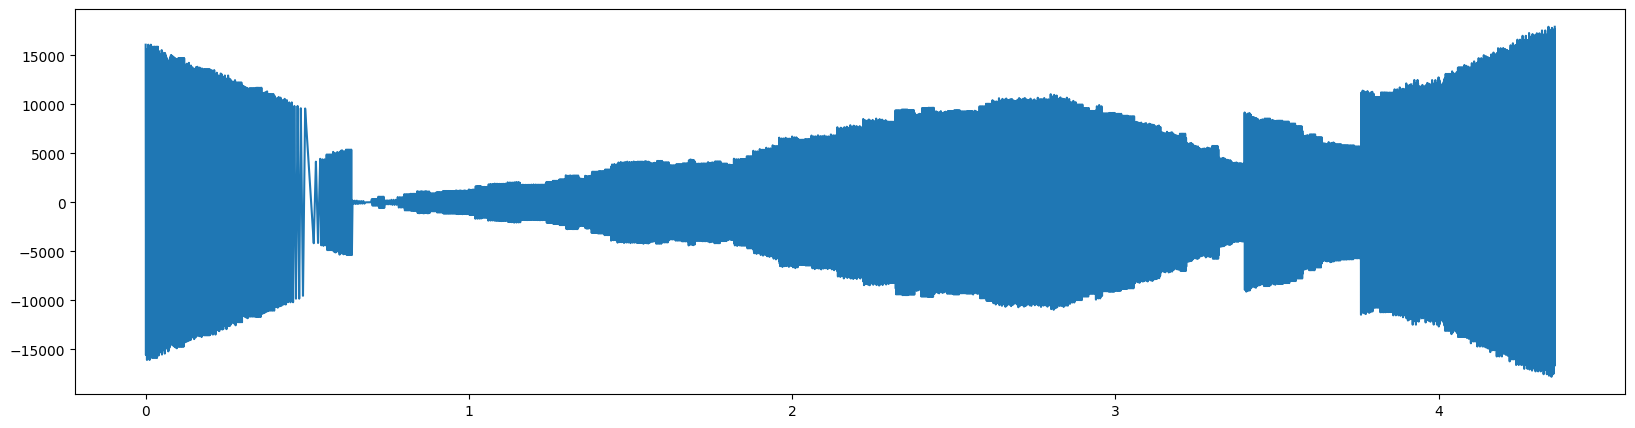

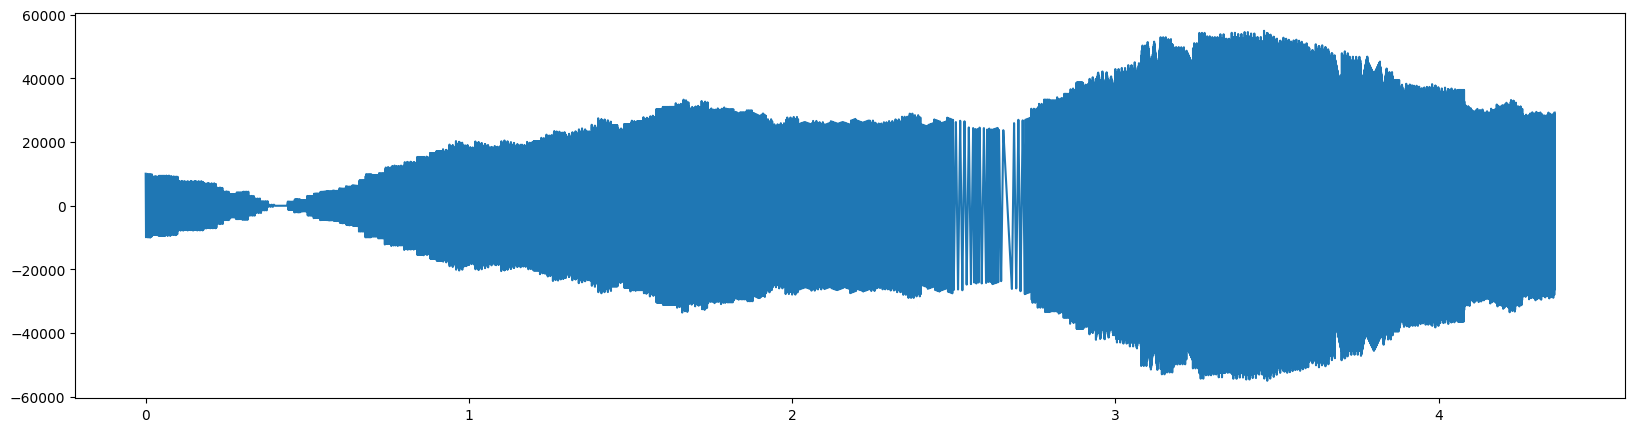

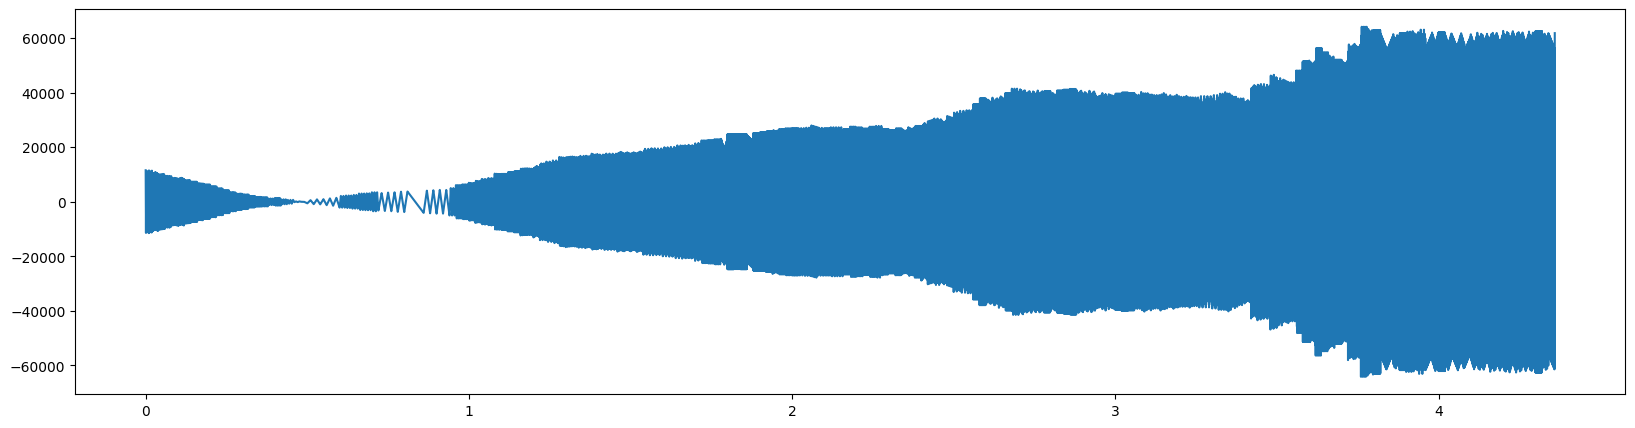

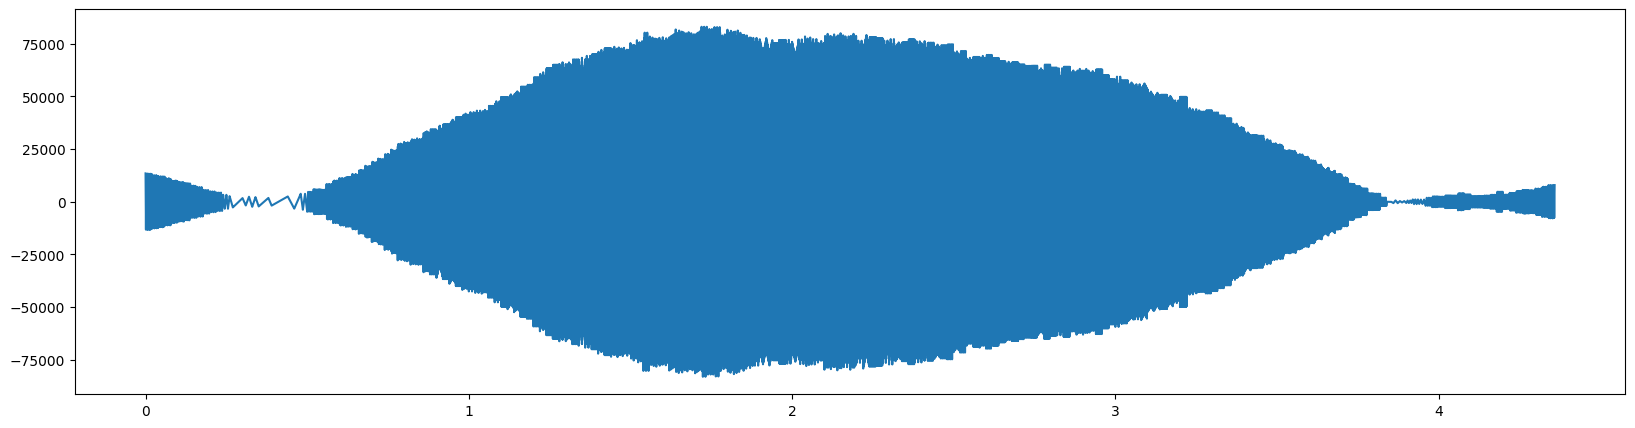

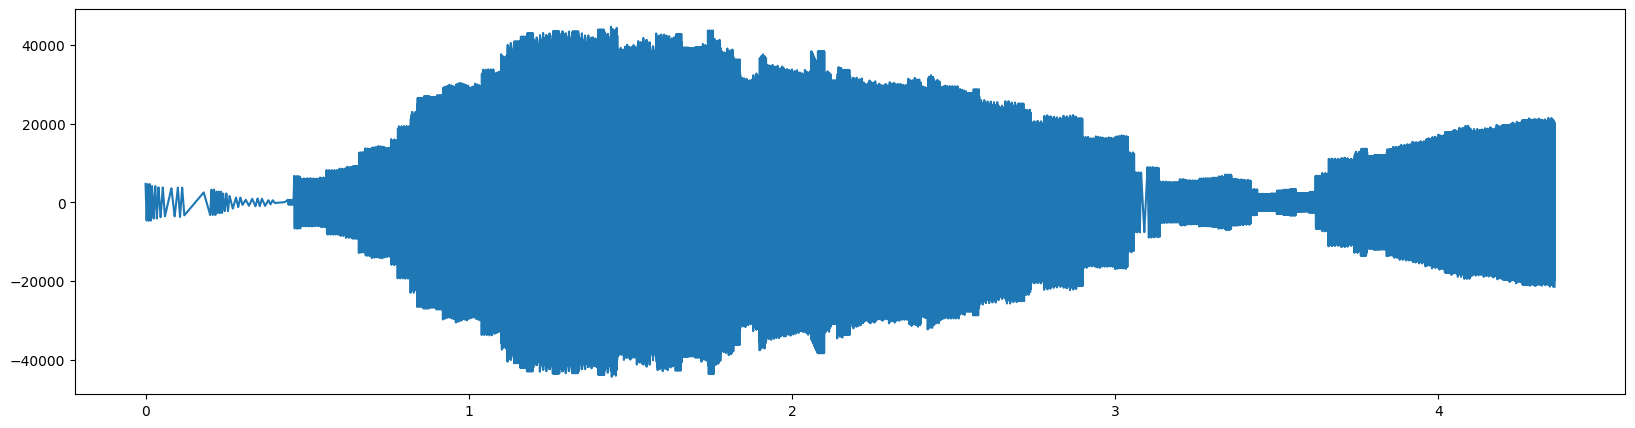

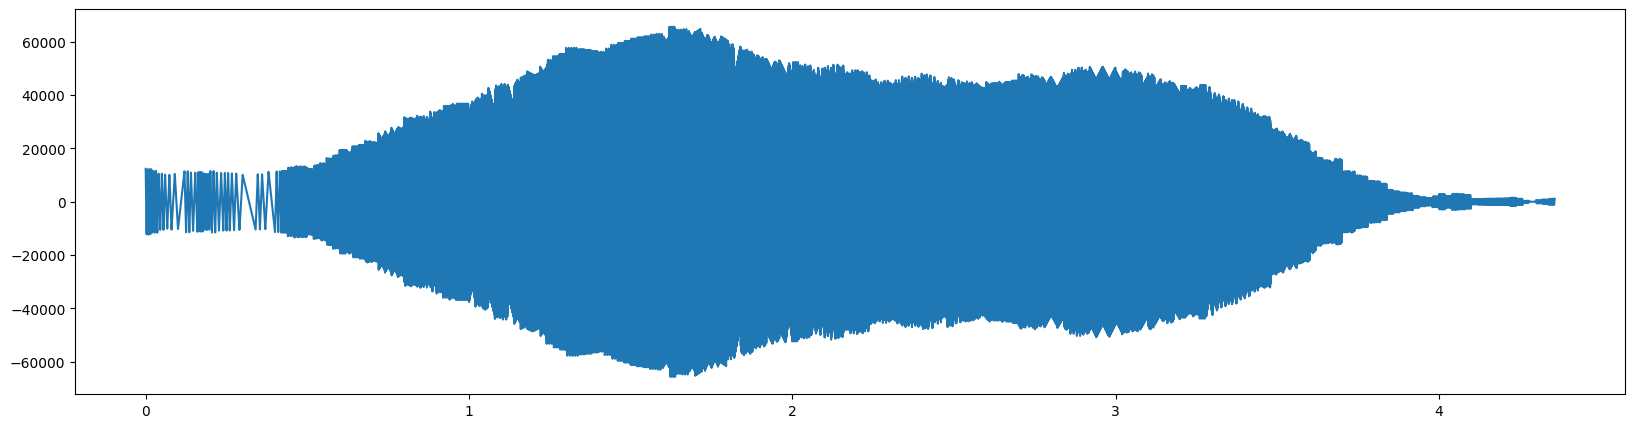

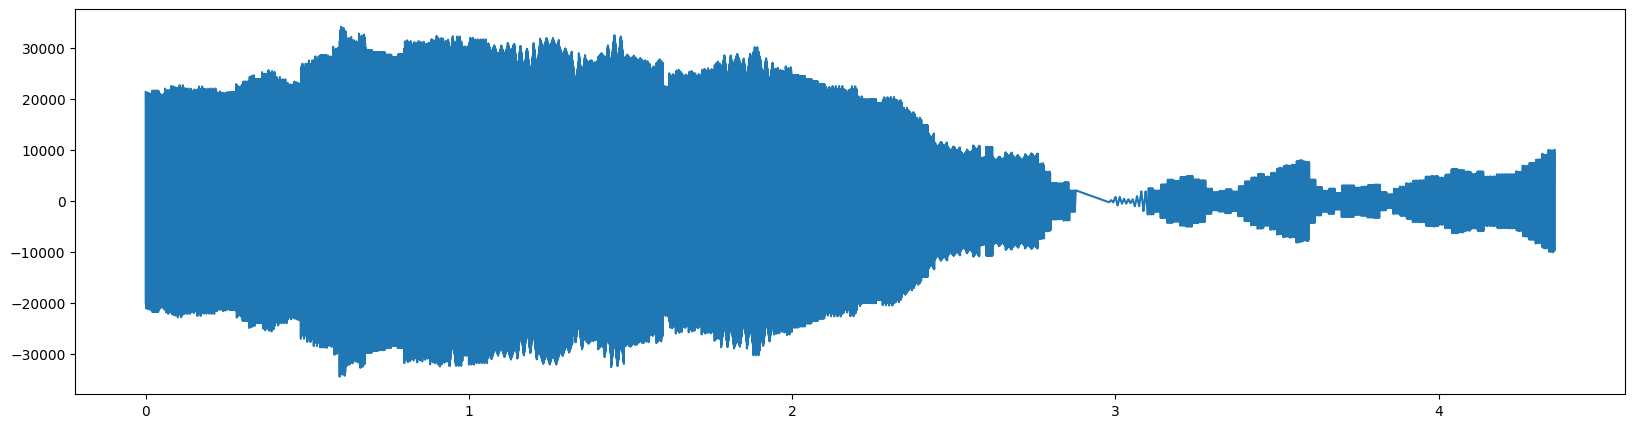

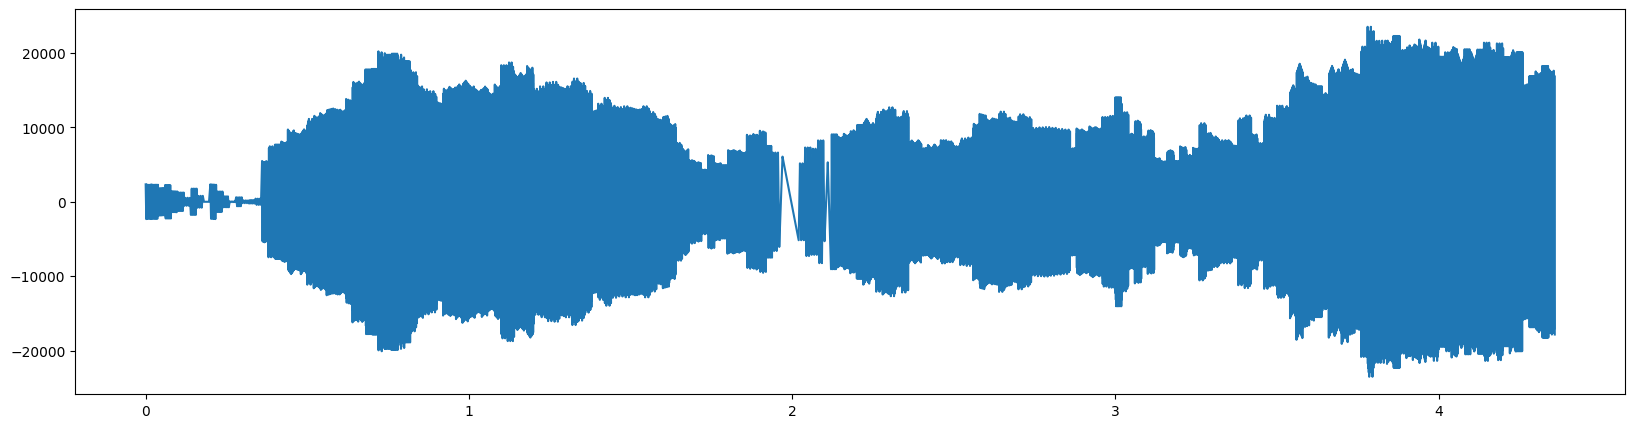

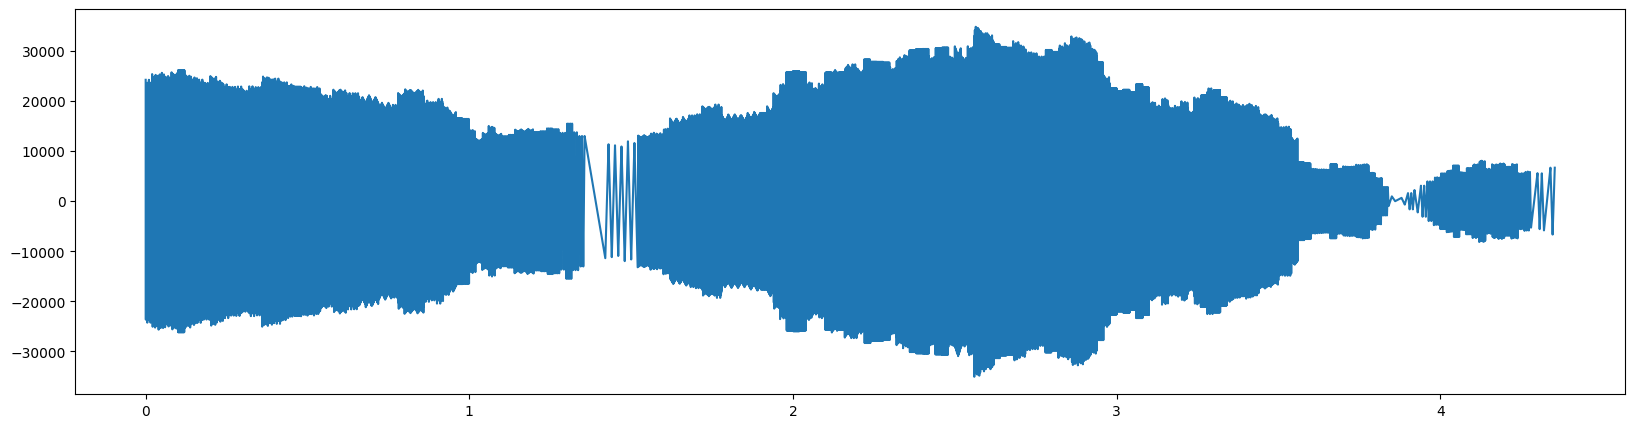

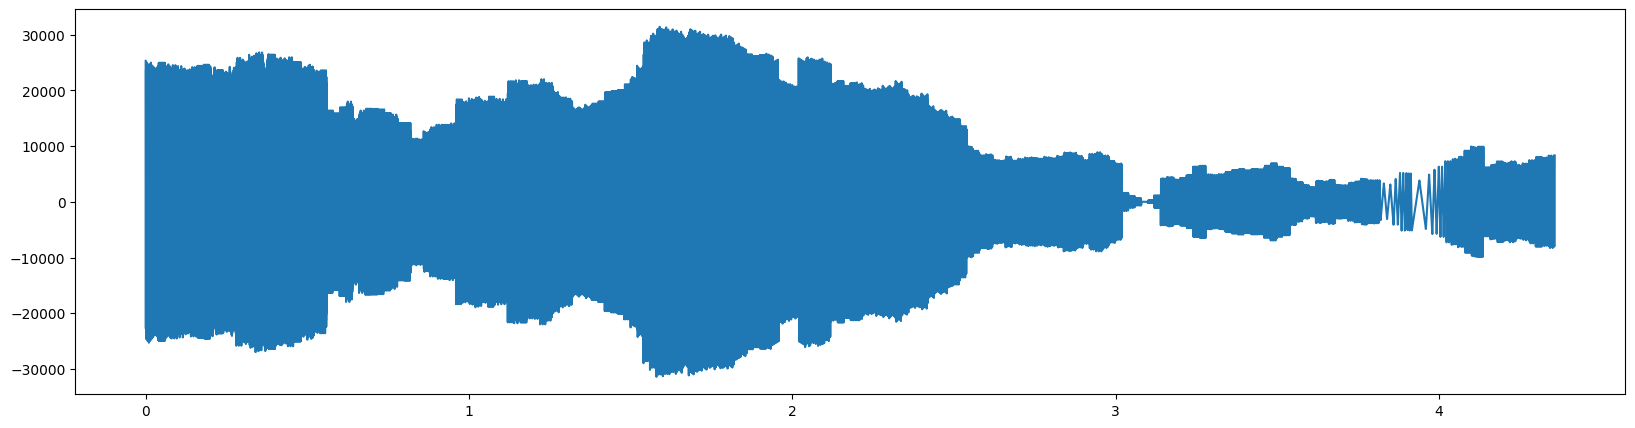

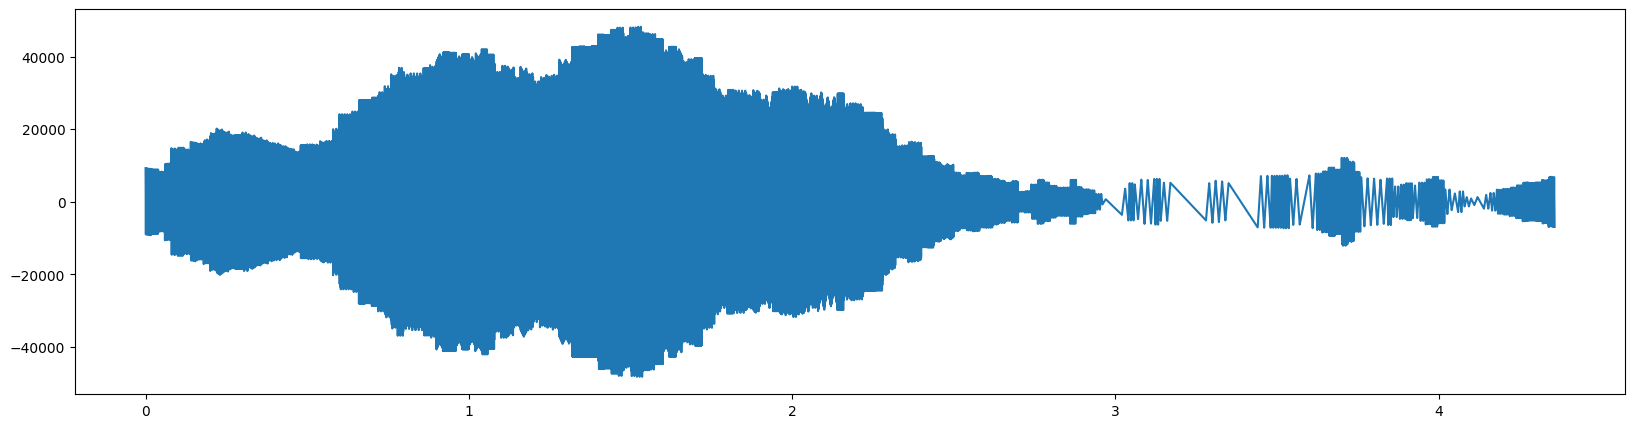

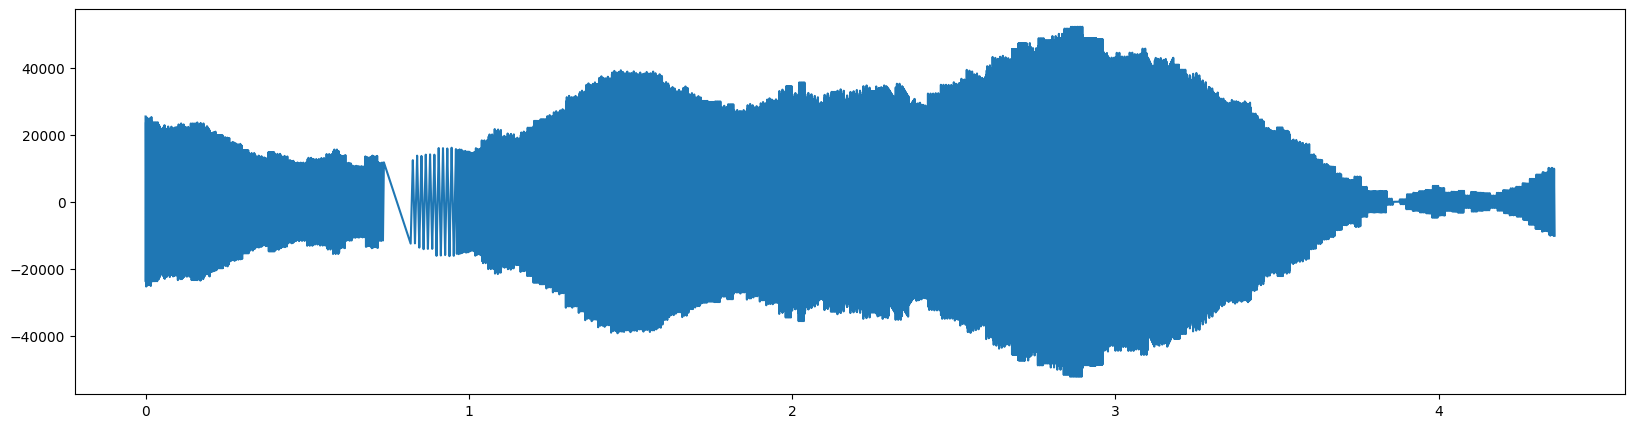

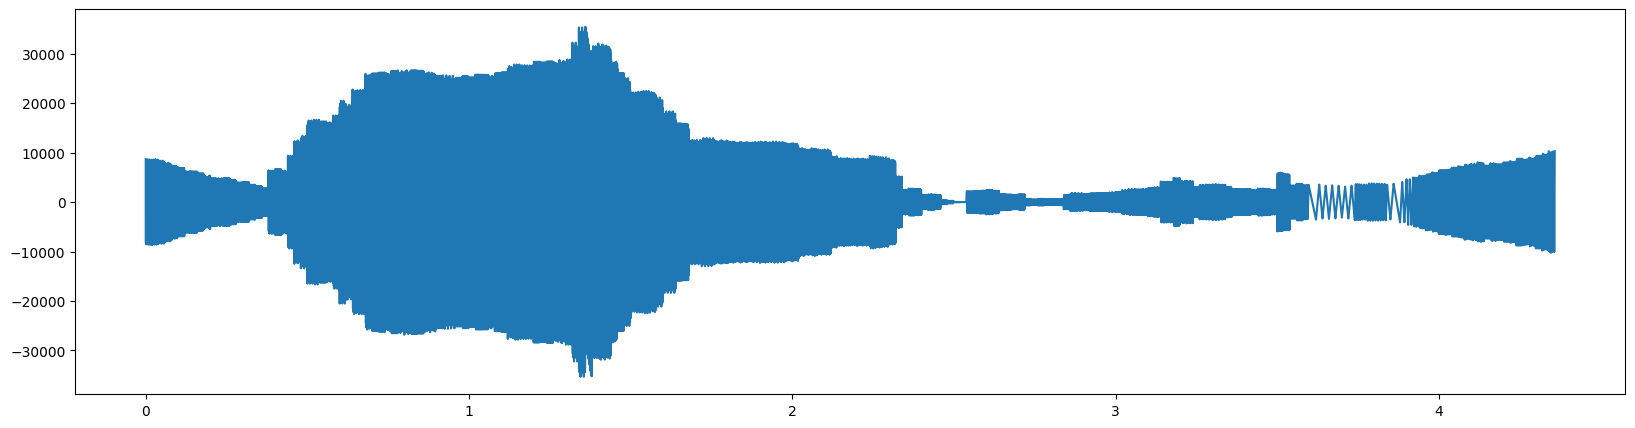

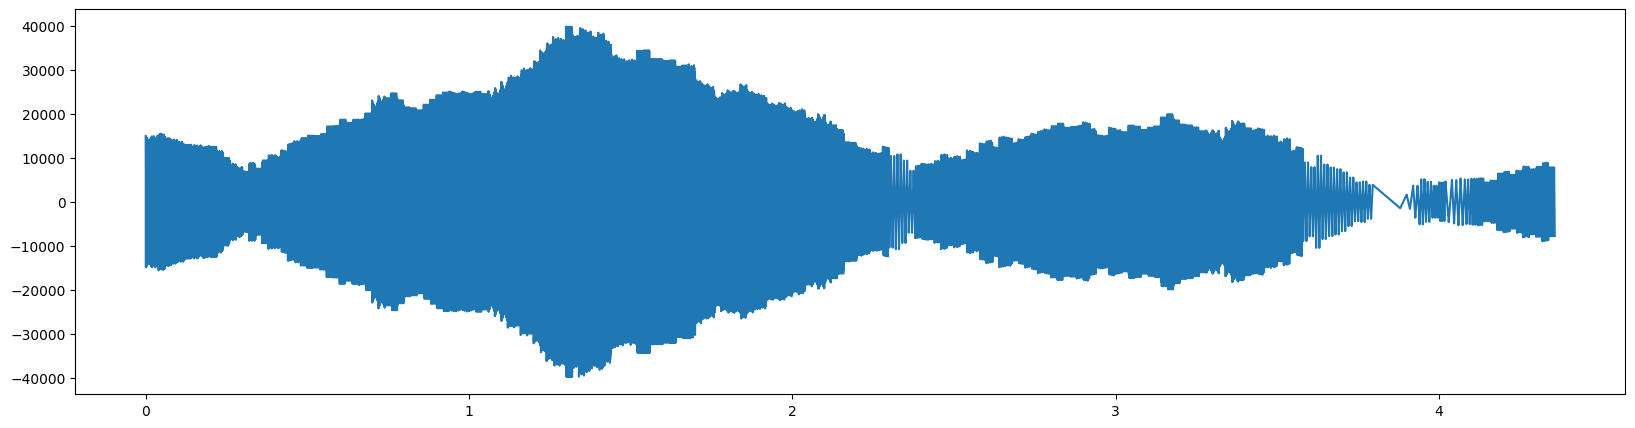

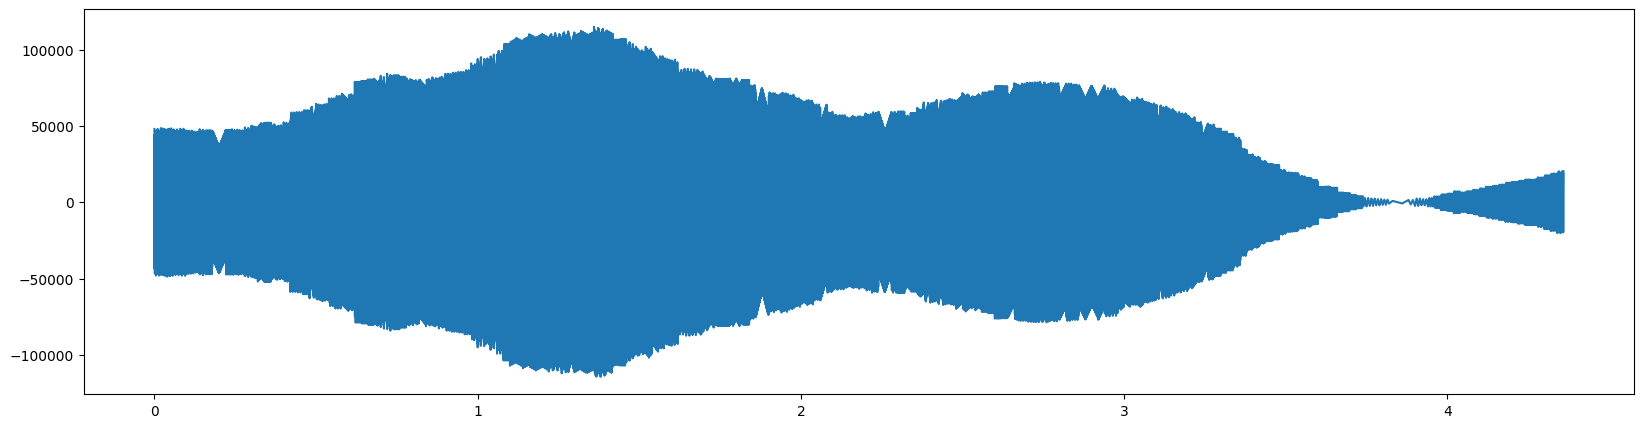

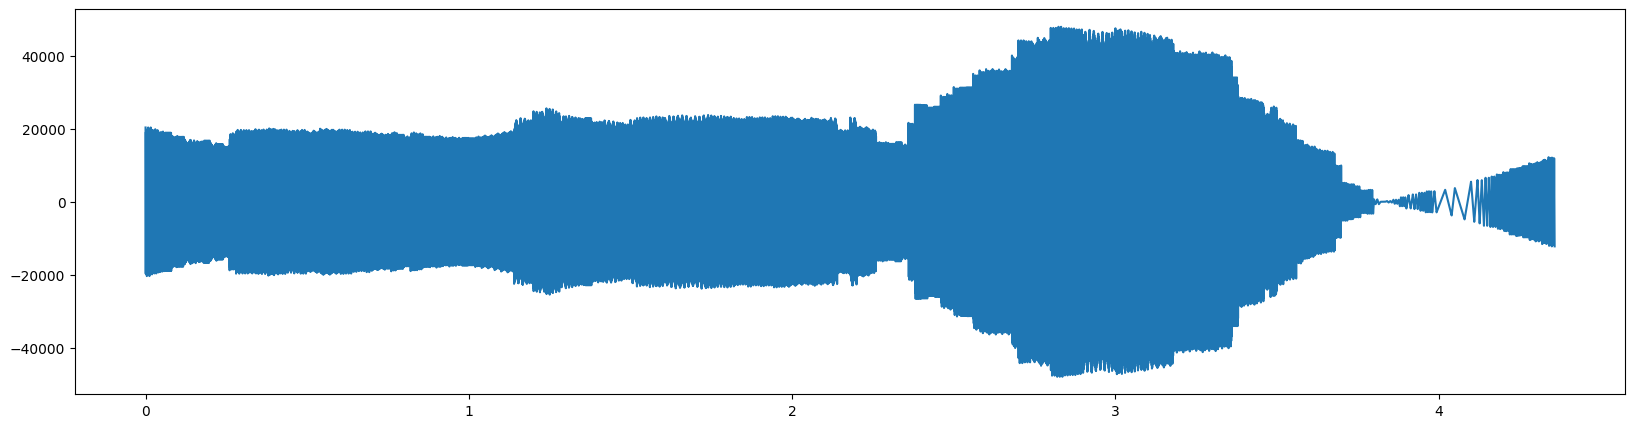

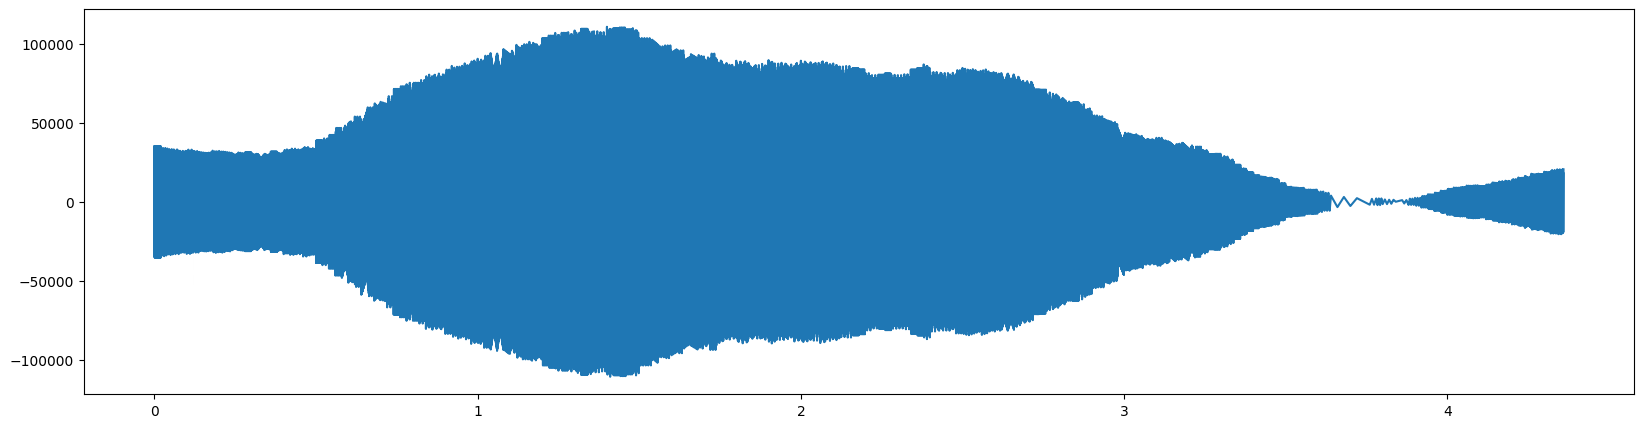

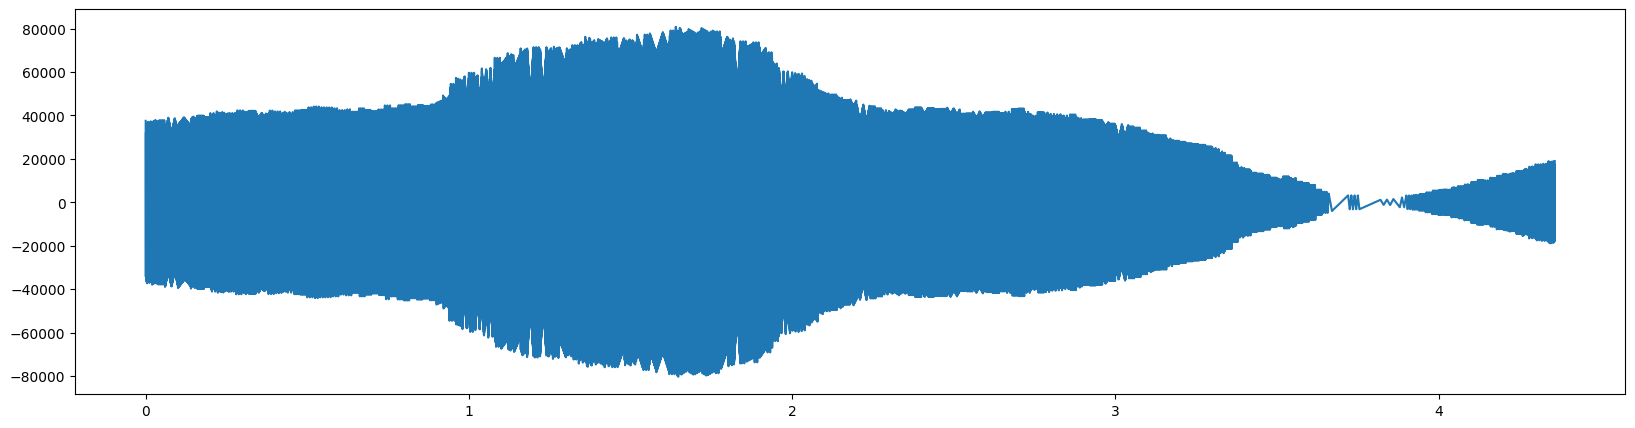

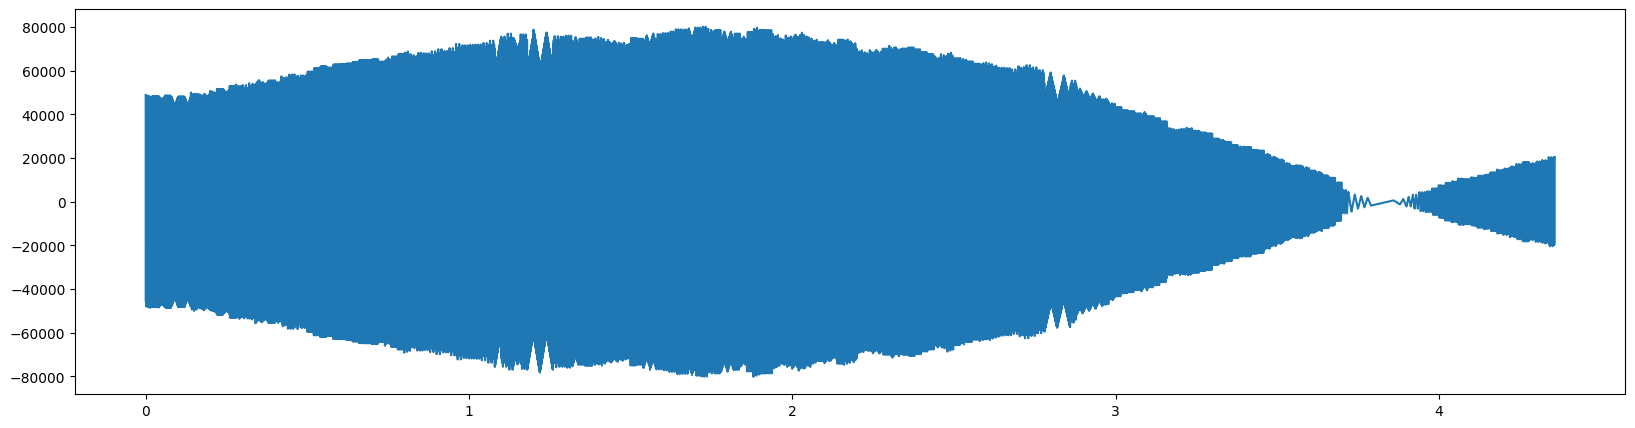

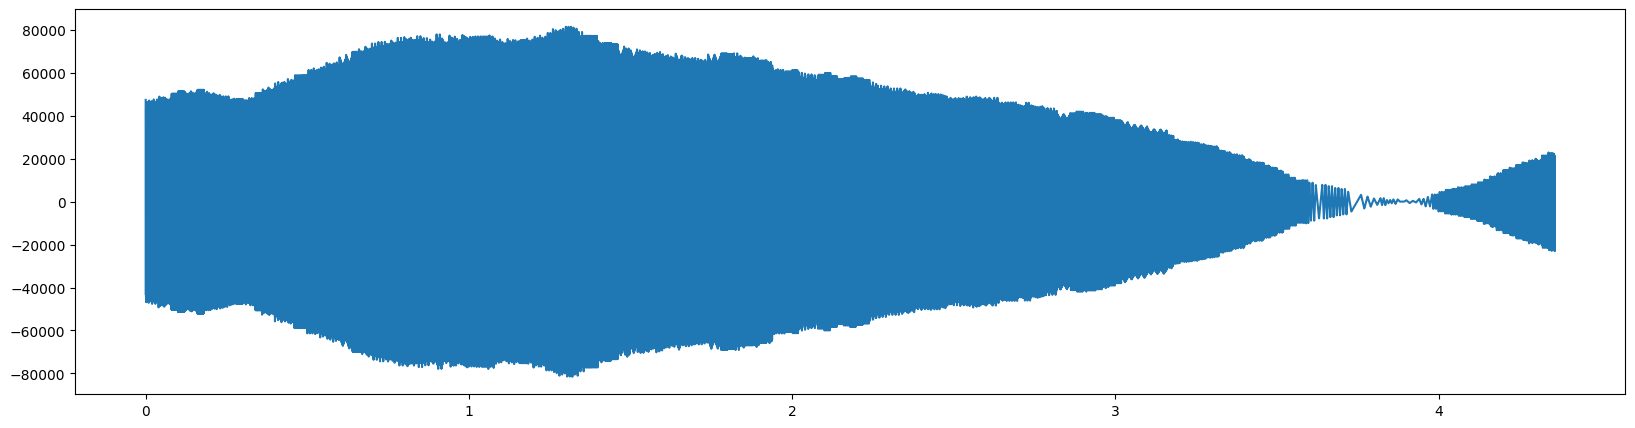

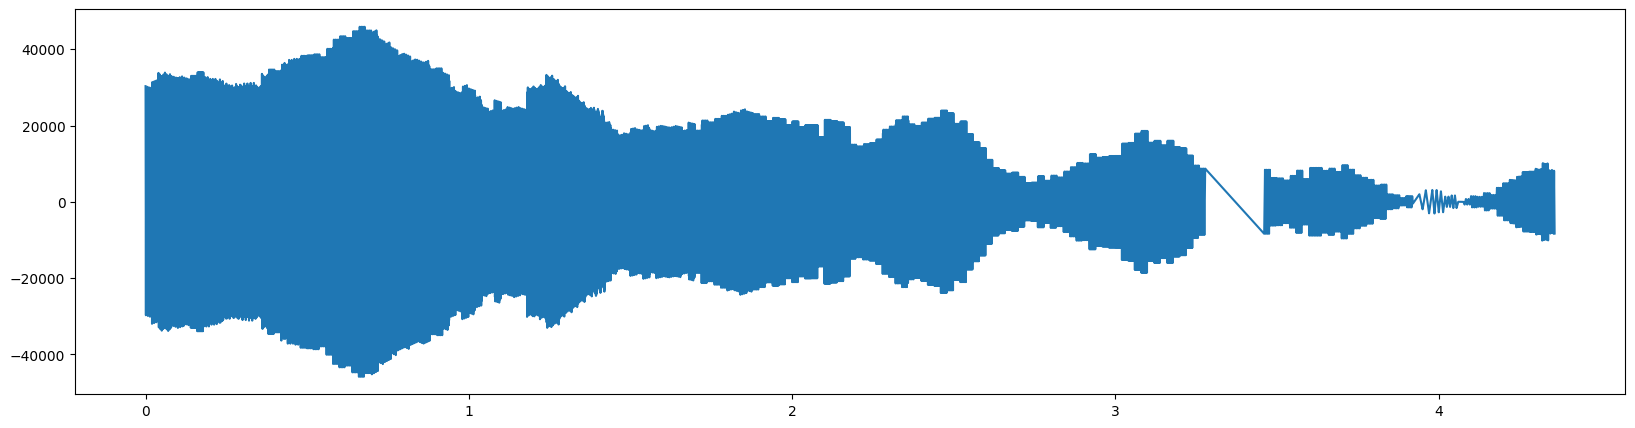

In [112]:
for i, sound_wave in enumerate(sound_waves):
    plt.subplots(figsize=(20,5))
    plt.plot(np.arange(0, len(sound_wave)) * 1.0 / 16000.0, sound_wave)
    plt.title("Neuron {i}")
    plt.show()
    plt.close()